In [1958]:
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler

In [1959]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list_inter = []
    counter = 0
    for proj in proj_list_file['proj'].tolist():
            counter = counter + 1
            print (counter)
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/500kbp_raw/max/hic_gene_inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)
            
            d2_list_inter.append(hic.matrix.sum(axis=0).getA().tolist()[0])
            

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [1877]:
import h5py
import scipy.sparse as ss
import os
import sys
import numpy as np
import pandas as pd


In [1881]:
def get_network_type(hfile, network=None):
    if not os.path.exists(hfile):
        raise ValueError('hfile must be a path pointing to a '
                         'readable HDF5 file.')
    with h5py.File(hfile, 'r') as hf:
        if 'aggregates' in hf.keys() and 'networks' in hf.keys():
            raise ValueError(layout_error_msg('contains both "aggregates" '
                                'and "networks" as top level groups.'))
        elif 'aggregates' in hf.keys():
            net_group = 'aggregates'
        elif 'networks' in hf.keys():
            net_group = 'networks'
        else:
            raise ValueError(layout_error_msg('contains both "aggregates" '
                                'and "networks" as top level groups.'))
        if network is not None:
            if (network not in hf[f'/{net_group}'].keys()
                    or type(hf[f'/{net_group}/{network}'])
                    is not h5py._hl.group.Group):
                raise ValueError(layout_error_msg('network must be an HDF5 '
                                    f'Group under \'/{net_group}/\''))
            return net_group, network
        else:
            return net_group

In [1888]:
hfile = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/aggregate.hdf5'

In [1925]:
hfile = '/grid/gillis/data/nfox/hi_c_data_processing/data_human/SRP110964/aggregate.hdf5'
net_group, network = get_network_type(hfile, '250kbp_raw')
with h5py.File(hfile, 'r') as hfile:
        matrix_rows = []
        #counter = 0
        for chrom_i in ['chr1']:
            matrix_cols = []
            #for chrom_j in chr_list[counter::]:
            for chrom_j in ['chr1']:
                #sparse.coo_matrix((3, 4))
                chrom = chrom_i + '_vs_' + chrom_j
                print (chrom_path)
                if not chrom.startswith('chr'):
                    continue
                chrom_path = f'/{net_group}/{network}/{chrom}'
                print (hfile[f'/{net_group}/{network}/'].keys())
                print (chrom_path)
                print (hfile[f'{chrom_path}/data'][:])
                try:
                    print (hfile[f'{chrom_path}/data'][:])
                    matrix = ss.coo_matrix((hfile[f'{chrom_path}/data'][:],
                                            (hfile[f'{chrom_path}/row'][:],
                                            hfile[f'{chrom_path}/col'][:])),
                                        hfile[f'{chrom_path}/shape'][:])
                    print (matrix)
                    #matrix = matrix.astype(matrix_dtype)
                except:
                    continue

/aggregates/250kbp_raw/chr1_vs_chr1
<KeysViewHDF5 ['chr10_vs_chr10', 'chr10_vs_chr11', 'chr10_vs_chr12', 'chr10_vs_chr13', 'chr10_vs_chr14', 'chr10_vs_chr15', 'chr10_vs_chr16', 'chr10_vs_chr17', 'chr10_vs_chr18', 'chr10_vs_chr19', 'chr10_vs_chr2', 'chr10_vs_chr20', 'chr10_vs_chr21', 'chr10_vs_chr22', 'chr10_vs_chr3', 'chr10_vs_chr4', 'chr10_vs_chr5', 'chr10_vs_chr6', 'chr10_vs_chr7', 'chr10_vs_chr8', 'chr10_vs_chr9', 'chr10_vs_chrM', 'chr10_vs_chrX', 'chr10_vs_chrY', 'chr11_vs_chr11', 'chr11_vs_chr12', 'chr11_vs_chr13', 'chr11_vs_chr14', 'chr11_vs_chr15', 'chr11_vs_chr16', 'chr11_vs_chr17', 'chr11_vs_chr18', 'chr11_vs_chr19', 'chr11_vs_chr2', 'chr11_vs_chr20', 'chr11_vs_chr21', 'chr11_vs_chr22', 'chr11_vs_chr3', 'chr11_vs_chr4', 'chr11_vs_chr5', 'chr11_vs_chr6', 'chr11_vs_chr7', 'chr11_vs_chr8', 'chr11_vs_chr9', 'chr11_vs_chrM', 'chr11_vs_chrX', 'chr11_vs_chrY', 'chr12_vs_chr12', 'chr12_vs_chr13', 'chr12_vs_chr14', 'chr12_vs_chr15', 'chr12_vs_chr16', 'chr12_vs_chr17', 'chr12_vs_chr18',

In [1926]:
matrix 

<996x996 sparse matrix of type '<class 'numpy.float64'>'
	with 399075 stored elements in COOrdinate format>

In [1897]:
hfile[f'{chrom_path}/data'][:]

ValueError: Not a location (invalid object ID)

In [1887]:
 hfile

<Closed HDF5 file>

In [1885]:
chrom_path = '/aggregates/10kbp_raw/chr1_vs_chr2'

In [1886]:
hfile[f'{chrom_path}/data'][:]

ValueError: Not a location (invalid object ID)

In [ ]:
    net_group, network = get_network_type(hfile, network)
    
    with h5py.File(hfile, 'r') as hfile:
        
        
        matrix_rows = []
        #counter = 0
        for chrom_i in chr_list:
            matrix_cols = []
            #for chrom_j in chr_list[counter::]:
            for chrom_j in chr_list:
                #sparse.coo_matrix((3, 4))
                chrom = chrom_i + '_vs_' + chrom_j
                if not chrom.startswith('chr'):
                    continue
                chrom_path = f'/{net_group}/{network}/{chrom}'
                #print (hfile[f'{chrom_path}/shape'][:])
                try:
                    matrix = ss.coo_matrix((hfile[f'{chrom_path}/data'][:],
                                            (hfile[f'{chrom_path}/row'][:],
                                            hfile[f'{chrom_path}/col'][:])),
                                        hfile[f'{chrom_path}/shape'][:])

In [ ]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list = []
    counter = 0
    for proj in proj_list_file['proj'].tolist():
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/500kbp_raw/max/hic_gene_inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)
            
            d2_list.append(hic.matrix.sum(axis=0).getA().tolist()[0])
            

In [1956]:
len(d2_list)

67

In [1949]:
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/500kbp_raw/max/hic_gene_inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)
            

In [1951]:
hic.matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1952]:
hic.matrix.sum(axis=0).getA().tolist()[0]

[39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 83628.0,
 39748.0,
 39748.0,
 39748.0,
 39748.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 62871.0,
 94470.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,
 64639.0,


In [1929]:
hic.matrix

<5760x5760 sparse matrix of type '<class 'numpy.int64'>'
	with 14367084 stored elements in Compressed Sparse Row format>

In [1857]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list = []
    counter = 0
    for proj in proj_list_file['proj'].tolist():
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/500kbp_raw/inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)
            
            d2_list.append((hic.matrix.count_nonzero() / np.prod(hic.matrix.shape)))
            print (counter)
            

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [1875]:
            file_name = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/100kbp_raw/inter_none.h5'
        
            hic = hm.hiCMatrix(file_name)

In [1876]:
(hic.matrix.count_nonzero() / np.prod(hic.matrix.shape))

0.8426527533024735

In [1859]:
data_tuples = list(zip(proj_list_file['proj'].tolist(),d2_list))
df = pd.DataFrame(data_tuples, columns=['proj_id','density'])
df.to_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/stats/project_density.csv', index=False)

In [1950]:
!ls -lart /grid/gillis/data/lohia/hi_c_data_processing/data_human/stats/

total 9380
-rw-rw----   1 lohia gillis lab staff  148532 Sep 10  2021 exclude.csv
-rw-rw----   1 lohia gillis lab staff   63836 Sep 12  2021 human_project_contacts_count.txt
-rw-rw----   1 lohia gillis lab staff   63836 Sep 13  2021 human_project_contacts_count_intra.txt
-rw-rw----   1 lohia gillis lab staff    2375 Sep 13  2021 human_project_contacts_count_inter.txt
-rw-rw----   1 lohia gillis lab staff     874 Sep 13  2021 SRP_29_subset_1
-rw-rw----   1 lohia gillis lab staff     875 Sep 13  2021 SRP_29_subset_2
-rw-rw----   1 lohia gillis lab staff     868 Sep 13  2021 SRP_29_subset_3
-rw-rw----   1 lohia gillis lab staff     962 Sep 13  2021 SRP_29_subset_4
-rw-rw----   1 lohia gillis lab staff    1836 Sep 13  2021 SRP_58_subset_1
-rw-rw----   1 lohia gillis lab staff    1743 Sep 13  2021 SRP_58_subset_2
-rw-rw----   1 lohia gillis lab staff      60 Sep 13  2021 SRP_2_shuf_1
-rw-rw----   1 lohia gillis lab staff      91 Sep 13  2021 SRP_3_shuf_1
-rw-rw----   1 lohia gillis lab staf

In [1871]:
hic.matrix - hic.matrix

<5760x5760 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [1873]:
np.maximum(hic.matrix.toarray(),hic.matrix.toarray())

array([[ 0,  0,  0, ...,  1,  1,  6],
       [ 0,  0,  0, ...,  2,  8, 10],
       [ 0,  0,  0, ...,  3, 11,  5],
       ...,
       [ 1,  2,  3, ...,  0,  0,  0],
       [ 1,  8, 11, ...,  0,  0,  0],
       [ 6, 10,  5, ...,  0,  0,  0]])

In [1848]:
file_name = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP109036/250kbp_raw/inter_none.h5'
hic = hm.hiCMatrix(file_name)


In [1849]:
hic.matrix

<11512x11512 sparse matrix of type '<class 'numpy.int64'>'
	with 6232 stored elements in Compressed Sparse Row format>

In [1850]:
hic.matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [1854]:
(hic.matrix.count_nonzero() / np.prod(hic.matrix.shape))

4.702468367298154e-05

In [ ]:
hic.matrix.count_nonzero

In [1845]:
file_name = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP109036/250kbp_raw/inter_KR.h5'
hic = hm.hiCMatrix(file_name)


In [1847]:
hic.matrix.toarray()

array([[0.65740297, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.65740297, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.65740297, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.65740297, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.65740297,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.65740297]])

In [2108]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list = []
    counter = 0
    for proj in proj_list_file['proj'].tolist():
        counter = counter +1
        try:
        
            subcomp_10kb_1 = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/100kbp_raw/topdom/topdom_gw.bed", sep='\t', header=None)
            subcomp_10kb_1['proj'] = proj
            d2_list.append(subcomp_10kb_1)
            
        except:
            print (proj, counter)
            

SRP109036 76
SRP182670 112


In [2212]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list = []
    counter = 0
    for resolution in [40, 100, 250]:
    
        for proj in proj_list_file['proj'].tolist():
            counter = counter +1
            try:

                subcomp_10kb_1 = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/{resolution}kbp_raw/topdom/topdom_gw.bed", sep='\t', header=None)
                subcomp_10kb_1['proj'] = proj
                subcomp_10kb_1['resolution'] = resolution
                d2_list.append(subcomp_10kb_1)

            except:
                print (proj, counter)

SRP109036 76
SRP182670 112
SRP109036 195
SRP182670 231
SRP109036 314
SRP182670 350


In [2102]:
    proj_list_file = pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
    d2_list = []
    counter = 0
    for proj in proj_list_file['proj'].tolist():
        counter = counter +1
        try:
        
            subcomp_10kb_1 = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/10kbp_raw/sub_compartments/gene_not_found.bed", sep=',', header=None)
            subcomp_10kb_1['proj'] = proj
            d2_list.append(subcomp_10kb_1)
            
        except:
            print (proj, counter)
            

SRP109036 76


In [2213]:
df = pd.concat(d2_list)

In [2214]:
df[0] = df[0].astype('str')
df[1] = df[1].astype('str')
df[2] = df[2].astype('str')

In [2215]:
df['boundary1'] = df[0] + '_' + df[1]
df['boundary2'] = df[0] + '_' + df[2]
df['domain'] = df[0] + '_' + df[1] + '_' + df[2]

In [2216]:
df_TAD = df[df[3]!='boundary']

In [2131]:
df

0         1         2         3  4       proj  resolution  \
0     chr1         0    960000   domain0  0  SRP105082          40   
1     chr1    960000   1080000  boundary  1  SRP105082          40   
2     chr1   1080000   1280000   domain2  2  SRP105082          40   
3     chr1   1280000   1360000  boundary  3  SRP105082          40   
4     chr1   1360000   1520000  boundary  4  SRP105082          40   
..     ...       ...       ...       ... ..        ...         ...   
581  chr22  32000000  36500000   domain4  4  SRP071243         500   
582  chr22  36500000  42500000   domain5  5  SRP071243         500   
583  chr22  42500000  46000000   domain6  6  SRP071243         500   
584  chr22  46000000  49500000   domain7  7  SRP071243         500   
585  chr22  49500000  51000000   domain8  8  SRP071243         500   

          boundary1       boundary2                   domain  
0            chr1_0     chr1_960000            chr1_0_960000  
1       chr1_960000    chr1_1080000      chr1_960000_1080000  
2      chr1_1080000    chr1_1280000     chr1_1080000_1280000  
3      chr1_1280000    chr1_1360000     chr1_1280000_1360000  
4      chr1_1360000    chr1_1520000     chr1_1360000_1520000  
..              ...             ...                      ...  
581  chr22_32000000  chr22_36500000  chr22_32000000_36500000  
582  chr22_36500000  chr22_42500000  chr22_36500000_42500000  
583  chr22_42500000  chr22_46000000  chr22_42500000_46000000  
584  chr22_46000000  chr22_49500000  chr22_46000000_49500000  
585  chr22_49500000  chr22_51000000  chr22_49500000_51000000  

[1240349 rows x 10 columns]

In [2217]:
df_boundary_count=df.groupby(['boundary2', 'resolution'])['boundary1'].count().reset_index()

In [2199]:
df_boundary_count['boundary2'].max()

KeyError: 'boundary2'

<AxesSubplot:xlabel='boundary1', ylabel='Probability'>

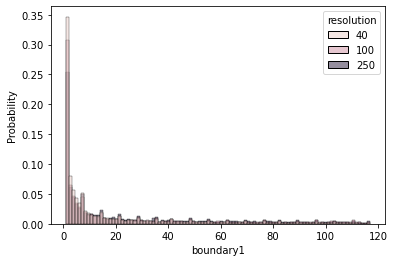

In [2156]:
sns.histplot(data=df_boundary_count, x='boundary1', hue='resolution', stat="probability", common_norm=False)

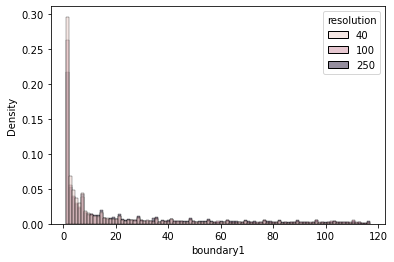

In [2175]:
ax = sns.histplot(data=df_boundary_count, x='boundary1', hue='resolution', stat="density", common_norm=False)
#ax = sns.histplot(data=df_boundary_count, x='boundary1', hue='resolution', stat="proportion", common_norm=False,  cumulative=True)



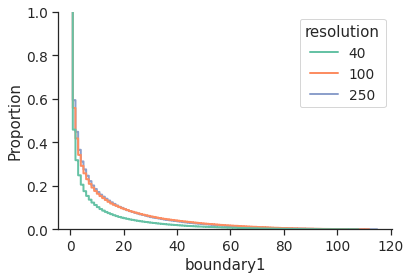

In [2211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)
#sns.lineplot(data=df_boundary_count, x='boundary2', y=df_boundary_count.index)
ax.legend().remove()


plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/TADs.pdf', transparent=True, bbox_inches='tight')


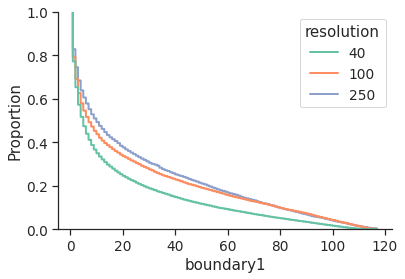

In [2219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)
#sns.lineplot(data=df_boundary_count, x='boundary2', y=df_boundary_count.index)
ax.legend().remove()

plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/boundaries.pdf', transparent=True, bbox_inches='tight')


<AxesSubplot:xlabel='boundary1', ylabel='Proportion'>

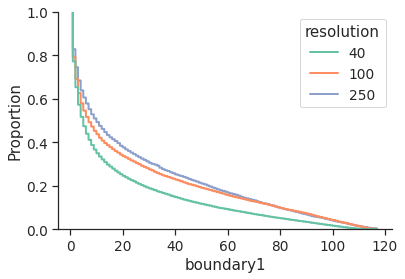

In [2201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)
#sns.lineplot(data=df_boundary_count, x='boundary2', y=df_boundary_count.index)

<AxesSubplot:xlabel='boundary1', ylabel='Proportion'>

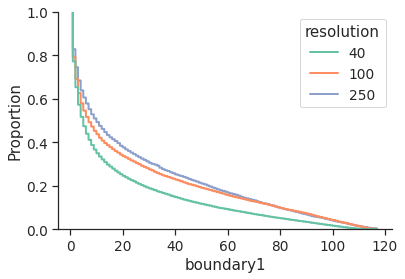

In [2202]:
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)

In [2198]:
df_boundary_count['boundary1'].value_counts()

1      108958
2       30322
3       15542
4        9855
5        6783
        ...  
109         3
110         2
111         2
112         2
115         1
Name: boundary1, Length: 113, dtype: int64

In [2165]:
df_TAD

0         1         2         3   4       proj  resolution  \
0      chr1         0    960000   domain0   0  SRP105082          40   
2      chr1   1080000   1280000   domain2   2  SRP105082          40   
7      chr1   1920000   2200000   domain7   7  SRP105082          40   
8      chr1   2200000   2400000   domain8   8  SRP105082          40   
9      chr1   2400000   3440000   domain9   9  SRP105082          40   
...     ...       ...       ...       ...  ..        ...         ...   
1292  chr22  41250000  43250000  domain21  21  SRP071243         250   
1293  chr22  43250000  44750000  domain22  22  SRP071243         250   
1294  chr22  44750000  46750000  domain23  23  SRP071243         250   
1295  chr22  46750000  49750000  domain24  24  SRP071243         250   
1296  chr22  49750000  51000000  domain25  25  SRP071243         250   

           boundary1       boundary2                   domain  
0             chr1_0     chr1_960000            chr1_0_960000  
2       chr1_1080000    chr1_1280000     chr1_1080000_1280000  
7       chr1_1920000    chr1_2200000     chr1_1920000_2200000  
8       chr1_2200000    chr1_2400000     chr1_2200000_2400000  
9       chr1_2400000    chr1_3440000     chr1_2400000_3440000  
...              ...             ...                      ...  
1292  chr22_41250000  chr22_43250000  chr22_41250000_43250000  
1293  chr22_43250000  chr22_44750000  chr22_43250000_44750000  
1294  chr22_44750000  chr22_46750000  chr22_44750000_46750000  
1295  chr22_46750000  chr22_49750000  chr22_46750000_49750000  
1296  chr22_49750000  chr22_51000000  chr22_49750000_51000000  

[1086597 rows x 10 columns]

In [2220]:
df_boundary_count=df.groupby(['domain', 'resolution'])['boundary1'].count().reset_index()

<AxesSubplot:xlabel='boundary1', ylabel='Proportion'>

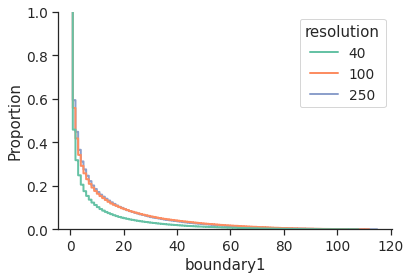

In [2221]:
#sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution')
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)
#sns.lineplot(data=df_boundary_count, x='boundary2', y=df_boundary_count.index)

<AxesSubplot:xlabel='boundary1', ylabel='Proportion'>

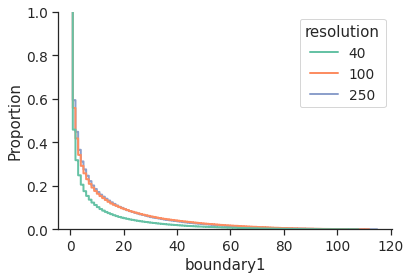

In [2205]:
sns.ecdfplot(data=df_boundary_count, x='boundary1', hue='resolution', complementary=True, palette='Set2',linewidth=2)

In [2209]:
df_boundary_count['boundary1'].max()

115

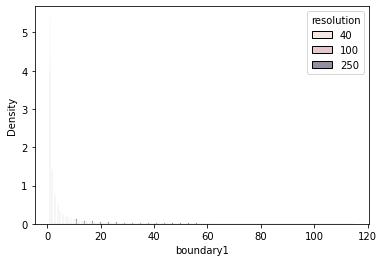

In [2171]:
ax = sns.histplot(data=df_boundary_count, x='boundary1', hue='resolution', stat="density", common_norm=False)
#ax = sns.histplot(data=df_boundary_count, x='boundary1', hue='resolution', stat="proportion", common_norm=False,  cumulative=True)


In [2170]:
df_boundary_count['boundary1'].max()

115

<AxesSubplot:ylabel='boundary2'>

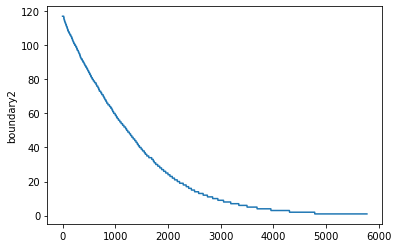

In [1812]:
sns.lineplot(data=df_boundary_count, y='boundary2', x=df_boundary_count.index)

In [1970]:
df['boundary2']

0        chr1_2500000
1        chr1_3500000
2        chr1_6500000
3       chr1_12000000
4       chr1_15500000
            ...      
581    chr22_36500000
582    chr22_42500000
583    chr22_46000000
584    chr22_49500000
585    chr22_51000000
Name: boundary2, Length: 69511, dtype: object

In [1969]:
df['boundary2'].value_counts() / 69511

chr4_190500000     0.001683
chr15_102000000    0.001683
chr11_135500000    0.001683
chr1_249000000     0.001683
chr7_102500000     0.001683
                     ...   
chr1_107000000     0.000014
chr14_64000000     0.000014
chr1_11500000      0.000014
chr6_67000000      0.000014
chr6_48000000      0.000014
Name: boundary2, Length: 3075, dtype: float64

In [1994]:
df

0         1         2        3  4       proj       boundary1  \
0     chr1         0   2500000  domain0  0  SRP105082          chr1_0   
1     chr1   2500000   3500000  domain1  1  SRP105082    chr1_2500000   
2     chr1   3500000   6500000  domain2  2  SRP105082    chr1_3500000   
3     chr1   6500000  12000000  domain3  3  SRP105082    chr1_6500000   
4     chr1  12000000  15500000  domain4  4  SRP105082   chr1_12000000   
..     ...       ...       ...      ... ..        ...             ...   
581  chr22  32000000  36500000  domain4  4  SRP071243  chr22_32000000   
582  chr22  36500000  42500000  domain5  5  SRP071243  chr22_36500000   
583  chr22  42500000  46000000  domain6  6  SRP071243  chr22_42500000   
584  chr22  46000000  49500000  domain7  7  SRP071243  chr22_46000000   
585  chr22  49500000  51000000  domain8  8  SRP071243  chr22_49500000   

          boundary2                   domain  
0      chr1_2500000           chr1_0_2500000  
1      chr1_3500000     chr1_2500000_3500000  
2      chr1_6500000     chr1_3500000_6500000  
3     chr1_12000000    chr1_6500000_12000000  
4     chr1_15500000   chr1_12000000_15500000  
..              ...                      ...  
581  chr22_36500000  chr22_32000000_36500000  
582  chr22_42500000  chr22_36500000_42500000  
583  chr22_46000000  chr22_42500000_46000000  
584  chr22_49500000  chr22_46000000_49500000  
585  chr22_51000000  chr22_49500000_51000000  

[69511 rows x 9 columns]

In [2087]:
df_tmp = df['boundary2'].value_counts().reset_index()

df_tmp['value'] = 1


In [2088]:
df_tmp

index  boundary2  value
0       chr1_249000000        117      1
1        chr5_88700000        117      1
2      chr10_133800000        117      1
3      chr11_135100000        117      1
4       chr11_95800000        117      1
...                ...        ...    ...
14155   chr6_150200000          1      1
14156   chr9_113000000          1      1
14157   chr16_83200000          1      1
14158   chr5_179000000          1      1
14159    chr6_47200000          1      1

[14160 rows x 3 columns]

In [2086]:

df_tmp = df_tmp.groupby('boundary2')['value'].sum().reset_index() 
df_tmp['value'] = df_tmp['value']/df_tmp['value'].sum()

In [2007]:
df_tmp['value'].sum()

3075

In [1989]:
df_tmp['value'] = df_tmp['value']/df.shape[0]

In [2057]:
df_tmp['value'] = df_tmp['value']/df_tmp['value'].sum()

In [2037]:
df_tmp

boundary2     value
0            1  0.166588
1            2  0.134800
2            3  0.109885
3            4  0.087003
4            5  0.068618
..         ...       ...
101        102  0.000027
102        103  0.000014
103        104  0.000005
104        105  0.000005
105        115  0.000100

[106 rows x 2 columns]

<AxesSubplot:xlabel='boundary2', ylabel='value'>

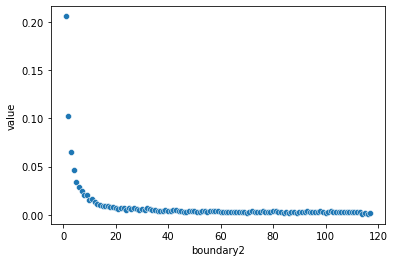

In [2075]:
sns.scatterplot(data=df_tmp, x='boundary2', y='value')

<AxesSubplot:xlabel='boundary2', ylabel='value'>

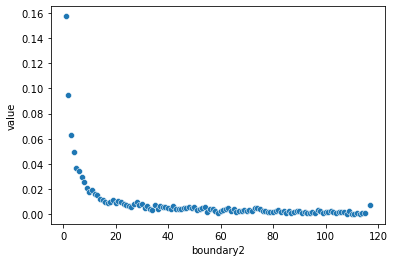

In [2019]:
sns.scatterplot(data=df_tmp, x='boundary2', y='value')

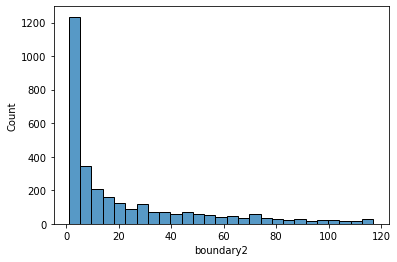

In [1966]:
ax= sns.histplot(df['boundary2'].value_counts())
#ax.set_ylim([0,500])

In [ ]:
sns.histplot(df['boundary2'])

In [1822]:
df_boundary_count

index  boundary2
0      chr7_159500000        117
1      chr21_46750000        117
2      chr18_80500000        117
3     chr14_107250000        117
4      chr9_138500000        117
...               ...        ...
5768   chr6_133000000          1
5769   chr14_18250000          1
5770    chr12_7750000          1
5771    chr6_36250000          1
5772   chr22_49250000          1

[5773 rows x 2 columns]

In [2059]:
df_TAD

0         1         2         3   4       proj       boundary1  \
0      chr1         0    750000   domain0   0  SRP105082          chr1_0   
1      chr1    750000   2500000   domain1   1  SRP105082     chr1_750000   
2      chr1   2500000   3750000   domain2   2  SRP105082    chr1_2500000   
3      chr1   3750000   6000000   domain3   3  SRP105082    chr1_3750000   
4      chr1   6000000   7750000   domain4   4  SRP105082    chr1_6000000   
...     ...       ...       ...       ...  ..        ...             ...   
1292  chr22  41250000  43250000  domain21  21  SRP071243  chr22_41250000   
1293  chr22  43250000  44750000  domain22  22  SRP071243  chr22_43250000   
1294  chr22  44750000  46750000  domain23  23  SRP071243  chr22_44750000   
1295  chr22  46750000  49750000  domain24  24  SRP071243  chr22_46750000   
1296  chr22  49750000  51000000  domain25  25  SRP071243  chr22_49750000   

           boundary2                   domain  
0        chr1_750000            chr1_0_750000  
1       chr1_2500000      chr1_750000_2500000  
2       chr1_3750000     chr1_2500000_3750000  
3       chr1_6000000     chr1_3750000_6000000  
4       chr1_7750000     chr1_6000000_7750000  
...              ...                      ...  
1292  chr22_43250000  chr22_41250000_43250000  
1293  chr22_44750000  chr22_43250000_44750000  
1294  chr22_46750000  chr22_44750000_46750000  
1295  chr22_49750000  chr22_46750000_49750000  
1296  chr22_51000000  chr22_49750000_51000000  

[134626 rows x 9 columns]

In [2082]:
df_tmp = df_TAD['domain'].value_counts().reset_index()

df_tmp['value'] = 1



In [2084]:
df_tmp['domain'].max()

112

In [ ]:
df_tmp = df_tmp.groupby('domain')['value'].sum().reset_index() 
df_tmp['value'] = df_tmp['value']/df_tmp['value'].sum()

In [2077]:
df_TAD['domain'].value_counts()

chr4_109400000_110000000    112
chr2_42800000_43600000      111
chr2_27700000_28500000      111
chr7_12500000_13300000      110
chr8_123800000_124500000    110
                           ... 
chr5_149100000_150000000      1
chr4_184200000_186600000      1
chr4_174400000_175600000      1
chr1_11100000_11800000        1
chr14_74600000_75300000       1
Name: domain, Length: 45485, dtype: int64

<AxesSubplot:xlabel='domain', ylabel='value'>

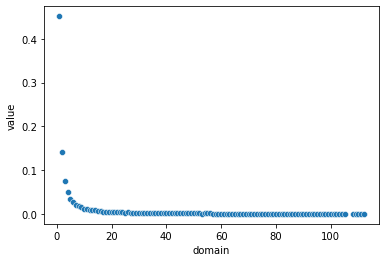

In [2078]:
sns.scatterplot(data=df_tmp, x='domain', y='value')

(0.0, 0.001)

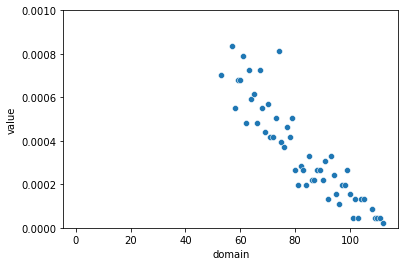

In [2081]:
ax = sns.scatterplot(data=df_tmp, x='domain', y='value')
ax.set_ylim([0, 0.001])

In [ ]:
df_tmp 

In [2060]:
df_TAD_count = df_TAD['domain'].value_counts().reset_index()

In [2061]:
df_TAD_count

index  domain
0        chr5_82250000_83750000     115
1       chr12_31250000_32750000     112
2      chr2_204000000_206000000     109
3                chr6_0_1500000     107
4       chr18_68750000_70500000     106
...                         ...     ...
19866   chr11_74750000_76500000       1
19867    chr8_27500000_28750000       1
19868   chr4_99500000_100000000       1
19869  chr5_135750000_137500000       1
19870   chr15_71000000_74000000       1

[19871 rows x 2 columns]

<AxesSubplot:ylabel='domain'>

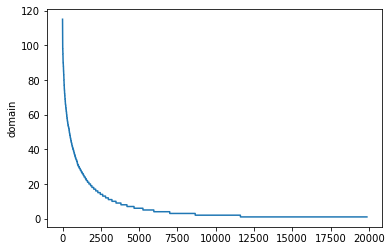

In [1814]:
sns.lineplot(data=df_TAD_count, y='domain', x=df_TAD_count.index)

(0.0, 500.0)

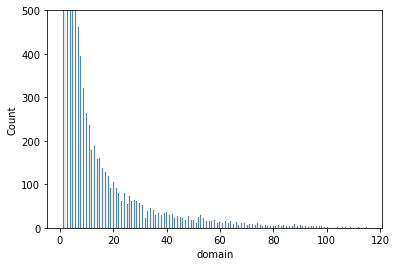

In [1820]:
ax = sns.histplot(df_TAD_count['domain'])
ax.set_ylim([0,500])

In [1821]:
df_TAD_count

index  domain
0        chr5_82250000_83750000     115
1       chr12_31250000_32750000     112
2      chr2_204000000_206000000     109
3                chr6_0_1500000     107
4       chr18_68750000_70500000     106
...                         ...     ...
19866   chr11_74750000_76500000       1
19867    chr8_27500000_28750000       1
19868   chr4_99500000_100000000       1
19869  chr5_135750000_137500000       1
19870   chr15_71000000_74000000       1

[19871 rows x 2 columns]

In [ ]:
df['boundary1'].tolist()

In [1767]:
        subcomp_10kb_1 = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP117084/250kbp_raw/topdom/topdom_gw.bed", sep='\t', header=None)
        subcomp_10kb_2 = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/250kbp_raw/topdom/topdom_gw.bed", sep='\t', header=None)

             

 

In [1768]:
subcomp_10kb_1['']

0         1         2         3   4
0      chr1         0    500000   domain0   0
1      chr1    500000   1750000   domain1   1
2      chr1   1750000   6000000   domain2   2
3      chr1   6000000   7750000   domain3   3
4      chr1   7750000   9500000   domain4   4
...     ...       ...       ...       ...  ..
1409  chr22  40750000  43250000  domain18  18
1410  chr22  43250000  44750000  domain19  19
1411  chr22  44750000  46750000  domain20  20
1412  chr22  46750000  49750000  domain21  21
1413  chr22  49750000  51000000  domain22  22

[1414 rows x 5 columns]

In [1769]:
subcomp_10kb_2

0         1         2         3   4
0      chr1         0    750000   domain0   0
1      chr1    750000   2500000   domain1   1
2      chr1   2500000   3750000   domain2   2
3      chr1   3750000   6000000   domain3   3
4      chr1   6000000   7750000   domain4   4
...     ...       ...       ...       ...  ..
1156  chr22  41750000  43250000  domain12  12
1157  chr22  43250000  44750000  domain13  13
1158  chr22  44750000  46750000  domain14  14
1159  chr22  46750000  49750000  domain15  15
1160  chr22  49750000  51000000  domain16  16

[1161 rows x 5 columns]

In [1748]:
        subcomp_10kb = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP117084/250kbp_raw/gw_sub_compartments/sub_compartments//all_sub_compartments.tsv", sep='\t')
        subcomp_10kb['bin'] = subcomp_10kb['pos_start'] / 10000 #this file is always at 10kb resolution
        subcomp_10kb['bin'] = subcomp_10kb['bin'].astype('int')
        species='human'

             

 

In [ ]:
        genome_info_file = "/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz"




        # as PyRanges-object
        gr = pr.read_gtf(genome_info_file)
        df = gr.df
        gene_data = df[df['Feature'] == 'gene']
        gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
        gene_data['gene_id'].drop_duplicates(inplace=True)



        if species != 'human':
            gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]

        new = gene_data["Chromosome"].isin(chr_list)


        gene_data = gene_data[new]
        gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)

        gene_data = gene_data[gene_data['Chromosome'].isin(chr_list)] 

        gene_data_grouped_chromosome = gene_data.groupby('Chromosome')

In [1749]:
        all_genes_df_list = []
        all_genes_df_list_not_found = []
        all_genes_df_list_not_found_exp = []

        #for chrom in chr_list:
        gene_index_row = []        
        gene_id = []
        gene_not_found = []
        chrom_id = []
        chrom_not_found = []
            

        #gene_chrom = gene_data_grouped_chromosome.get_group(chrom)
        #subcomp_10kb_chr = subcomp_10kb[subcomp_10kb['chr'] == chrom]
        subcompartment_bin_list = subcomp_10kb['bin'].tolist()
        subcomp_10kb.set_index('bin', inplace=True)
    
        for tss_start_x, tss_end_x, gene_x, strand, chrom in zip(gene_data['Start'], gene_data['End'], gene_data['gene_id'], gene_data['Strand'], gene_data['Chromosome']):
                    

                   
                    #bin id starts from 0
                    bin_start = min((int(tss_start_x/10000) ), (int(tss_end_x/10000) ) )
                    bin_end = max((int(tss_start_x/10000) ), (int(tss_end_x/10000) ) )



                    gene_bin_list = list(range(bin_start,bin_end+1))
                    
                    if strand == '-':
                        gene_bin_list.reverse()

                    #keep iterating the gene bins unless the gene tss is found
                    counter_gene_found = 0
                    for given_bin in gene_bin_list:
                        if given_bin in subcompartment_bin_list:
                            
                            gene_index_row.append(given_bin)
                            gene_id.append(gene_x)
                            chrom_id.append(chrom)
                            
                            counter_gene_found  = 1
                            break
                    if counter_gene_found == 0: #the gene was never found
                        gene_not_found.append(gene_x)
                        chrom_not_found.append(chrom)
                        

In [1750]:
        subcomp_10kb_part1 = subcomp_10kb.loc[gene_index_row, :]
        subcomp_10kb_part1['gene'] = gene_id
        subcomp_10kb_part1['chr'] = chrom_id
        subcomp_10kb_part1['gene_filtered'] = gene_id
        #all_genes_df_list.append(subcomp_10kb)
            
        total_not_found_genes = len(gene_not_found)
        df_total_not_found_genes = subcomp_10kb.head(total_not_found_genes)
        df_total_not_found_genes['gene'] = gene_not_found
        df_total_not_found_genes['chr'] = chrom_not_found
        df_total_not_found_genes['gene_filtered'] = 'not_found'
            
        df_total_not_found_genes['comp_name'] = 'E'
        df_total_not_found_genes['continous_rank'] = 'E'
            
        all_genes_df_list_not_found.append(df_total_not_found_genes)
        all_genes_df_list_not_found_exp.append(df_total_not_found_genes[df_total_not_found_genes['gene'].isin(exp_genes)])
            
        df_all_coexp_genes = pd.concat([subcomp_10kb_part1,df_total_not_found_genes])
        
        df_all_coexp_genes['tmp_chr'] = [x[3::] for x in  df_all_coexp_genes['chr']]

        df_all_coexp_genes.sort_values(by=['tmp_chr','gene'], inplace=True)

        all_genes_df_list.append(df_all_coexp_genes)
            
            
 
        df_all_sub_comp_genes = pd.concat(all_genes_df_list) 
    

<ipython-input-1750-bdf8389e5fd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_not_found_genes['gene'] = gene_not_found
<ipython-input-1750-bdf8389e5fd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_not_found_genes['chr'] = chrom_not_found
<ipython-input-1750-bdf8389e5fd3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [1751]:
df_all_sub_comp_genes

chr  pos_start    pos_end                comp_name  comp_rank  \
bin                                                                     
154    chr1    1540001    1550000                        E      0.750   
16966  chr1  169665001  169675000      B.2.1.1.1.1.1.1.2.1      0.250   
2763   chr1   27635001   27645000    B.2.1.1.1.2.1.2.1.1.2      0.250   
19665  chr1  196655001  196665000        A.1.2.2.1.2.1.2.1      0.875   
2441   chr1   24415001   24425000    B.2.1.2.1.2.2.1.1.1.1      0.250   
...     ...        ...        ...                      ...        ...   
9635   chr9   96350001   96360000  A.2.1.1.2.2.1.2.2.1.1.1      0.750   
13137  chr9  131370001  131380000  B.2.1.2.2.2.1.2.2.2.2.2      0.250   
11308  chr9  113080001  113090000  A.1.1.1.2.2.1.1.1.2.1.2      1.000   
11305  chr9  113050001  113060000  A.1.1.1.2.2.1.1.1.2.1.2      1.000   
10399  chr9  103990001  104000000  A.1.1.2.2.2.2.1.2.1.1.2      1.000   

      continous_rank             gene    gene_filtered tmp_chr  
bin                                                             
154                E  ENSG00000000457        not_found       1  
16966       0.344587  ENSG00000000460  ENSG00000000460       1  
2763        0.327125  ENSG00000000938  ENSG00000000938       1  
19665       0.680442  ENSG00000000971  ENSG00000000971       1  
2441        0.263097  ENSG00000001460  ENSG00000001460       1  
...              ...              ...              ...     ...  
9635        0.616997  ENSG00000285269  ENSG00000285269       9  
13137       0.215367  ENSG00000285287  ENSG00000285287       9  
11308       0.902212  ENSG00000285370  ENSG00000285370       9  
11305       0.902212  ENSG00000285447  ENSG00000285447       9  
10399       0.792782  ENSG00000285483  ENSG00000285483       9  

[55411 rows x 9 columns]

In [973]:
subcomp_10kb_chr

chr  pos_start      pos_end              comp_name  comp_rank  \
bin                                                                     
0      chr1          1      10000.0        ENSG00000236679      0.625   
1      chr1      10001      20000.0        ENSG00000197921      0.625   
2      chr1      20001      30000.0        ENSG00000272449      0.625   
3      chr1      30001      40000.0        ENSG00000238164      0.625   
4      chr1      40001      50000.0        ENSG00000227230      0.625   
...     ...        ...          ...                    ...        ...   
24891  chr1  248910001  248920000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24892  chr1  248920001  248930000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24893  chr1  248930001  248940000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24894  chr1  248940001  248950000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24895  chr1  248950001  248960000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   

       continous_rank  
bin                    
0            0.472748  
1            0.472748  
2            0.472748  
3            0.472748  
4            0.472748  
...               ...  
24891        0.750918  
24892        0.750918  
24893        0.750918  
24894        0.750918  
24895        0.750918  

[22964 rows x 6 columns]

In [969]:
subcomp_10kb_chr_part1

chr  pos_start      pos_end              comp_name  comp_rank  \
bin                                                                     
1      chr1      10001      20000.0    A.2.2.2.2.2.2.1.2.1      0.625   
2      chr1      20001      30000.0    A.2.2.2.2.2.2.1.2.1      0.625   
1      chr1      10001      20000.0    A.2.2.2.2.2.2.1.2.1      0.625   
2      chr1      20001      30000.0    A.2.2.2.2.2.2.1.2.1      0.625   
3      chr1      30001      40000.0    A.2.2.2.2.2.2.1.2.1      0.625   
...     ...        ...          ...                    ...        ...   
24885  chr1  248850001  248860000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24885  chr1  248850001  248860000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24890  chr1  248900001  248910000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24891  chr1  248910001  248920000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24893  chr1  248930001  248940000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   

       continous_rank             gene  
bin                                     
1            0.472748  ENSG00000223972  
2            0.472748  ENSG00000227232  
1            0.472748  ENSG00000278267  
2            0.472748  ENSG00000243485  
3            0.472748  ENSG00000284332  
...               ...              ...  
24885        0.750918  ENSG00000171163  
24885        0.750918  ENSG00000227237  
24890        0.750918  ENSG00000185220  
24891        0.750918  ENSG00000200495  
24893        0.750918  ENSG00000233084  

[5271 rows x 7 columns]

In [960]:
tmp = subcomp_10kb_chr.loc[gene_index_row, :]


In [963]:
len(gene_index_row)

5271

In [964]:
 subcomp_10kb_chr

chr  pos_start      pos_end              comp_name  comp_rank  \
bin                                                                     
1      chr1      10001      20000.0        ENSG00000236679      0.625   
2      chr1      20001      30000.0        ENSG00000197921      0.625   
1      chr1      10001      20000.0        ENSG00000272449      0.625   
2      chr1      20001      30000.0        ENSG00000238164      0.625   
3      chr1      30001      40000.0        ENSG00000227230      0.625   
...     ...        ...          ...                    ...        ...   
24885  chr1  248850001  248860000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24885  chr1  248850001  248860000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24890  chr1  248900001  248910000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24891  chr1  248910001  248920000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   
24893  chr1  248930001  248940000.0  A.1.2.1.2.1.1.1.1.2.1      0.875   

       continous_rank             gene  
bin                                     
1            0.472748  ENSG00000236679  
2            0.472748  ENSG00000197921  
1            0.472748  ENSG00000272449  
2            0.472748  ENSG00000238164  
3            0.472748  ENSG00000227230  
...               ...              ...  
24885        0.750918  ENSG00000171163  
24885        0.750918  ENSG00000227237  
24890        0.750918  ENSG00000185220  
24891        0.750918  ENSG00000200495  
24893        0.750918  ENSG00000233084  

[5271 rows x 7 columns]

In [961]:
tmp[tmp['gene'] == 'ENSG00000236679']

chr  pos_start  pos_end        comp_name  comp_rank  continous_rank  \
bin                                                                         
1    chr1      10001  20000.0  ENSG00000236679      0.625        0.472748   
1    chr1      10001  20000.0  ENSG00000236679      0.625        0.472748   

                gene  
bin                   
1    ENSG00000236679  
1    ENSG00000236679

In [953]:
len(gene_not_found)

6

In [954]:
df_total_not_found_genes

chr  pos_start  pos_end        comp_name  comp_rank   continous_rank  \
bin                                                                          
1    chr1      10001  20000.0  ENSG00000236679      0.625  ENSG00000236679   
2    chr1      20001  30000.0  ENSG00000197921      0.625  ENSG00000197921   
1    chr1      10001  20000.0  ENSG00000272449      0.625  ENSG00000272449   
2    chr1      20001  30000.0  ENSG00000238164      0.625  ENSG00000238164   
3    chr1      30001  40000.0  ENSG00000227230      0.625  ENSG00000227230   
3    chr1      30001  40000.0  ENSG00000232085      0.625  ENSG00000232085   

                gene  
bin                   
1    ENSG00000236679  
2    ENSG00000197921  
1    ENSG00000272449  
2    ENSG00000238164  
3    ENSG00000227230  
3    ENSG00000232085

In [970]:
df_all_coexp_genes.drop_duplicates(subset=['chr', 'gene'], keep="first")

chr  pos_start      pos_end                comp_name  comp_rank  \
bin                                                                       
16989  chr1  169890001  169900000.0        B.1.1.1.2.2.1.1.1      0.500   
16966  chr1  169660001  169670000.0        B.1.1.1.2.2.1.1.1      0.500   
2763   chr1   27630001   27640000.0    A.1.1.2.2.1.1.2.2.2.2      1.000   
19665  chr1  196650001  196660000.0        B.2.1.2.2.1.1.2.2      0.250   
2441   chr1   24410001   24420000.0      A.1.2.1.1.1.2.1.2.2      0.875   
...     ...        ...          ...                      ...        ...   
6867   chr1   68670001   68680000.0    B.2.2.2.1.2.2.2.1.1.2      0.125   
8005   chr1   80050001   80060000.0  B.2.2.1.2.2.2.2.2.1.1.1      0.125   
20603  chr1  206030001  206040000.0    A.1.1.1.2.1.1.2.1.1.2      1.000   
7932   chr1   79320001   79330000.0      B.2.2.1.1.2.2.2.2.2      0.125   
6897   chr1   68970001   68980000.0    B.2.2.2.1.2.2.2.2.2.1      0.125   

      continous_rank             gene  
bin                                    
16989       0.441118  ENSG00000000457  
16966       0.441118  ENSG00000000460  
2763        0.825755  ENSG00000000938  
19665       0.207568  ENSG00000000971  
2441        0.777182  ENSG00000001460  
...              ...              ...  
6867        0.034454  ENSG00000285407  
8005        0.078509  ENSG00000285409  
20603       0.940412  ENSG00000285417  
7932        0.129624  ENSG00000285462  
6897        0.031347  ENSG00000285473  

[5277 rows x 7 columns]

In [956]:
df_all_coexp_genes

chr  pos_start      pos_end                comp_name  comp_rank  \
bin                                                                       
16989  chr1  169890001  169900000.0        B.1.1.1.2.2.1.1.1      0.500   
16966  chr1  169660001  169670000.0        B.1.1.1.2.2.1.1.1      0.500   
2763   chr1   27630001   27640000.0    A.1.1.2.2.1.1.2.2.2.2      1.000   
19665  chr1  196650001  196660000.0        B.2.1.2.2.1.1.2.2      0.250   
2441   chr1   24410001   24420000.0      A.1.2.1.1.1.2.1.2.2      0.875   
...     ...        ...          ...                      ...        ...   
6867   chr1   68670001   68680000.0    B.2.2.2.1.2.2.2.1.1.2      0.125   
8005   chr1   80050001   80060000.0  B.2.2.1.2.2.2.2.2.1.1.1      0.125   
20603  chr1  206030001  206040000.0    A.1.1.1.2.1.1.2.1.1.2      1.000   
7932   chr1   79320001   79330000.0      B.2.2.1.1.2.2.2.2.2      0.125   
6897   chr1   68970001   68980000.0    B.2.2.2.1.2.2.2.2.2.1      0.125   

      continous_rank             gene  
bin                                    
16989       0.441118  ENSG00000000457  
16966       0.441118  ENSG00000000460  
2763        0.825755  ENSG00000000938  
19665       0.207568  ENSG00000000971  
2441        0.777182  ENSG00000001460  
...              ...              ...  
6867        0.034454  ENSG00000285407  
8005        0.078509  ENSG00000285409  
20603       0.940412  ENSG00000285417  
7932        0.129624  ENSG00000285462  
6897        0.031347  ENSG00000285473  

[5277 rows x 7 columns]

In [1757]:
hicy = hm.hiCMatrix(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP109036/100kbp_raw/gw_sub_compartments/sub_compartments/gene_by_gene_1_proab.h5")



In [1758]:
hicy.matrix.max()

100

In [1576]:
hicy.matrix

<23465x23465 sparse matrix of type '<class 'numpy.int64'>'
	with 550582760 stored elements in Compressed Sparse Row format>

In [1759]:
hicy.cut_intervals

[('chr1', 0, 1, b'ENSG00000000457'),
 ('chr1', 0, 1, b'ENSG00000000460'),
 ('chr1', 0, 1, b'ENSG00000000938'),
 ('chr1', 0, 1, b'ENSG00000000971'),
 ('chr1', 0, 1, b'ENSG00000001460'),
 ('chr1', 0, 1, b'ENSG00000001461'),
 ('chr1', 0, 1, b'ENSG00000004455'),
 ('chr1', 0, 1, b'ENSG00000004487'),
 ('chr1', 0, 1, b'ENSG00000006555'),
 ('chr1', 0, 1, b'ENSG00000007341'),
 ('chr1', 0, 1, b'ENSG00000007908'),
 ('chr1', 0, 1, b'ENSG00000007923'),
 ('chr1', 0, 1, b'ENSG00000007933'),
 ('chr1', 0, 1, b'ENSG00000008118'),
 ('chr1', 0, 1, b'ENSG00000008128'),
 ('chr1', 0, 1, b'ENSG00000008130'),
 ('chr1', 0, 1, b'ENSG00000009307'),
 ('chr1', 0, 1, b'ENSG00000009709'),
 ('chr1', 0, 1, b'ENSG00000009724'),
 ('chr1', 0, 1, b'ENSG00000009780'),
 ('chr1', 0, 1, b'ENSG00000009790'),
 ('chr1', 0, 1, b'ENSG00000010072'),
 ('chr1', 0, 1, b'ENSG00000010165'),
 ('chr1', 0, 1, b'ENSG00000010803'),
 ('chr1', 0, 1, b'ENSG00000010932'),
 ('chr1', 0, 1, b'ENSG00000011007'),
 ('chr1', 0, 1, b'ENSG00000011009'),
 

In [1578]:
df.head()

Chromosome   Source      Feature  Start    End Score Strand Frame  \
0  GL000009.2  ENSEMBL         gene  56139  58376     .      -     .   
1  GL000009.2  ENSEMBL   transcript  56139  58376     .      -     .   
2  GL000009.2  ENSEMBL         exon  56139  58376     .      -     .   
3  GL000009.2  ENSEMBL          CDS  58083  58308     .      -     0   
4  GL000009.2  ENSEMBL  start_codon  58305  58308     .      -     0   

             gene_id       gene_type  ... transcript_type transcript_name  \
0  ENSG00000278704.1  protein_coding  ...             NaN             NaN   
1  ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
2  ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
3  ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
4  ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   

  transcript_support_level    tag havana_transcript exon_number  \
0                      NaN    NaN               NaN         NaN   
1                       NA  basic               NaN         NaN   
2                       NA  basic               NaN           1   
3                       NA  basic               NaN           1   
4                       NA  basic               NaN           1   

             exon_id  ont         protein_id ccdsid  
0                NaN  NaN                NaN    NaN  
1                NaN  NaN  ENSP00000484918.1    NaN  
2  ENSE00003753029.1  NaN  ENSP00000484918.1    NaN  
3  ENSE00003753029.1  NaN  ENSP00000484918.1    NaN  
4  ENSE00003753029.1  NaN  ENSP00000484918.1    NaN  

[5 rows x 24 columns]

In [1579]:
df.sort_values('Chromosome')

Chromosome   Source      Feature     Start       End Score Strand  \
0        GL000009.2  ENSEMBL         gene     56139     58376     .      -   
1        GL000009.2  ENSEMBL   transcript     56139     58376     .      -   
2        GL000009.2  ENSEMBL         exon     56139     58376     .      -   
3        GL000009.2  ENSEMBL          CDS     58083     58308     .      -   
4        GL000009.2  ENSEMBL  start_codon     58305     58308     .      -   
...             ...      ...          ...       ...       ...   ...    ...   
2933612        chrY   HAVANA         exon  19567381  19567482     .      +   
2933613        chrY   HAVANA         exon  19587209  19587507     .      +   
2933614        chrY   HAVANA         exon  19589520  19589612     .      +   
2933608        chrY   HAVANA         exon  19587209  19587507     .      +   
2939654        chrY   HAVANA         exon  57212183  57213125     .      -   

        Frame                  gene_id                           gene_type  \
0           .        ENSG00000278704.1                      protein_coding   
1           .        ENSG00000278704.1                      protein_coding   
2           .        ENSG00000278704.1                      protein_coding   
3           0        ENSG00000278704.1                      protein_coding   
4           0        ENSG00000278704.1                      protein_coding   
...       ...                      ...                                 ...   
2933612     .       ENSG00000131002.11  transcribed_unprocessed_pseudogene   
2933613     .       ENSG00000131002.11  transcribed_unprocessed_pseudogene   
2933614     .       ENSG00000131002.11  transcribed_unprocessed_pseudogene   
2933608     .       ENSG00000131002.11  transcribed_unprocessed_pseudogene   
2939654     .  ENSG00000227159.8_PAR_Y              unprocessed_pseudogene   

         ...         transcript_type transcript_name transcript_support_level  \
0        ...                     NaN             NaN                      NaN   
1        ...          protein_coding  BX004987.1-201                       NA   
2        ...          protein_coding  BX004987.1-201                       NA   
3        ...          protein_coding  BX004987.1-201                       NA   
4        ...          protein_coding  BX004987.1-201                       NA   
...      ...                     ...             ...                      ...   
2933612  ...    processed_transcript  AC010889.1-002                        2   
2933613  ...    processed_transcript  AC010889.1-002                        2   
2933614  ...    processed_transcript  AC010889.1-002                        2   
2933608  ...         retained_intron  AC010889.1-004                        2   
2939654  ...  unprocessed_pseudogene  AJ271736.7-001                       NA   

           tag     havana_transcript exon_number            exon_id  \
0          NaN                   NaN         NaN                NaN   
1        basic                   NaN         NaN                NaN   
2        basic                   NaN           1  ENSE00003753029.1   
3        basic                   NaN           1  ENSE00003753029.1   
4        basic                   NaN           1  ENSE00003753029.1   
...        ...                   ...         ...                ...   
2933612    NaN  OTTHUMT00000090865.2           1  ENSE00002957208.1   
2933613    NaN  OTTHUMT00000090865.2           2  ENSE00002783311.1   
2933614    NaN  OTTHUMT00000090865.2           3  ENSE00002829137.1   
2933608    NaN  OTTHUMT00000090866.2           2  ENSE00002783311.1   
2939654    PAR  OTTHUMT00000058841.1           5  ENSE00002023900.1   

                 ont         protein_id ccdsid  
0                NaN                NaN    NaN  
1                NaN  ENSP00000484918.1    NaN  
2                NaN  ENSP00000484918.1    NaN  
3                NaN  ENSP00000484918.1    NaN  
4                NaN  ENSP00000484918.1    NaN  
...            

In [1580]:
dfj = pd.DataFrame({
    'col1': ['chr1', 'chr12', 'chr2', 'chr22', 'chr3', 'chr13'],
    'col2': [1, 12, 2, 22, 3, 13],
})

In [1583]:
dfj.sort_values('col2')

col1  col2
0   chr1     1
2   chr2     2
4   chr3     3
1  chr12    12
5  chr13    13
3  chr22    22

In [1574]:
hicy.getChrNames()

['chr20',
 'chr1',
 'chr6',
 'chr3',
 'chr7',
 'chr12',
 'chr11',
 'chr4',
 'chr17',
 'chr2',
 'chr16',
 'chr8',
 'chr19',
 'chr9',
 'chr13',
 'chr14',
 'chr5',
 'chr22',
 'chr10',
 'chr18',
 'chr15',
 'chr21']

In [1538]:
hicy.matrix

<23465x23465 sparse matrix of type '<class 'numpy.int64'>'
	with 550582760 stored elements in Compressed Sparse Row format>

In [1539]:
hicy.matrix.toarray()

array([[   0, 5950, 5950, ..., 5950, 5950, 5950],
       [5950,    0, 5950, ..., 5950, 5950, 5950],
       [5950, 5950,    0, ..., 5950, 5950, 5950],
       ...,
       [5950, 5950, 5950, ...,    0, 5950, 5950],
       [5950, 5950, 5950, ..., 5950,    0, 5950],
       [5950, 5950, 5950, ..., 5950, 5950,    0]])

In [1546]:
hicy.matrix.sum(axis=1)

matrix([[139610800],
        [139610800],
        [139610800],
        ...,
        [139610800],
        [139610800],
        [139610800]])

In [1540]:
5950/100

59.5

In [1551]:
df

Chromosome   Source      Feature     Start       End Score Strand  \
0        GL000009.2  ENSEMBL         gene     56139     58376     .      -   
1        GL000009.2  ENSEMBL   transcript     56139     58376     .      -   
2        GL000009.2  ENSEMBL         exon     56139     58376     .      -   
3        GL000009.2  ENSEMBL          CDS     58083     58308     .      -   
4        GL000009.2  ENSEMBL  start_codon     58305     58308     .      -   
...             ...      ...          ...       ...       ...   ...    ...   
2939650        chrY   HAVANA         exon  57214349  57214397     .      -   
2939651        chrY   HAVANA         exon  57213879  57213964     .      -   
2939652        chrY   HAVANA         exon  57213525  57213602     .      -   
2939653        chrY   HAVANA         exon  57213203  57213357     .      -   
2939654        chrY   HAVANA         exon  57212183  57213125     .      -   

        Frame                  gene_id               gene_type  ...  \
0           .        ENSG00000278704.1          protein_coding  ...   
1           .        ENSG00000278704.1          protein_coding  ...   
2           .        ENSG00000278704.1          protein_coding  ...   
3           0        ENSG00000278704.1          protein_coding  ...   
4           0        ENSG00000278704.1          protein_coding  ...   
...       ...                      ...                     ...  ...   
2939650     .  ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   
2939651     .  ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   
2939652     .  ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   
2939653     .  ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   
2939654     .  ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   

                transcript_type transcript_name transcript_support_level  \
0                           NaN             NaN                      NaN   
1                protein_coding  BX004987.1-201                       NA   
2                protein_coding  BX004987.1-201                       NA   
3                protein_coding  BX004987.1-201                       NA   
4                protein_coding  BX004987.1-201                       NA   
...                         ...             ...                      ...   
2939650  unprocessed_pseudogene  AJ271736.7-001                       NA   
2939651  unprocessed_pseudogene  AJ271736.7-001                       NA   
2939652  unprocessed_pseudogene  AJ271736.7-001                       NA   
2939653  unprocessed_pseudogene  AJ271736.7-001                       NA   
2939654  unprocessed_pseudogene  AJ271736.7-001                       NA   

           tag     havana_transcript exon_number            exon_id  \
0          NaN                   NaN         NaN                NaN   
1        basic                   NaN         NaN                NaN   
2        basic                   NaN           1  ENSE00003753029.1   
3        basic                   NaN           1  ENSE00003753029.1   
4        basic                   NaN           1  ENSE00003753029.1   
...        ...                   ...         ...                ...   
2939650    PAR  OTTHUMT00000058841.1           1  ENSE00002072208.1   
2939651    PAR  OTTHUMT00000058841.1           2  ENSE00002046926.1   
2939652    PAR  OTTHUMT00000058841.1           3  ENSE00002021169.1   
2939653    PAR  OTTHUMT00000058841.1           4  ENSE00002036959.1   
2939654    PAR  OTTHUMT00000058841.1           5  ENSE00002023900.1   

                 ont         protein_id ccdsid  
0                NaN                NaN    NaN  
1                NaN  ENSP00000484918.1    NaN  
2                NaN  ENSP00000484918.1    NaN  
3                NaN  ENSP00000484918.1    NaN  
4                NaN  ENSP00000484918.1    NaN  
...              ...                ...    ...  
2939650  PGO:0000005                NaN    NaN  
2939651  PGO:0000005                NaN    NaN  
2939652  PGO

In [1555]:
jj = df.reset_index()

In [1556]:
j = jj[jj['Chromosome']=='chr9999']

In [1560]:
j.set_index('index')

Empty DataFrame
Columns: [Chromosome, Source, Feature, Start, End, Score, Strand, Frame, gene_id, gene_type, gene_name, level, havana_gene, transcript_id, transcript_type, transcript_name, transcript_support_level, tag, havana_transcript, exon_number, exon_id, ont, protein_id, ccdsid]
Index: []

[0 rows x 24 columns]

In [1559]:
jj

index  Chromosome   Source      Feature     Start       End Score  \
0              0  GL000009.2  ENSEMBL         gene     56139     58376     .   
1              1  GL000009.2  ENSEMBL   transcript     56139     58376     .   
2              2  GL000009.2  ENSEMBL         exon     56139     58376     .   
3              3  GL000009.2  ENSEMBL          CDS     58083     58308     .   
4              4  GL000009.2  ENSEMBL  start_codon     58305     58308     .   
...          ...         ...      ...          ...       ...       ...   ...   
2939650  2939650        chrY   HAVANA         exon  57214349  57214397     .   
2939651  2939651        chrY   HAVANA         exon  57213879  57213964     .   
2939652  2939652        chrY   HAVANA         exon  57213525  57213602     .   
2939653  2939653        chrY   HAVANA         exon  57213203  57213357     .   
2939654  2939654        chrY   HAVANA         exon  57212183  57213125     .   

        Strand Frame                  gene_id  ...         transcript_type  \
0            -     .        ENSG00000278704.1  ...                     NaN   
1            -     .        ENSG00000278704.1  ...          protein_coding   
2            -     .        ENSG00000278704.1  ...          protein_coding   
3            -     0        ENSG00000278704.1  ...          protein_coding   
4            -     0        ENSG00000278704.1  ...          protein_coding   
...        ...   ...                      ...  ...                     ...   
2939650      -     .  ENSG00000227159.8_PAR_Y  ...  unprocessed_pseudogene   
2939651      -     .  ENSG00000227159.8_PAR_Y  ...  unprocessed_pseudogene   
2939652      -     .  ENSG00000227159.8_PAR_Y  ...  unprocessed_pseudogene   
2939653      -     .  ENSG00000227159.8_PAR_Y  ...  unprocessed_pseudogene   
2939654      -     .  ENSG00000227159.8_PAR_Y  ...  unprocessed_pseudogene   

        transcript_name transcript_support_level    tag     havana_transcript  \
0                   NaN                      NaN    NaN                   NaN   
1        BX004987.1-201                       NA  basic                   NaN   
2        BX004987.1-201                       NA  basic                   NaN   
3        BX004987.1-201                       NA  basic                   NaN   
4        BX004987.1-201                       NA  basic                   NaN   
...                 ...                      ...    ...                   ...   
2939650  AJ271736.7-001                       NA    PAR  OTTHUMT00000058841.1   
2939651  AJ271736.7-001                       NA    PAR  OTTHUMT00000058841.1   
2939652  AJ271736.7-001                       NA    PAR  OTTHUMT00000058841.1   
2939653  AJ271736.7-001                       NA    PAR  OTTHUMT00000058841.1   
2939654  AJ271736.7-001                       NA    PAR  OTTHUMT00000058841.1   

        exon_number            exon_id          ont         protein_id ccdsid  
0               NaN                NaN          NaN                NaN    NaN  
1               NaN                NaN          NaN  ENSP00000484918.1    NaN  
2                 1  ENSE00003753029.1          NaN  ENSP00000484918.1    NaN  
3                 1  ENSE00003753029.1          NaN  ENSP00000484918.1    NaN  
4                 1  ENSE00003753029.1          NaN  ENSP00000484918.1    NaN  
...             ...                ...          ...                ...    ...  
2939650           1  ENSE00002072208.1  PGO:0000005                NaN    NaN  
2939651           2  ENSE00002046926.1  PGO:0000005                NaN    NaN  
2939652           3  ENSE00002021169.1  PGO:0000005                NaN    NaN  
2939653           4  ENSE00002036959.1  PGO:0000005                NaN    NaN  
2939654           5  ENSE00002023900.1  PGO:0000005                NaN    NaN  

[2939655 rows x 25 columns]

In [1728]:
hic = hm.hiCMatrix(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/250kbp_raw/gw_sub_compartments/sub_compartments/gene_by_gene_1_proab.h5")


In [1729]:
hic.matrix

<23465x23465 sparse matrix of type '<class 'numpy.int64'>'
	with 315261420 stored elements in Compressed Sparse Row format>

In [1734]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/250kbp_raw/gw_sub_compartments/sub_compartments/gene_not_found_exp.bed')




In [1735]:
df

chr  pos_start   pos_end comp_name  comp_rank continous_rank  \
0     chr1      40001     50000         E      0.500              E   
1     chr1      50001     60000         E      0.500              E   
2     chr1     210001    220000         E      0.500              E   
3     chr1     220001    230000         E      0.500              E   
4     chr1     230001    240000         E      0.500              E   
...    ...        ...       ...       ...        ...            ...   
1411  chr9   33030001  33040000         E      0.625              E   
1412  chr9   33050001  33060000         E      0.625              E   
1413  chr9   33060001  33070000         E      0.625              E   
1414  chr9   33125001  33135000         E      0.375              E   
1415  chr9   33145001  33155000         E      0.375              E   

                 gene gene_filtered  
0     ENSG00000235545     not_found  
1     ENSG00000125703     not_found  
2     ENSG00000088035     not_found  
3     ENSG00000142856     not_found  
4     ENSG00000203965     not_found  
...               ...           ...  
1411  ENSG00000274421     not_found  
1412  ENSG00000119138     not_found  
1413  ENSG00000083067     not_found  
1414  ENSG00000186354     not_found  
1415  ENSG00000203286     not_found  

[1416 rows x 8 columns]

In [1730]:
hic.matrix.toarray()

array([[  0,  50, 100, ..., 100,   0, 100],
       [ 50,   0,  50, ...,  50,  50,  50],
       [100,  50,   0, ..., 100,   0, 100],
       ...,
       [100,  50, 100, ...,   0,   0, 100],
       [  0,  50,   0, ...,   0,   0,   0],
       [100,  50, 100, ..., 100,   0,   0]])

In [1731]:
hic.getChrNames()

['chr20',
 'chr1',
 'chr6',
 'chr3',
 'chr7',
 'chr12',
 'chr11',
 'chr4',
 'chr17',
 'chr2',
 'chr16',
 'chr8',
 'chr19',
 'chr9',
 'chr13',
 'chr14',
 'chr5',
 'chr22',
 'chr10',
 'chr18',
 'chr15',
 'chr21']

In [1732]:
hic.cut_intervals

[('chr20', 0, 1, b'ENSG00000000419'),
 ('chr1', 0, 1, b'ENSG00000000457'),
 ('chr1', 0, 1, b'ENSG00000000460'),
 ('chr1', 0, 1, b'ENSG00000000938'),
 ('chr1', 0, 1, b'ENSG00000000971'),
 ('chr6', 0, 1, b'ENSG00000001036'),
 ('chr6', 0, 1, b'ENSG00000001084'),
 ('chr6', 0, 1, b'ENSG00000001167'),
 ('chr1', 0, 1, b'ENSG00000001460'),
 ('chr1', 0, 1, b'ENSG00000001461'),
 ('chr6', 0, 1, b'ENSG00000001561'),
 ('chr3', 0, 1, b'ENSG00000001617'),
 ('chr7', 0, 1, b'ENSG00000001626'),
 ('chr7', 0, 1, b'ENSG00000001629'),
 ('chr7', 0, 1, b'ENSG00000001630'),
 ('chr7', 0, 1, b'ENSG00000001631'),
 ('chr12', 0, 1, b'ENSG00000002016'),
 ('chr7', 0, 1, b'ENSG00000002079'),
 ('chr11', 0, 1, b'ENSG00000002330'),
 ('chr4', 0, 1, b'ENSG00000002549'),
 ('chr4', 0, 1, b'ENSG00000002587'),
 ('chr7', 0, 1, b'ENSG00000002726'),
 ('chr7', 0, 1, b'ENSG00000002745'),
 ('chr7', 0, 1, b'ENSG00000002746'),
 ('chr7', 0, 1, b'ENSG00000002822'),
 ('chr17', 0, 1, b'ENSG00000002834'),
 ('chr17', 0, 1, b'ENSG00000002919

In [940]:
df_all_sub_comp_genes = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP117084/40kbp_raw/sub_compartments/gene_subcompartment.bed')




In [1493]:
    input_path = "/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/100kbp_raw"
    resolution = 100000

    pFileName = f"{input_path}/whole_KR_KR_juicer_dump"
    
    rank_matrix_list = []
    for chrom in list(range(1,23)):
                hic = hm.hiCMatrix(f"{input_path}/chr{chrom}_intra_KR.h5")
                rank_matrix_list.append(hic.matrix)
    matrix_intra_wide = sparse.block_diag(rank_matrix_list)
    
    

In [1501]:
    hicy = hm.hiCMatrix(f"{input_path}/inter_KR.h5")


In [1505]:
hicy.matrix

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 211078428 stored elements in Compressed Sparse Row format>

In [1503]:
    for chrom in list(range(1,2)):
        chrom_full=f'chr{chrom}'
        (start, end) = hic.getChrBinRange(chrom_full)
        hic_matrix[start:end, start:end] = 1.5*0.0

In [1506]:
hic_matrix.eliminate_zeros()

In [1512]:
hic_matrix

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 211049668 stored elements in Compressed Sparse Row format>

In [1502]:
hicy.matrix.toarray()

array([[1.63034719e-05, 0.00000000e+00, 0.00000000e+00, ...,
        3.80898327e+00, 1.23789959e+01, 0.00000000e+00],
       [0.00000000e+00, 5.28316633e-05, 0.00000000e+00, ...,
        5.14253695e+00, 0.00000000e+00, 1.01231147e+02],
       [0.00000000e+00, 0.00000000e+00, 5.90008468e-04, ...,
        1.14569269e+01, 4.96458824e+01, 0.00000000e+00],
       ...,
       [3.80898327e+00, 5.14253695e+00, 1.14569269e+01, ...,
        5.56183434e-06, 0.00000000e+00, 0.00000000e+00],
       [1.23789959e+01, 0.00000000e+00, 4.96458824e+01, ...,
        0.00000000e+00, 1.04435520e-04, 0.00000000e+00],
       [0.00000000e+00, 1.01231147e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.93969760e-02]])

In [ ]:
    hic_matrix = hic.matrix
    modified_cut = hic.cut_intervals
  

In [1513]:
modified_cut = hic.cut_intervals

In [1508]:
hic.matrix

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 211049668 stored elements in Compressed Sparse Row format>

In [1496]:
hic_matrix

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 211078428 stored elements in Compressed Sparse Row format>

In [1497]:
    for chrom in list(range(1,23)):
        chrom_full=f'chr{chrom}'
        (start, end) = hic.getChrBinRange(chrom_full)
        add_term = start * resolution
        hic_matrix[start:end, start:end] = 0

In [1498]:
hic_matrix

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 255737414 stored elements in Compressed Sparse Row format>

In [1500]:
hic_matrix.toarray()

array([[  0.        ,   0.        ,   0.        , ...,   3.80898327,
         12.37899594,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   5.14253695,
          0.        , 101.23114656],
       [  0.        ,   0.        ,   0.        , ...,  11.45692692,
         49.64588243,   0.        ],
       ...,
       [  3.80898327,   5.14253695,  11.45692692, ...,   0.        ,
          0.        ,   0.        ],
       [ 12.37899594,   0.        ,  49.64588243, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 101.23114656,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [1514]:
    for chrom in list(range(1,23)):
        chrom_full=f'chr{chrom}'
        (start, end) = hic.getChrBinRange(chrom_full)
        add_term = start * resolution
        #hic_matrix[start:end, start:end] = 0
        for i in list(range(start, end)):
            #print (i, add_term)
            #print (modified_cut[i])
            modified_cut[i] = ('chr1' ,modified_cut[i][1] + add_term, modified_cut[i][2] + add_term, modified_cut[i][3])
        end2 = end -1
        modified_cut[end2] = ('chr1' , modified_cut[end2][1] , modified_cut[end2][1] + resolution, modified_cut[end2][3])
    modified_cut = [(i[0], int(i[1]/10), int(i[2]/10), i[3]) for i in modified_cut ]     

In [ ]:
        subcomp_10kb = pd.read_csv(f"{input_path}/all_sub_compartments.tsv", sep='\t')
        subcomp_10kb['bin'] = subcomp_10kb['pos_start'] / 10000 #this file is always at 10kb resolution
        subcomp_10kb['bin'] = subcomp_10kb['bin'].astype('int')

In [1516]:
modified_cut[-1]

('chr1', 287590000, 287600000, 1)

In [1521]:
 2876000000/2

1438000000.0

In [1525]:
2147483647 -  2876000000/2

709483647.0

In [1526]:
2876000000/2

1438000000.0

In [1476]:
pFileName = f"{input_path}/whole_KR_KR_juicer_dump_intra_wide"
mat_coo = sparse.triu(matrix_intra_wide, k=0, format='csr').tocoo()

with open("{}.tsv".format(pFileName), 'w') as fileh:
        for idx, counts in enumerate(mat_coo.data):
                chr_row, start_row, end_row, _ = modified_cut[mat_coo.row[idx]]
                chr_col, start_col, end_col, _ = modified_cut[mat_coo.col[idx]]
                fileh.write("{}\t{}\t{}\n".format(int(start_row), int(start_col), counts))

In [1515]:
pFileName = f"{input_path}/whole_KR_KR_juicer_dump_inter_wide"
mat_coo = sparse.triu(hic_matrix, k=0, format='csr').tocoo()

with open("{}.tsv".format(pFileName), 'w') as fileh:
        for idx, counts in enumerate(mat_coo.data):
                chr_row, start_row, end_row, _ = modified_cut[mat_coo.row[idx]]
                chr_col, start_col, end_col, _ = modified_cut[mat_coo.col[idx]]
                fileh.write("{}\t{}\t{}\n".format(int(start_row), int(start_col), counts))

In [1509]:
matrix_gw_wide = matrix_intra_wide + hic_matrix

In [1517]:
matrix_gw_wide.max()

27028.839875059326

In [1519]:
pd.concat([df])

chr       start         end  score
0      chr25           0      100000      1
1      chr25      100000      200000      1
2      chr25      200000      300000      1
3      chr25      300000      400000      1
4      chr25      400000      500000      1
...      ...         ...         ...    ...
28755  chr25  2875500000  2875600000      1
28756  chr25  2875600000  2875700000      1
28757  chr25  2875700000  2875800000      1
28758  chr25  2875800000  2875900000      1
28759  chr25  2875900000  2876000000      1

[28760 rows x 4 columns]

In [1527]:
        exp_file_path='/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
        exp_sim = hm.hiCMatrix(exp_file_path)
        exp_genes = [x[3].decode() for x in exp_sim.cut_intervals]   

In [1528]:
        subcomp_10kb = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP108500/100kbp_raw/gw_sub_compartments/sub_compartments/all_sub_compartments.tsv", sep='\t')
        subcomp_10kb['bin'] = (subcomp_10kb['pos_start'] *2) / 10000 #this file is always at 10kb resolution
        subcomp_10kb['bin'] = subcomp_10kb['bin'].astype('int')




        # as PyRanges-object
        gr = pr.read_gtf(genome_info_file)
        df = gr.df
        gene_data = df[df['Feature'] == 'gene']
        gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
        gene_data['gene_id'].drop_duplicates(inplace=True)



        if species != 'human':
            gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]

        new = gene_data["Chromosome"].isin(chr_list)


        gene_data = gene_data[new]
        gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)

        gene_data = gene_data[gene_data['Chromosome'].isin(chr_list)] 

        #gene_data_grouped_chromosome = gene_data.groupby('Chromosome')
             

        all_genes_df_list = []
        all_genes_df_list_not_found = []
        all_genes_df_list_not_found_exp = []

        #for chrom in chr_list:
        gene_index_row = []        
        gene_id = []
        gene_not_found = []
        chrom_id = []
        chrom_not_found = []
            

        #gene_chrom = gene_data_grouped_chromosome.get_group(chrom)
        #subcomp_10kb_chr = subcomp_10kb[subcomp_10kb['chr'] == chrom]
        subcompartment_bin_list = subcomp_10kb['bin'].tolist()
        subcomp_10kb.set_index('bin', inplace=True)
    


<ipython-input-1528-ad4bd629afcf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
<ipython-input-1528-ad4bd629afcf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'].drop_duplicates(inplace=True)


In [1529]:
subcomp_10kb

chr  pos_start    pos_end              comp_name  comp_rank  \
bin                                                                    
0      chr26          1      10000  A.1.1.2.1.1.2.1.1.2.1        1.0   
2      chr26      10001      20000  A.1.1.2.1.1.2.1.1.2.1        1.0   
4      chr26      20001      30000  A.1.1.2.1.1.2.1.1.2.1        1.0   
6      chr26      30001      40000  A.1.1.2.1.1.2.1.1.2.1        1.0   
8      chr26      40001      50000  A.1.1.2.1.1.2.1.1.2.1        1.0   
...      ...        ...        ...                    ...        ...   
57510  chr26  287550001  287560000  A.1.1.2.1.1.2.1.1.2.2        1.0   
57512  chr26  287560001  287570000  A.1.1.2.1.1.2.1.1.2.2        1.0   
57514  chr26  287570001  287580000  A.1.1.2.1.1.2.1.1.2.2        1.0   
57516  chr26  287580001  287590000  A.1.1.2.1.1.2.1.1.2.2        1.0   
57518  chr26  287590001  287600000  A.1.1.2.1.1.2.1.1.2.2        1.0   

       continous_rank  
bin                    
0            0.965394  
2            0.965394  
4            0.965394  
6            0.965394  
8            0.965394  
...               ...  
57510        0.964200  
57512        0.964200  
57514        0.964200  
57516        0.964200  
57518        0.964200  

[27680 rows x 6 columns]

In [ ]:
subcomp_10kb

In [1530]:
        for tss_start_x, tss_end_x, gene_x, strand, chrom in zip(gene_data['Start'], gene_data['End'], gene_data['gene_id'], gene_data['Strand'], gene_data['Chromosome']):
                    

                   
                    #bin id starts from 0
                    bin_start = min((int(tss_start_x/10000) ), (int(tss_end_x/10000) ) )
                    bin_end = max((int(tss_start_x/10000) ), (int(tss_end_x/10000) ) )



                    gene_bin_list = list(range(bin_start,bin_end+1))
                    
                    if strand == '-':
                        gene_bin_list.reverse()

                    #keep iterating the gene bins unless the gene tss is found
                    counter_gene_found = 0
                    for given_bin in gene_bin_list:
                        if given_bin in subcompartment_bin_list:
                            
                            gene_index_row.append(given_bin)
                            gene_id.append(gene_x)
                            chrom_id.append(chrom)
                            print (given_bin)
                            
                            counter_gene_found  = 1
                            break
                    if counter_gene_found == 0: #the gene was never found
                        gene_not_found.append(gene_x)
                        chrom_not_found.append(chrom)
                        
                        
        subcomp_10kb_part1 = subcomp_10kb.loc[gene_index_row, :]
        subcomp_10kb_part1['gene'] = gene_id
        subcomp_10kb_part1['chr'] = chrom_id

2
2
6
6
12
8
14
16
16
18
18
18
34
34
36
52
44
48
82
58
62
62
68
72
76
76
78
78
80
82
82
86
90
92
92
94
96
96
98
100
100
100
102
106
106
110
114
116
116
116
116
118
120
122
124
124
126
128
128
130
130
132
132
134
136
138
140
140
140
140
142
142
142
144
144
148
150
152
154
156
158
160
162
164
166
168
170
172
172
172
174
178
188
200
202
204
206
214
218
220
222
222
238
232
236
240
240
242
252
252
254
254
256
256
258
258
262
280
296
302
306
306
312
320
330
346
348
360
356
362
362
364
366
366
374
374
378
378
378
384
386
390
390
394
394
398
442
448
458
466
496
498
508
530
548
548
566
556
586
598
600
618
620
620
620
622
624
626
638
642
642
642
644
646
652
654
654
654
656
658
660
662
662
670
672
676
678
678
700
736
738
744
770
778
778
782
784
794
794
796
798
800
802
802
818
820
820
822
832
832
880
842
878
880
886
886
888
890
890
894
902
908
908
912
918
918
924
930
942
944
950
954
958
966
966
968
982
978
982
990
984
994
994
994
994
996
996
998
1000
1004
1016
1022
1022
1030
1038
1040
1042
1044
10

15394
15396
15396
15396
15396
15396
15398
15414
15404
15410
15418
15416
15420
15422
15422
15428
15432
15432
15440
15440
15450
15448
15450
15454
15456
15462
15486
15492
15494
15496
15496
15496
15498
15500
15502
15504
15504
15506
15506
15506
15508
15512
15512
15514
15514
15516
15518
15518
15518
15520
15520
15520
15522
15524
15524
15526
15526
15528
15530
15530
15532
15532
15556
15534
15556
15556
15558
15560
15566
15568
15568
15574
15584
15584
15586
15590
15592
15592
15592
15592
15594
15600
15598
15600
15602
15604
15606
15608
15608
15614
15620
15622
15622
15624
15624
15628
15628
15636
15634
15636
15638
15642
15642
15644
15650
15648
15650
15656
15658
15660
15662
15664
15664
15664
15666
15666
15668
15670
15672
15672
15674
15676
15676
15680
15682
15684
15690
15692
15704
15698
15706
15712
15712
15718
15720
15728
15728
15754
15758
15762
15764
15770
15770
15772
15776
15782
15788
15786
15792
15800
15802
15814
15818
15820
15826
15828
15832
15842
15844
15846
15848
15848
15852
15854
15856
15860
1586

24712
24716
24718
24718
24720
24720
24720
24724
24722
24732
24742
24744
24748
24750
24752
24752
24764
24758
24760
24760
24762
24764
24766
24772
24772
24776
24782
24782
24784
24786
24792
24792
24794
24796
24798
24800
24802
24802
24804
24804
24804
24808
24810
24812
24814
24818
24820
24824
24826
24830
24832
24834
24836
24838
24840
24844
24844
24848
24848
24850
24854
24854
24856
24860
24862
24864
24864
24868
24870
24870
24874
24872
24882
24882
24884
24886
24890
4
6
8
14
14
68
28
44
62
64
64
74
92
94
98
98
102
102
104
104
116
172
136
152
200
208
216
218
230
244
250
250
306
306
314
316
314
322
324
326
350
376
376
378
402
406
424
438
442
466
466
478
488
496
496
500
500
504
512
518
520
520
524
526
528
530
534
536
540
542
552
552
552
560
562
566
568
574
584
588
586
590
594
596
606
602
608
614
614
620
624
628
658
658
662
678
692
740
746
748
766
770
778
778
782
804
816
826
830
840
862
872
890
928
972
1006
1036
1046
1078
1080
1094
1096
1110
1116
1160
1168
1174
1182
1188
1204
1192
1206
1212
1218
12

2868
2870
2898
2916
2958
2944
2952
2960
2966
2972
2972
2972
2998
3000
3008
3016
3032
3036
3058
3042
3058
3136
3128
3130
3136
3150
3150
3176
3180
3182
3182
3204
3206
3208
3208
3210
3210
3234
3214
3242
3244
3244
3244
3258
3278
3282
3290
3300
3302
3304
3316
3316
3326
3338
3340
3368
3370
3372
3372
3376
3378
3380
3382
3388
3388
3406
3410
3434
3418
3440
3444
3450
3454
3462
3470
3474
3490
3492
3494
3514
3542
3528
3542
3552
3558
3562
3566
3566
3586
3594
3596
3598
3628
3630
3632
3638
3642
3650
3652
3658
3660
3770
3772
3794
3850
3864
3864
3916
3926
4008
4010
4144
4044
4112
4140
4170
4166
4172
4186
4216
4224
4306
4306
4326
4332
4334
4336
4338
4346
4352
4356
4356
4358
4358
4368
4388
4388
4392
4392
4394
4394
4404
4406
4410
4430
4446
4454
4456
4460
4460
4462
4472
4472
4494
4510
4522
4528
4536
4538
4550
4540
4554
4558
4566
4572
4580
4582
4584
4588
4590
4590
4590
4592
4612
4612
4614
4622
4626
4628
4634
4638
4638
4658
4642
4660
4662
4670
4670
4672
4684
4676
4684
4690
4694
4704
4712
4716
4716
4718
4722


12456
12460
12462
12462
12468
12468
12474
12474
12474
12476
12476
12480
12478
12480
12480
12486
12488
12488
12492
12492
12496
12506
12510
12512
12516
12516
12518
12526
12548
12556
12558
12560
12562
12564
12568
12574
12578
12584
12588
12590
12592
12590
12594
12594
12606
12606
12610
12616
12620
12620
12622
12624
12626
12626
12628
12630
12630
12634
12636
12700
12654
12666
12694
12694
12698
12700
12702
12718
12728
12740
12740
12794
12818
12820
12858
12852
12852
12868
12868
12886
12888
12890
12890
12894
12926
12920
12938
12960
12978
12982
12988
13000
13000
13000
13004
13006
13008
13016
13030
13028
13032
13042
13044
13054
13054
13066
13068
13078
13086
13086
13090
13100
13118
13120
13124
13126
13138
13138
13154
13156
13166
13188
13198
13228
13240
13352
13252
13286
13306
13330
13336
13380
13384
13386
13390
13394
13402
13404
13406
13412
13422
13418
13422
13424
13426
13428
13434
13440
13444
13456
13474
13498
13506
2
6
10
14
16
18
20
20
26
38
38
46
66
58
58
64
68
76
78
98
98
100
138
138
150
152
1

2010
2016
2018
2018
2022
2052
2056
2056
2060
2070
2070
2076
2074
2076
2090
2092
2094
2096
2106
2100
2110
2112
2114
2116
2126
2128
2130
2134
2132
2136
2144
2148
2160
2162
2168
2204
2270
2280
2280
2290
2292
2316
2318
2324
2326
2342
2342
2346
2350
2358
2388
2376
2388
2390
2394
2398
2398
2398
2412
2416
2430
2432
2432
2432
2440
2440
2450
2456
2456
2468
2470
2470
2474
2476
2492
2496
2494
2498
2860
2862
2866
2870
2870
2872
2882
2924
2930
2948
2958
2984
2986
2986
2988
2992
2994
3002
3010
3030
3028
3036
3034
3042
3042
3060
3054
3054
3062
3068
3072
3080
3092
3088
3090
3094
3106
3116
3120
3142
3148
3174
3184
3196
3202
3230
3232
3238
3242
3242
3242
3252
3250
3258
3276
3278
3290
3302
3334
3316
3318
3366
3382
3382
3384
3408
3408
3410
3426
3434
3464
3466
3492
3494
3518
3612
3620
3628
3628
3626
3636
3634
3644
3668
3674
3674
3678
3680
3682
3692
3684
3692
3692
3700
3700
3704
3710
3714
3716
3722
3748
3754
3758
3786
3794
3814
3834
3854
3868
3882
3890
3892
3898
3902
3904
3906
3916
3960
3966
3966
3978
4052


10054
10058
10066
10072
10078
10082
10082
10086
10084
10086
10088
10088
10088
10088
10088
10088
10090
10092
10092
10092
10094
10094
10094
10094
10096
10096
10096
10096
10096
10096
10098
10098
10098
10098
10098
10098
10098
10098
10098
10098
10102
10102
10102
10102
10102
10102
10102
10102
10102
10102
10104
10104
10104
10104
10104
10104
10104
10104
10104
10104
10104
10104
10104
10104
10106
10106
10106
10106
10106
10106
10106
10106
10106
10112
10114
10126
10140
10144
10144
10156
10156
10156
10162
10172
10176
10180
10180
10184
10194
10196
10196
10206
10212
10214
10230
10232
10236
10236
10250
10250
10254
10258
10260
10266
10278
10286
10292
10304
10304
10308
10310
10312
10312
10314
10314
10318
10318
10320
10320
10324
10328
10334
10336
10338
10352
10352
10352
10356
10356
10356
10356
10356
10356
10368
10368
10370
10372
10372
10384
10376
10384
10388
10392
10392
10394
10408
10414
10422
10440
10460
10458
10458
10466
10468
10468
10472
10476
10476
10478
10480
10482
10484
10486
10490
10492
10496
1049

1420
1430
1430
1430
1436
1440
1462
1460
1464
1464
1468
1470
1470
1472
1474
1474
1476
1482
1484
1486
1490
1490
1490
1490
1492
1492
1492
1498
1498
1504
1508
1510
1512
1512
1514
1536
1538
1540
1540
1544
1564
1560
1564
1564
1568
1570
1584
1572
1574
1588
1588
1594
1622
1622
1624
1626
1630
1630
1630
1630
1632
1632
1632
1632
1636
1636
1638
1654
1666
1676
1708
1746
1722
1724
1744
1754
1782
1814
1796
1816
1820
1832
1834
1834
1836
1840
1840
1840
1840
1856
1848
1858
1878
1880
1880
1880
1892
1892
1898
1906
1906
1906
1908
1912
1912
1912
1916
1928
1940
1942
1948
1950
1952
1950
1952
1956
1970
1970
1972
1976
1988
2006
2020
2032
2034
2040
2038
2040
2044
2046
2048
2056
2058
2060
2062
2062
2068
2074
2072
2072
2076
2090
2078
2080
2082
2090
2090
2114
2112
2116
2120
2120
2124
2130
2130
2130
2134
2138
2140
2144
2152
2150
2152
2152
2154
2158
2160
2162
2164
2164
2164
2166
2182
2188
2190
2194
2196
2200
2200
2200
2208
2210
2216
2220
2228
2230
2242
2236
2238
2242
2244
2248
2254
2280
2282
2302
2306
2314
2306
2318


3234
3232
3234
3236
3240
3244
3244
3246
3248
3286
3250
3252
3252
3252
3262
3290
3292
3298
3416
3310
3312
3352
3354
3356
3362
3368
3368
3380
3406
3414
3398
3400
3408
3412
3414
3416
3418
3428
3432
3436
3458
3472
3484
3498
3496
3498
3508
3512
3512
3512
3514
3514
3516
3518
3524
3524
3532
3534
3536
3540
3540
3540
3540
3540
3542
3544
3546
3552
3550
3554
3554
3556
3556
3556
3558
3572
3574
3574
3578
3576
3580
3582
3582
3586
3586
3586
3588
3588
3590
3592
3594
3596
3598
3598
3598
3600
3600
3600
3606
3608
3608
3610
3612
3616
3616
3618
3622
3624
3626
3628
3628
3632
3638
3640
3642
3648
3654
3654
3660
3660
3668
3672
3692
3694
3694
3694
3698
3700
3704
3704
3740
3714
3714
3716
3738
3738
3740
3740
3748
3760
3760
3764
3764
3764
3774
3780
3788
3790
3792
3794
3798
3800
3806
3808
3808
3812
3814
3818
3824
3830
3834
3836
3842
3860
3860
3870
3870
3870
3870
3872
3872
3874
3874
3876
3880
3882
3882
3884
3884
3886
3890
3892
3892
3896
3900
3902
3902
3902
3906
3914
3916
3916
3918
3920
3922
3924
3940
3940
3944
3946


2878
2882
2904
2936
2952
3078
3098
3098
3104
3110
3110
3116
3132
3142
3134
3138
3138
3144
3150
3154
3168
3168
3172
3172
3176
3194
3184
3188
3194
3196
3196
3198
3202
3202
3210
3212
3246
3218
3224
3226
3228
3248
3258
3276
3276
3284
3344
3356
3358
3422
3400
3422
3422
3422
3450
3476
3490
3498
3508
3514
3524
3528
3526
3528
3530
3534
3536
3538
3540
3546
3548
3548
3548
3558
3584
3590
3596
3606
3612
3612
3618
3618
3618
3630
3682
3682
3692
3756
3724
3730
3868
3980
3932
3962
3992
3984
4006
4006
4014
4162
4178
4196
4208
4216
4310
4326
4404
4432
4452
4452
4468
4498
4518
4522
4548
4548
4550
4564
4574
4568
4578
4582
4596
4606
4598
4602
4610
4610
4612
4618
4632
4638
4664
4674
4672
4676
4678
4692
4692
4696
4696
4702
4702
4708
4710
4714
4716
4716
4724
4728
4738
4750
4750
4770
4792
4786
4788
4840
4814
4816
4854
4856
4866
4868
4882
4894
4896
4902
4946
4904
4912
4920
4944
4946
4948
4948
4948
4948
4948
4948
4948
4950
4956
4974
4980
4982
4982
5018
4994
4996
5006
5012
5020
5026
5028
5028
5030
5038
5056
5066


3878
3880
3882
3884
3882
3884
3884
3886
3888
3890
3890
3892
3894
3896
3902
3908
3912
3920
3920
3924
3924
3926
3926
3930
3932
3934
3934
3934
3936
3938
3940
3940
3940
3942
3944
3948
3950
3952
3954
3958
3958
3960
3964
3964
3966
3968
3968
3970
3972
3978
3982
3982
3984
3992
3994
3998
3998
4002
4004
4008
4008
4012
4020
4022
4028
4028
4034
4034
4034
4036
4036
4038
4040
4042
4042
4044
4044
4046
4046
4058
4060
4068
4070
4070
4072
4074
4076
4078
4078
4078
4078
4080
4080
4080
4082
4084
4084
4088
4090
4090
4092
4094
4100
4102
4106
4108
4112
4116
4120
4122
4122
4126
4128
4134
4132
4136
4136
4136
4138
4140
4140
4142
4142
4144
4144
4144
4150
4150
4152
4154
4154
4160
4160
4162
4164
4170
4170
4170
4176
4178
4180
4182
4184
4184
4186
4186
4188
4188
4192
4198
4198
4206
4206
4218
4222
4222
4224
4224
4224
4224
4226
4230
4230
4232
4232
4238
4240
4242
4242
4244
4248
4256
4256
4258
4262
4266
4274
4284
4278
4282
4284
4286
4290
4292
4294
4298
4302
4304
4308
4316
4318
4320
4324
4326
4328
4330
4332
4336
4336
4340


10618
10618
10620
10624
10628
10630
10634
10636
10636
10638
10646
10648
10652
10652
10688
10682
10684
10694
10696
10736
10736
10754
10752
10776
10782
10782
10790
10790
10792
10798
10804
10820
10822
10824
10828
10832
10836
10838
10842
10844
10852
10854
10872
10878
10898
10912
10912
10912
10914
10960
10960
10966
10966
10976
10980
10990
10990
10994
10994
10998
10998
10998
11000
11004
11006
11010
11008
11020
11018
11024
11024
11024
11028
11028
11032
11036
11038
11038
11038
11042
11042
11046
11046
11044
11050
11056
11066
11070
11074
11096
11152
11110
11112
11120
11120
11126
11126
11132
11132
11138
11168
11146
11150
11160
11188
11174
11186
11188
11190
11194
11206
11214
11218
11224
11228
11228
11234
11242
11246
11248
11254
11258
11258
11262
11264
11264
11272
11276
11278
11282
11284
11298
11298
11300
11304
11306
11306
11308
11310
11316
11322
11326
11340
11342
11344
11350
11354
11354
11358
11358
11360
11360
11362
11362
11366
11366
11370
11368
11374
11372
11382
11384
11388
11388
11390
11398
1139

23150
23150
23150
23152
23156
23158
23164
23170
23178
23176
23178
23178
23180
23192
23196
23200
23234
23234
23236
23238
23238
23238
23240
23242
23244
23246
23248
23252
23252
23254
23254
23256
23260
23260
23264
23270
23272
23276
23276
23278
23282
23286
23300
23306
23320
23322
23328
23330
23336
23356
23354
23358
23360
23362
23364
23364
23368
23368
23370
23370
23372
23372
23372
23372
23374
23374
23374
23376
23378
23384
23386
23386
23392
23394
23406
23408
23410
23422
23432
23444
23444
23468
23474
23490
23496
23508
23514
23550
23550
23578
23588
23616
23616
23626
23650
23636
23640
23656
23674
23704
23708
23708
23712
23740
23742
23742
23748
23756
23756
23760
23762
23762
23780
23786
23786
23796
23796
23802
23806
23810
23814
23816
23820
23822
23824
23824
23828
23828
23830
23832
23842
23842
23854
23872
23878
23884
23892
23940
23906
23908
23930
23940
23958
23962
23976
24002
23994
24002
24004
24008
24010
24012
24014
24024
24028
24044
24044
24056
24056
24056
24058
24058
24060
24068
24068
24070
2408

2866
2864
2874
2874
2878
2880
2880
2888
2900
2902
2906
2908
2910
2920
2926
2926
2926
2930
2942
2942
2946
2944
2948
2948
2954
2952
2958
2960
2960
2970
2972
2976
2976
2982
2988
3002
3000
3008
3004
3008
3010
3020
3024
3024
3024
3026
3028
3028
3032
3034
3036
3042
3040
3040
3042
3042
3042
3042
3044
3046
3048
3048
3050
3054
3054
3056
3060
3060
3060
3064
3066
3070
3090
3092
3096
3096
3106
3106
3106
3108
3112
3112
3114
3116
3116
3120
3122
3122
3128
3130
3130
3134
3134
3138
3140
3148
3146
3148
3152
3166
3162
3174
3176
3176
3194
3194
3196
3198
3204
3212
3212
3214
3214
3216
3218
3220
3220
3220
3224
3226
3228
3234
3236
3238
3236
3236
3238
3238
3238
3240
3246
3248
3304
3258
3278
3280
3310
3310
3392
3316
3332
3370
3370
3372
3372
3392
3402
3420
3458
3464
3470
3472
3500
3506
3522
3512
3516
3524
3526
3530
3538
3540
3550
3552
3554
3562
3562
3564
3568
3570
3572
3602
3600
3606
3608
3616
3620
3622
3626
3638
3628
3638
3642
3644
3644
3648
3650
3652
3656
3670
3670
3676
3680
3686
3686
3692
3696
3700
3702
3702


11256
11264
11274
11280
11284
11296
11300
11300
11302
11304
11306
11316
11322
11344
11336
11340
11350
11354
11358
11368
11374
11374
11374
11374
11382
11388
11392
11394
11394
11404
11398
11400
11410
11418
11422
11428
11432
11514
11436
11444
11468
11474
11510
11526
11562
11566
11712
11636
11656
11658
11664
11670
11692
11692
11696
11702
11754
11798
11768
11854
11914
11894
11914
11914
11918
11924
11922
11930
11932
11934
11946
11946
11950
11954
11958
11960
11966
11966
11970
11974
11978
12008
12002
12004
12010
12012
12028
12030
12034
12034
12036
12038
12044
12048
12060
12068
12074
12072
12072
12074
12080
12090
12092
12104
12154
12158
12160
12166
12174
12182
12184
12190
12202
12202
12206
12218
12232
12238
12238
12242
12250
12248
12256
12256
12258
12266
12268
12278
12280
12288
12302
12306
12316
12320
12344
12328
12358
12358
12388
12368
12396
12398
12408
12440
12472
12474
12490
12478
12486
12494
12504
12520
12536
12534
12538
12552
12552
12558
12568
12570
12572
12574
12576
12576
12578
12578
1259

2860
2882
2900
2904
2912
2922
2940
2946
2974
2990
2996
3000
3072
3078
3088
3118
3150
3200
3340
3402
3386
3396
3426
3466
3496
3548
3624
3606
3624
3628
3638
3642
3664
3650
3700
3708
3724
3724
3746
3758
3768
3770
3782
3782
3786
3786
3790
3796
3800
3828
3836
3852
3850
3856
3866
3866
3878
3884
3884
3886
3886
3902
3904
3912
3918
3936
3940
3944
3946
3948
3952
3952
3962
3962
3964
3970
3976
3996
4002
4004
4006
4008
4014
4016
4020
4026
4032
4034
4062
4042
4050
4074
4078
4120
4082
4082
4108
4124
4126
4130
4136
4138
4168
4172
4174
4174
4184
4188
4188
4192
4194
4198
4198
4200
4202
4214
4216
4238
4240
4264
4256
4270
4290
4314
4334
4338
4348
4358
4386
4398
4402
4444
4466
4468
4472
4470
4484
4494
4500
4532
4548
4612
4624
4646
4640
4672
4690
4698
4700
4746
4746
4748
4756
4782
4770
4784
4784
4790
4792
4800
4812
4810
4810
4826
4834
4848
4878
4880
4886
4890
4898
4920
4922
4924
4924
4924
4948
4950
4950
4952
4952
4954
4954
4956
4956
4958
4958
5184
5186
5200
5202
5204
5206
5244
5264
5266
5268
5272
5272
5274


970
990
976
986
1006
1008
1016
1020
1024
1024
1024
1026
1026
1030
1034
1036
1044
1044
1048
1048
1050
1052
1054
1056
1062
1066
1076
1076
1190
1102
1256
1258
1302
1394
1386
1414
1458
1462
1464
1466
1466
1486
1482
1496
1526
1538
1550
1560
1618
1612
1618
1644
1642
1646
1660
1662
1662
1662
1692
1690
1694
1706
1710
1720
1720
1724
1730
1734
1736
1738
1740
1744
1748
1750
1752
1752
1752
1758
1758
1760
1760
1762
1762
1764
1764
1764
1766
1768
1804
1854
1874
1888
1890
1914
1904
2056
2030
2030
2062
2134
2134
2148
2156
2162
2284
2188
2214
2214
2258
2326
2330
2332
2344
2368
2396
2398
2444
2464
2456
2474
2478
2484
2488
2508
2862
2880
2880
2892
2892
2892
2900
2910
2910
2914
2938
2960
2984
2988
2994
2998
3024
3036
3106
3126
3120
3124
3152
3150
3154
3164
3166
3172
3174
3174
3174
3182
3182
3184
3184
3190
3192
3212
3216
3222
3230
3230
3244
3252
3254
3264
3268
3288
3328
3294
3300
3316
3322
3344
3344
3350
3352
3388
3388
3398
3400
3412
3404
3410
3412
3424
3466
3484
3486
3488
3490
3492
3492
3504
3522
3508
3542

14940
14940
14942
14942
14954
14950
14954
14956
14960
14972
14974
14994
14994
14996
15000
15000
15002
15010
15014
15016
15018
15028
15032
15036
15040
15044
15048
15048
15060
15060
15066
15070
15074
15078
15084
15090
15094
15102
15108
15114
15118
15122
15122
15130
15134
15142
15138
15144
15156
15150
15152
15168
15168
15170
15172
15176
15176
15176
15178
15192
15184
15194
15242
15322
15348
15388
15390
15402
15404
15420
15444
15434
15434
15444
15448
15456
15468
15470
15472
15472
15484
15482
15482
15486
15492
15494
15584
15588
15672
15696
15692
15704
15714
15710
15714
15714
15716
15722
15726
15726
15734
15746
15738
15756
15742
15746
15756
15760
15766
15768
15768
15774
15774
15774
15784
15780
15798
15798
15818
15818
15822
15840
15842
15846
15848
15908
15898
15898
15910
15910
15920
15920
15922
15926
15932
15932
15946
15950
15992
15986
16000
16000
16002
16010
16018
16020
16024
16034
16032
16036
16040
16042
16042
16044
16048
16084
16062
16068
16154
16154
16168
16184
16200
16200
16342
16276
1634

8528
8528
8538
8542
8542
8544
8558
8560
8564
8566
8566
8586
8608
8672
8676
8694
8700
8708
8708
8712
8716
8732
8730
8732
8734
8740
8740
8742
8744
8744
8748
8748
8758
8760
8770
8772
8782
8784
8804
8816
8826
8842
8896
8896
8900
8906
8906
8908
8908
8910
8914
8922
8930
8930
8934
8940
8942
8944
8956
8962
8980
8982
8984
8988
8990
9028
9000
9034
9058
9152
9168
9172
9172
9172
9238
9272
9288
9308
9340
9388
9416
9434
9444
9444
9550
9558
9602
9628
9652
9652
9656
9664
9664
9678
9682
9688
9692
9728
9728
9802
9878
9882
9894
9908
9912
9934
9938
9942
9942
9952
9952
9952
9956
9956
9958
9960
9964
9998
10000
10046
10042
10088
10088
10088
10140
10300
10358
10402
10468
10484
10476
10484
10486
10494
10494
10504
10512
10514
10516
10540
10528
10530
10562
10566
10588
10590
10632
10608
10610
10628
10630
10636
10642
10644
10662
10660
10662
10664
10678
10678
10696
10702
10710
10744
10722
10748
10750
10770
10782
10794
10798
10798
10798
10800
10816
10806
10812
10816
10826
10830
10838
10856
10876
10878
10884
10890
10

7386
7398
7402
7406
7408
7418
7420
7424
7428
7446
7448
7460
7466
7472
7474
7478
7484
7488
7490
7496
7506
7510
7516
7522
7520
7522
7528
7528
7530
7532
7532
7534
7534
7536
7538
7540
7548
7548
7550
7552
7572
7562
7578
7582
7584
7590
7592
7594
7598
7604
7604
7604
7608
7610
7612
7620
7630
7634
7636
7640
7640
7646
7652
7652
7652
7654
7654
7662
7690
7696
7696
7696
7696
7698
7700
7702
7704
7704
7704
7706
7712
7712
7724
7740
7742
7746
7754
7768
7770
7780
7944
7834
7848
7894
7900
7912
7914
7934
7946
7954
8014
8024
8030
8038
8036
8050
8066
8092
8118
8146
8168
8176
8244
8200
8258
8316
8336
8364
8342
8366
8448
8452
8454
8484
8494
8494
8498
8518
8502
8538
8542
8664
8678
8704
8710
8716
8718
8722
8734
8734
8734
8734
8748
8770
8752
8762
8786
8788
8794
8822
8822
8830
8844
8844
8856
8864
8872
8874
8876
8944
9020
9012
9012
9016
9016
9024
9026
9032
9032
9034
9034
9038
9040
9046
9046
9110
9126
9132
9132
9154
9164
9188
9194
9214
9216
9214
9224
9220
9220
9220
9224
9244
9244
9244
9246
9246
9252
9252
9254
9258


5414
5424
5442
5446
5446
5450
5452
5510
5514
5516
5544
5552
5576
5574
5578
5588
5590
5598
5602
5606
5610
5612
5620
5622
5632
5638
5644
5644
5654
5654
5658
5664
5698
5712
5714
5724
5726
5728
5728
5734
5750
5780
5774
5788
5798
5800
5810
5826
5842
5842
5850
5850
5856
5864
5858
5910
5912
5958
5960
5976
5982
6004
6014
6028
6050
6038
6052
6066
6068
6080
6090
6092
6096
6106
6120
6128
6130
6170
6176
6178
6182
6188
6190
6214
6224
6248
6286
6298
6302
6302
6308
6316
6316
6346
6340
6346
6358
6360
6436
6370
6376
6438
6458
6458
6478
6472
6480
6518
6556
6562
6564
6584
6584
6602
6612
6642
6642
6644
6646
6648
6650
6660
6666
6666
6666
6676
6688
6692
6692
6696
6704
6698
6708
6706
6734
6734
6740
6774
6756
6784
6800
6808
6822
6832
6834
6852
6884
6910
6912
6944
6944
6946
6982
6970
6984
6986
6992
6992
6994
6998
7006
7010
7040
7042
7048
7048
7048
7050
7060
7060
7066
7066
7078
7116
7158
7144
7168
7178
7182
7184
7206
7220
7224
7242
7246
7254
7266
7274
7288
7294
7300
7304
7306
7312
7308
7324
7330
7334
7336
7336


13760
13760
13762
13764
13778
13788
13788
13812
13814
13816
13820
13822
13828


In [1533]:
 subcomp_10kb_part1

chr  pos_start   pos_end              comp_name  comp_rank  \
bin                                                                  
2      chr1      10001     20000  A.1.1.2.1.1.2.1.1.2.1        1.0   
2      chr1      10001     20000  A.1.1.2.1.1.2.1.1.2.1        1.0   
6      chr1      30001     40000  A.1.1.2.1.1.2.1.1.2.1        1.0   
6      chr1      30001     40000  A.1.1.2.1.1.2.1.1.2.1        1.0   
12     chr1      60001     70000  A.1.1.2.1.1.2.1.1.2.1        1.0   
...     ...        ...       ...                    ...        ...   
13814  chr9   69070001  69080000    A.1.1.2.1.2.2.2.1.2        1.0   
13816  chr9   69080001  69090000    A.1.1.2.1.2.2.2.1.2        1.0   
13820  chr9   69100001  69110000    A.1.1.2.1.2.2.2.1.2        1.0   
13822  chr9   69110001  69120000    A.1.1.2.1.2.2.2.1.2        1.0   
13828  chr9   69140001  69150000    A.1.1.2.1.2.2.2.1.2        1.0   

       continous_rank             gene  
bin                                     
2            0.965394  ENSG00000227232  
2            0.965394  ENSG00000243485  
6            0.965394  ENSG00000240361  
6            0.965394  ENSG00000186092  
12           0.965394  ENSG00000238009  
...               ...              ...  
13814        0.941527  ENSG00000229926  
13816        0.941527  ENSG00000159247  
13820        0.941527  ENSG00000237419  
13822        0.941527  ENSG00000233013  
13828        0.941527  ENSG00000250210  

[40245 rows x 7 columns]

In [1534]:
df_total_not_found_genes

chr  pos_start    pos_end              comp_name  comp_rank  \
bin                                                                   
0      chr1          1      10000  A.1.1.2.1.1.2.1.1.2.1      1.000   
2      chr1      10001      20000  A.1.1.2.1.1.2.1.1.2.1      1.000   
4      chr1      20001      30000  A.1.1.2.1.1.2.1.1.2.1      1.000   
6      chr1      30001      40000  A.1.1.2.1.1.2.1.1.2.1      1.000   
8      chr1      40001      50000  A.1.1.2.1.1.2.1.1.2.1      1.000   
...     ...        ...        ...                    ...        ...   
30682  chr9  153410001  153420000    A.1.2.2.2.2.2.2.1.2      0.875   
30684  chr9  153420001  153430000    A.1.2.2.2.2.2.2.1.2      0.875   
30686  chr9  153430001  153440000    A.1.2.2.2.2.2.2.1.2      0.875   
30688  chr9  153440001  153450000    A.1.2.2.2.2.2.2.1.2      0.875   
30690  chr9  153450001  153460000    A.1.2.2.2.2.2.2.1.2      0.875   

       continous_rank             gene  
bin                                     
0            0.965394  ENSG00000223972  
2            0.965394  ENSG00000278267  
4            0.965394  ENSG00000284332  
6            0.965394  ENSG00000237613  
8            0.965394  ENSG00000268020  
...               ...              ...  
30682        0.859189  ENSG00000203993  
30684        0.859189  ENSG00000274841  
30686        0.859189  ENSG00000207693  
30688        0.859189  ENSG00000278130  
30690        0.859189  ENSG00000223256  

[15166 rows x 7 columns]

In [1531]:
        total_not_found_genes = len(gene_not_found)
        df_total_not_found_genes = subcomp_10kb.head(total_not_found_genes)
        df_total_not_found_genes['gene'] = gene_not_found
        df_total_not_found_genes['chr'] = chrom_not_found

<ipython-input-1531-b1f511a2c0fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_not_found_genes['gene'] = gene_not_found
<ipython-input-1531-b1f511a2c0fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_not_found_genes['chr'] = chrom_not_found


In [1532]:
total_not_found_genes 

15166

In [1487]:
matrix_gw_wide_array = matrix_intra_wide.toarray() + hic_matrix.toarray()

In [1491]:
sparse.csr_matrix(matrix_gw_wide_array)

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 243081552 stored elements in Compressed Sparse Row format>

In [1494]:
matrix_intra_wide

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 32031884 stored elements in COOrdinate format>

In [1492]:
sparse.csr_matrix(matrix_intra_wide)

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 32031884 stored elements in Compressed Sparse Row format>

In [1480]:
matrix_gw_wide

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 243081552 stored elements in Compressed Sparse Row format>

In [1483]:
hic_matrix.

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 255737414 stored elements in Compressed Sparse Row format>

In [1485]:
sparse.triu(matrix_gw_wide, k=0, format='csr').tocoo()

<28760x28760 sparse matrix of type '<class 'numpy.float64'>'
	with 121555156 stored elements in COOrdinate format>

In [1484]:
hic_matrix.toarray()

array([[  0.        ,   0.        ,   0.        , ...,   3.80898327,
         12.37899594,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   5.14253695,
          0.        , 101.23114656],
       [  0.        ,   0.        ,   0.        , ...,  11.45692692,
         49.64588243,   0.        ],
       ...,
       [  3.80898327,   5.14253695,  11.45692692, ...,   0.        ,
          0.        ,   0.        ],
       [ 12.37899594,   0.        ,  49.64588243, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 101.23114656,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [1479]:
pFileName = f"{input_path}/whole_KR_KR_juicer_dump_gw_wide"
mat_coo = sparse.triu(matrix_gw_wide, k=0, format='csr').tocoo()

with open("{}.tsv".format(pFileName), 'w') as fileh:
        for idx, counts in enumerate(mat_coo.data):
                chr_row, start_row, end_row, _ = modified_cut[mat_coo.row[idx]]
                chr_col, start_col, end_col, _ = modified_cut[mat_coo.col[idx]]
                fileh.write("{}\t{}\t{}\n".format(int(start_row), int(start_col), counts))

In [1455]:
pFileName = f"{input_path}/whole_KR_KR_juicer_dump_intra_wide_step"
with open("{}.tsv".format(pFileName), 'w') as fileh:
    for chrom in list(range(1,23)):
                hic = hm.hiCMatrix(f"{input_path}/chr{chrom}_intra_KR.h5")
                hic_matrix = hic.matrix
                mat_coo = triu(hic_matrix, k=0, format='csr').tocoo()
                for idx, counts in enumerate(mat_coo.data):
                    chr_row, start_row, end_row, _ = modified_cut[mat_coo.row[idx]]
                    chr_col, start_col, end_col, _ = modified_cut[mat_coo.col[idx]]
                    fileh.write("{}\t{}\t{}\n".format(int(start_row), int(start_col), counts))

In [1473]:
matrix_gw_wide = matrix_intra_wide + hic_matrix

ValueError: inconsistent shapes

In [928]:
df_all_sub_comp_genes.shape

(55411, 7)

In [941]:
df_all_sub_comp_genes.drop_duplicates(subset=['chr', 'gene'], keep="first", inplace=True)
df_all_sub_comp_genes.shape

(54842, 7)

In [1463]:
modified_cut[-1]

('chr1', 2875900000, 2876000000, 1)

In [1466]:
r = [(i[0], int(i[1]/10), int(i[2]/10), i[3]) for i in modified_cut ]

In [1467]:
r[-1]

('chr1', 287590000, 287600000, 1)

In [938]:
df_all_sub_comp_genes

chr  pos_start      pos_end                    comp_name  comp_rank  \
0       chr1  169890001  169900000.0            B.1.1.1.2.1.2.2.1      0.500   
1       chr1  169660001  169670000.0            B.1.1.1.2.1.2.2.1      0.500   
2       chr1   27635001   27645000.0        A.1.1.1.2.2.2.2.2.1.2      1.000   
3       chr1  196650001  196660000.0        B.2.1.1.1.1.2.2.1.1.2      0.250   
4       chr1   24410001   24420000.0  A.1.2.1.1.2.1.2.2.2.2.1.2.2      0.875   
...      ...        ...          ...                          ...        ...   
55406  chr22   39500001   39510000.0            A.1.1.2.2.2.1.1.2      1.000   
55407  chr22   16950001   16960000.0                B.2.1.2.2.2.2      0.250   
55408  chr22   37630001   37640000.0                A.1.1.2.1.1.1      1.000   
55409  chr22   20970001   20980000.0          A.1.1.1.1.2.2.1.1.2      1.000   
55410  chr22   31750001   31760000.0              A.1.2.1.2.1.2.1      0.875   

          continous_rank             gene  
0       0.38452273411623  ENSG00000000457  
1       0.38452273411623  ENSG00000000460  
2      0.897018970189702  ENSG00000000938  
3      0.240289069557362  ENSG00000000971  
4      0.755194218608853  ENSG00000001460  
...                  ...              ...  
55406  0.813911472448058  ENSG00000285025  
55407  0.132791327913279  ENSG00000285045  
55408   0.89551339957844  ENSG00000285304  
55409  0.965974104185486  ENSG00000285314  
55410  0.729900632339657  ENSG00000285404  

[54535 rows x 7 columns]

In [1024]:

        comp_level_range = list(range(1,4)) + ['all']
        
        for comp_level in comp_level_range:
            
            if comp_level == 'all':
                df_all_sub_comp_genes['comp%s' %comp_level] = df_all_sub_comp_genes['continous_rank']
            else:
                df_all_sub_comp_genes['comp%s' %comp_level] = [''.join(map(str,x.split('.')[0:comp_level])) for x in df_all_sub_comp_genes['comp_name']]



            df_all_sub_comp_genes.drop_duplicates(subset='gene', keep="first", inplace=True)

            #exp_file_path='/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
            #exp_sim = hm.hiCMatrix(exp_file_path)
            exp_genes = [x[3].decode() for x in exp_sim.cut_intervals]


            df_all_sub_comp_genes = df_all_sub_comp_genes[df_all_sub_comp_genes['gene'].isin(exp_genes)]
            df_all_sub_comp_genes['bin_x'] = [0 for x in df_all_sub_comp_genes['gene']]  
            df_all_sub_comp_genes['bin_y'] = [1 for x in df_all_sub_comp_genes['gene']] 

            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['comp%s' %comp_level]),
                             (df_all_sub_comp_genes.shape[0], 1)
                           )
                         , lambda u, v: 1 if u == v else 0)

            dist_mat_pre = dist_mat_pre.astype('int')
            dist_mat = ssd.squareform(dist_mat_pre)





<ipython-input-1024-5fdce72d08db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sub_comp_genes['bin_x'] = [0 for x in df_all_sub_comp_genes['gene']]
<ipython-input-1024-5fdce72d08db>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sub_comp_genes['bin_y'] = [1 for x in df_all_sub_comp_genes['gene']]


KeyboardInterrupt: 

In [1649]:
def dfun(u, v):

    return difflib.SequenceMatcher(None, u[0],v[0]).get_matching_blocks()[0][2]

In [1701]:

df_all_sub_comp_genes['comp_name_m'] = [''.join(map(str,x.split('.'))) for x in df_all_sub_comp_genes['comp_name']]
df_all_sub_comp_genes['comp_name_m'] = 'C' *100 + df_all_sub_comp_genes['comp_name_m'] 


<ipython-input-1701-794cce694c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sub_comp_genes['comp_name_m'] = [''.join(map(str,x.split('.'))) for x in df_all_sub_comp_genes['comp_name']]
<ipython-input-1701-794cce694c1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sub_comp_genes['comp_name_m'] = 'C' *100 + df_all_sub_comp_genes['comp_name_m']


In [1667]:
df_all_sub_comp_genes.head()

chr  pos_start      pos_end              comp_name  comp_rank  \
0  chr1  169890001  169900000.0      B.1.1.1.2.2.1.1.1      0.500   
1  chr1  169660001  169670000.0      B.1.1.1.2.2.1.1.1      0.500   
2  chr1   27630001   27640000.0  A.1.1.2.2.1.1.2.2.2.2      1.000   
3  chr1  196650001  196660000.0      B.2.1.2.2.1.1.2.2      0.250   
4  chr1   24410001   24420000.0    A.1.2.1.1.1.2.1.2.2      0.875   

      continous_rank             gene  bin_x  bin_y comp1  \
0  0.441118328155888  ENSG00000000457      0      1     B   
1  0.441118328155888  ENSG00000000460      0      1     B   
2  0.825755436317424  ENSG00000000938      0      1     A   
3  0.207568483479243  ENSG00000000971      0      1     B   
4  0.777181587122282  ENSG00000001460      0      1     A   

             comp_name_m  
0    CCCCCCCCCCB11122111  
1    CCCCCCCCCCB11122111  
2  CCCCCCCCCCA1122112222  
3    CCCCCCCCCCB21221122  
4   CCCCCCCCCCA121112122

In [1694]:
df_all_sub_comp_genes['comp_name_m'][0][10]

'B'

In [1676]:
            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['comp_name_m'].head()),
                             (df_all_sub_comp_genes.head().shape[0], 1)
                           )
                         , lambda u, v: (difflib.SequenceMatcher(None, u[0],v[0]).get_matching_blocks()[0][2]-10)*100)

In [1721]:
def fuc(u,v):
    print (float(u[0])-float(v[0]))
    return abs(float(u[0])-float(v[0]))

In [1722]:
            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['continous_rank'].head()),
                             (df_all_sub_comp_genes.head().shape[0], 1)
                           )
                         , fuc )

0.0
-0.384637108161536
0.23354984467664497
-0.33606325896639405
-0.384637108161536
0.23354984467664497
-0.33606325896639405
0.6181869528381809
0.04857384919514196
-0.569613103643039


In [1724]:
            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['comp_name_m'].head()),
                             (df_all_sub_comp_genes.head().shape[0], 1)
                           )
                         , lambda u, v: (0.5*min(len(u[0]),len(v[0])))*100 if u[0][100] == 'E' else (0.5*min(len(u[0]),len(v[0])))*100 if v[0][100] == 'E' else (difflib.SequenceMatcher(None, u[0],v[0]).get_matching_blocks()[0][2]-100))    
    
    

In [1725]:
min(4,4)

4

In [1726]:
dist_mat_pre
ssd.squareform(dist_mat_pre)

array([[0., 9., 0., 1., 0.],
       [9., 0., 0., 1., 0.],
       [0., 0., 0., 0., 2.],
       [1., 1., 0., 0., 0.],
       [0., 0., 2., 0., 0.]])

In [1723]:
dist_mat_pre
ssd.squareform(dist_mat_pre)

array([[0.        , 0.        , 0.38463711, 0.23354984, 0.33606326],
       [0.        , 0.        , 0.38463711, 0.23354984, 0.33606326],
       [0.38463711, 0.38463711, 0.        , 0.61818695, 0.04857385],
       [0.23354984, 0.23354984, 0.61818695, 0.        , 0.5696131 ],
       [0.33606326, 0.33606326, 0.04857385, 0.5696131 , 0.        ]])

In [1727]:
df_all_sub_comp_genes.head()

chr  pos_start      pos_end              comp_name  comp_rank  \
0  chr1  169890001  169900000.0      B.1.1.1.2.2.1.1.1      0.500   
1  chr1  169660001  169670000.0      B.1.1.1.2.2.1.1.1      0.500   
2  chr1   27630001   27640000.0  A.1.1.2.2.1.1.2.2.2.2      1.000   
3  chr1  196650001  196660000.0      B.2.1.2.2.1.1.2.2      0.250   
4  chr1   24410001   24420000.0    A.1.2.1.1.1.2.1.2.2      0.875   

      continous_rank             gene  bin_x  bin_y comp1  \
0  0.441118328155888  ENSG00000000457      0      1     B   
1  0.441118328155888  ENSG00000000460      0      1     B   
2  0.825755436317424  ENSG00000000938      0      1     A   
3  0.207568483479243  ENSG00000000971      0      1     B   
4  0.777181587122282  ENSG00000001460      0      1     A   

                                         comp_name_m  
0  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  
1  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  
2  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  
3  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...  
4  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...

In [ ]:
A={}

In [1630]:
import difflib
a='B.1.1.1.2.2.1.1.1'
b='B.2.1.2.2.1.1.2.2'
s=difflib.SequenceMatcher(None, a,b)

In [1652]:
for block in s.get_matching_blocks():
    print (block)
    print (block[2])

Match(a=0, b=0, size=2)
2
Match(a=5, b=3, size=11)
11
Match(a=17, b=17, size=0)
0


In [1603]:
s.get_matching_blocks()[0][0]

0

In [1616]:
difflib.SequenceMatcher(None, a,b).get_matching_blocks()[0][2]

2

In [1584]:
df_all_sub_comp_genes

chr  pos_start      pos_end              comp_name  comp_rank  \
0       chr1  169890001  169900000.0      B.1.1.1.2.2.1.1.1      0.500   
1       chr1  169660001  169670000.0      B.1.1.1.2.2.1.1.1      0.500   
2       chr1   27630001   27640000.0  A.1.1.2.2.1.1.2.2.2.2      1.000   
3       chr1  196650001  196660000.0      B.2.1.2.2.1.1.2.2      0.250   
4       chr1   24410001   24420000.0    A.1.2.1.1.1.2.1.2.2      0.875   
...      ...        ...          ...                    ...        ...   
55372  chr22   16600001   16610000.0            B.2.1.2.1.2      0.250   
55383  chr22   24650001   24660000.0        B.2.1.1.1.2.1.2      0.250   
55385  chr22   24640001   24650000.0        B.2.1.1.1.2.1.2      0.250   
55401  chr22   39240001   39250000.0      A.1.1.1.2.1.2.1.2      1.000   
55405  chr22   19710001   19720000.0            A.1.2.1.1.2      0.875   

          continous_rank             gene  bin_x  bin_y comp1  
0      0.441118328155888  ENSG00000000457      0      1     B  
1      0.441118328155888  ENSG00000000460      0      1     B  
2      0.825755436317424  ENSG00000000938      0      1     A  
3      0.207568483479243  ENSG00000000971      0      1     B  
4      0.777181587122282  ENSG00000001460      0      1     A  
...                  ...              ...    ...    ...   ...  
55372  0.229313753177069  ENSG00000283633      0      1     B  
55383  0.297938435470206  ENSG00000284070      0      1     B  
55385  0.297938435470206  ENSG00000284128      0      1     B  
55401  0.930245693306975  ENSG00000284633      0      1     A  
55405  0.769839028523016  ENSG00000284874      0      1     A  

[23263 rows x 10 columns]

In [1067]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/40kbp_raw/topdom/topdom_chr22.bed', sep='\t', header=None)


In [1089]:
df_topdom = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/25kbp_raw/topdom/topdom_gw_genes.bed', sep='\t', header=None)
df_comp = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/25kbp_raw/compartment/gw.bed', sep=',')




In [1090]:
df_topdom

0          1          2                3  4  5     6          7   \
0      chr1      11868      11868  ENSG00000223972  .  +  chr1          0   
1      chr1      17436      17436  ENSG00000278267  .  -  chr1          0   
2      chr1      29553      29553  ENSG00000243485  .  +  chr1          0   
3      chr1      29570      29570  ENSG00000227232  .  -  chr1          0   
4      chr1      30365      30365  ENSG00000284332  .  +  chr1          0   
...     ...        ...        ...              ... .. ..   ...        ...   
55406  chr9  138179774  138179774  ENSG00000278130  .  -  chr9  138150000   
55407  chr9  138203325  138203325  ENSG00000237419  .  -  chr9  138150000   
55408  chr9  138217067  138217067  ENSG00000233013  .  +  chr9  138150000   
55409  chr9  138259594  138259594  ENSG00000223256  .  +  chr9  138150000   
55410  chr9  138286247  138286247  ENSG00000250210  .  +  chr9  138150000   

              8          9    10  
0         900000    domain0    0  
1         900000    domain0    0  
2         900000    domain0    0  
3         900000    domain0    0  
4         900000    domain0    0  
...          ...        ...  ...  
55406  138400000  domain387  387  
55407  138400000  domain387  387  
55408  138400000  domain387  387  
55409  138400000  domain387  387  
55410  138400000  domain387  387  

[55411 rows x 11 columns]

In [1096]:
df_comp.drop_duplicates('gene')

chrom             gene      pca1
0       chr1  ENSG00000223972 -0.000088
1       chr1  ENSG00000278267 -0.000088
2       chr1  ENSG00000243485 -0.000010
3       chr1  ENSG00000227232 -0.000010
4       chr1  ENSG00000284332 -0.000010
...      ...              ...       ...
55408  chr22  ENSG00000100312  0.006175
55409  chr22  ENSG00000254499  0.006175
55410  chr22  ENSG00000213683  0.021405
55411  chr22  ENSG00000184319  0.021405
55412  chr22  ENSG00000079974  0.027139

[55411 rows x 3 columns]

In [1094]:
df_comp[df_comp['gene'].isin(df_topdom[3].tolist())]

chrom             gene      pca1
0       chr1  ENSG00000223972 -0.000088
1       chr1  ENSG00000278267 -0.000088
2       chr1  ENSG00000243485 -0.000010
3       chr1  ENSG00000227232 -0.000010
4       chr1  ENSG00000284332 -0.000010
...      ...              ...       ...
55408  chr22  ENSG00000100312  0.006175
55409  chr22  ENSG00000254499  0.006175
55410  chr22  ENSG00000213683  0.021405
55411  chr22  ENSG00000184319  0.021405
55412  chr22  ENSG00000079974  0.027139

[55413 rows x 3 columns]

In [1106]:
df_comp.groupby('gene').count().reset_index().sort_values(by='chrom')

gene  chrom  pca1
0      ENSG00000000419      1     1
36934  ENSG00000250705      1     1
36935  ENSG00000250706      1     1
36936  ENSG00000250708      1     1
36937  ENSG00000250709      1     1
...                ...    ...   ...
18477  ENSG00000202119      1     1
18467  ENSG00000202082      1     1
55410  ENSG00000285513      1     1
12592  ENSG00000171643      2     2
6486   ENSG00000134020      2     2

[55411 rows x 3 columns]

In [1108]:
a = np.array([2, 3, 4])

In [1112]:
sparse.block_diag(a,a)

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/sparse/base.py:309: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if format is None or format == self.format:


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [1138]:
pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/25kbp_raw/chr5_intra_KR_juicer_dump.tsv.gz', sep='\t')



0        0.1  5.787980565263648
0              0      25000           3.275254
1          25000      25000           3.706802
2          25000    5250000           2.081179
3          50000      50000           0.146514
4          50000     750000           8.916721
...          ...        ...                ...
29905  181425000  181425000           9.063234
29906  181450000  181450000           9.063234
29907  181475000  181475000           9.063234
29908  181500000  181500000           9.063234
29909  181525000  181525000           9.063234

[29910 rows x 3 columns]

In [1269]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/500kbp_raw/chr1_intra_KR.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)

In [1243]:
m_matrix = pcc_sim_raw.matrix

In [1270]:
pcc_sim_raw.matrix.max()

139.29896735107258

In [1272]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/500kbp_raw/chr1_intra_none.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    pcc_sim_raw.matrix.max()

144

In [1437]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/100kbp_raw/inter_KR.h5'

    hic = hm.hiCMatrix(exp_file_path)


In [1438]:
modified_cut = hic.cut_intervals

In [1439]:

    
    for chrom in list(range(1,23)):
        chrom_full=f'chr{chrom}'
        (start, end) = hic.getChrBinRange(chrom_full)
        add_term = start * 100000

        for i in list(range(start, end)):
            #print (i, add_term)
            #print (modified_cut[i])
            modified_cut[i] = ('chr25' , modified_cut[i][1] + add_term, modified_cut[i][2] + add_term, modified_cut[i][3])
            
        end2 = end -1
        modified_cut[end2] = ('chr25' , modified_cut[end2][1] , modified_cut[end2][1] + 100000, modified_cut[end2][3])
            
            

In [1443]:
modified_cut[-1]

('chr25', 2875900000, 2876000000, 1)

In [1440]:
df = pd.DataFrame(modified_cut, columns = ['chr', 'start', 'end', 'score'])

In [1421]:
df

chr       start         end  score
0     chr1           0      500000      1
1     chr1      500000     1000000      1
2     chr1     1000000     1500000      1
3     chr1     1500000     2000000      1
4     chr1     2000000     2500000      1
...    ...         ...         ...    ...
5755  chr1  2877500000  2878000000      1
5756  chr1  2878000000  2878500000      1
5757  chr1  2878500000  2879000000      1
5758  chr1  2879000000  2879500000      1
5759  chr1  2879500000  2879818468      1

[5760 rows x 4 columns]

In [1277]:
pd.read_csv("/grid/gillis/data/lohia/CALDER2.0/inst/extdata/hg38_all_sub_compartments.bed", sep='\t', header=None)

0          1          2                              3      4  5  \
0      chr1     820001     860000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
1      chr1     880001     950000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
2      chr1     950001    1040000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
3      chr1    1050001    1070000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
4      chr1    1090001    1120000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
...     ...        ...        ...                            ...    ... ..   
20848  chrX  155450001  155460000                B.1.2.1.1.2.1.2  0.375  .   
20849  chrX  155500001  155560000                B.1.2.1.1.2.1.2  0.375  .   
20850  chrX  155570001  155870000                B.1.2.1.1.2.1.2  0.375  .   
20851  chrX  155870001  156010000              A.2.1.2.1.1.2.1.2  0.750  .   
20852  chrX  156010001  156030000                B.1.1.1.1.2.2.1  0.500  .   

               6          7        8  
0         820001     860000  #FF4848  
1         880001     950000  #FF4848  
2         950001    1040000  #FF0000  
3        1050001    1070000  #FF0000  
4        1090001    1120000  #FF0000  
...          ...        ...      ...  
20848  155450001  155460000  #9191FF  
20849  155500001  155560000  #9191FF  
20850  155570001  155870000  #9191FF  
20851  155870001  156010000  #FF9191  
20852  156010001  156030000  #DADAFF  

[20853 rows x 9 columns]

In [1400]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/500kbp_raw/inter_none.h5'

    hic = hm.hiCMatrix(exp_file_path)

In [1401]:
df = pd.read_csv("/grid/gillis/data/lohia/CALDER2.0/inst/extdata/hg38_all_sub_compartments.bed", sep='\t', header=None)


In [1402]:
df = df[df[0].isin(hic.getChrNames())]

In [1377]:
df

0         1         2                              3      4  5  \
0       chr1    820001    860000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
1       chr1    880001    950000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
2       chr1    950001   1040000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
3       chr1   1050001   1070000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
4       chr1   1090001   1120000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
...      ...       ...       ...                            ...    ... ..   
20183  chr22  50180001  50240000          A.1.1.2.2.1.2.1.2.2.2  1.000  .   
20184  chr22  50240001  50520000              A.1.1.1.1.1.1.1.1  1.000  .   
20185  chr22  50520001  50590000                  A.1.1.1.1.1.2  1.000  .   
20186  chr22  50590001  50640000              A.1.2.1.1.1.2.1.1  0.875  .   
20187  chr22  50640001  50810000                B.1.1.1.1.2.2.1  0.500  .   

              6         7        8  
0        820001    860000  #FF4848  
1        880001    950000  #FF4848  
2        950001   1040000  #FF0000  
3       1050001   1070000  #FF0000  
4       1090001   1120000  #FF0000  
...         ...       ...      ...  
20183  50180001  50240000  #FF0000  
20184  50240001  50520000  #FF0000  
20185  50520001  50590000  #FF0000  
20186  50590001  50640000  #FF4848  
20187  50640001  50810000  #DADAFF  

[20188 rows x 9 columns]

In [1403]:
df[1] = [hic.getChrBinRange(chrom)[0] * 500000 + x for chrom, x in zip(df[0], df[1])]
df[6] = [hic.getChrBinRange(chrom)[0] * 500000 + x for chrom, x in zip(df[0], df[6])]

In [1404]:
df[2] = [hic.getChrBinRange(chrom)[0] * 500000 + x for chrom, x in zip(df[0], df[2])]
df[7] = [hic.getChrBinRange(chrom)[0] * 500000 + x for chrom, x in zip(df[0], df[7])]

In [1405]:
df[0] = 'chr25'

In [1382]:
df

0           1           2                              3      4  5  \
0      chr25      820001      860000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
1      chr25      880001      950000  A.1.2.2.1.2.2.2.1.1.1.2.2.1.1  0.875  .   
2      chr25      950001     1040000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
3      chr25     1050001     1070000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
4      chr25     1090001     1120000      A.1.1.2.1.1.1.1.1.1.2.2.1  1.000  .   
...      ...         ...         ...                            ...    ... ..   
20183  chr25  2879180001  2879240000          A.1.1.2.2.1.2.1.2.2.2  1.000  .   
20184  chr25  2879240001  2879520000              A.1.1.1.1.1.1.1.1  1.000  .   
20185  chr25  2879520001  2879590000                  A.1.1.1.1.1.2  1.000  .   
20186  chr25  2879590001  2879640000              A.1.2.1.1.1.2.1.1  0.875  .   
20187  chr25  2879640001  2879810000                B.1.1.1.1.2.2.1  0.500  .   

                6           7        8  
0          820001      860000  #FF4848  
1          880001      950000  #FF4848  
2          950001     1040000  #FF0000  
3         1050001     1070000  #FF0000  
4         1090001     1120000  #FF0000  
...           ...         ...      ...  
20183  2879180001  2879240000  #FF0000  
20184  2879240001  2879520000  #FF0000  
20185  2879520001  2879590000  #FF0000  
20186  2879590001  2879640000  #FF4848  
20187  2879640001  2879810000  #DADAFF  

[20188 rows x 9 columns]

In [1381]:
df.to_csv("/grid/gillis/data/lohia/CALDER2.0/inst/extdata/hg38_all_sub_compartments_gw.bed", sep='\t', header=None, index=None)



In [1397]:
df = df[[0, 1, 2, 3, 4]]

In [1406]:
df = df.rename({0 : 'chr'}, axis=1)
df = df.rename({1 : 'start'}, axis=1)
df = df.rename({2 : 'end'}, axis=1)
df = df.rename({4 : 'score'}, axis=1)

In [1391]:
df['chr'] = 'chr1'

In [1426]:
df

chr       start         end  score
0     chr25           0      500000      1
1     chr25      500000     1000000      1
2     chr25     1000000     1500000      1
3     chr25     1500000     2000000      1
4     chr25     2000000     2500000      1
...     ...         ...         ...    ...
5755  chr25  2877500000  2878000000      1
5756  chr25  2878000000  2878500000      1
5757  chr25  2878500000  2879000000      1
5758  chr25  2879000000  2879500000      1
5759  chr25  2879500000  2879818468      1

[5760 rows x 4 columns]

In [1441]:
df.to_csv("/grid/gillis/data/lohia/CALDER2.0/inst/extdata/hg38_all_sub_compartments_gw_density.bed", sep='\t', index=None)



In [ ]:
    for chrom in list(range(1,23)):
        chrom_full=f'chr{chrom}'
        (start, end) = hic.getChrBinRange(chrom_full)
        add_term = start * resolution
        hic_matrix[start:end, start:end] = 0
        for i in list(range(start, end)):
            #print (i, add_term)
            #print (modified_cut[i])
            modified_cut[i] = ('chrc' ,modified_cut[i][1] + add_term, modified_cut[i][2] + add_term, modified_cut[i][3])

In [1274]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/500kbp_raw/inter_none.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    pcc_sim_raw.matrix.max()

24

In [1232]:
m_matrix[0:2, 0:2] = 0

In [1237]:
m_matrix[0:2, :][:, 0:2].toarray()

array([[6.47114526e-03, 0.00000000e+00],
       [0.00000000e+00, 3.48796670e-05]])

In [1254]:
m_matrix[0:2, :][:, 0:2].toarray()

array([[6.47114526e-03, 0.00000000e+00],
       [0.00000000e+00, 3.48796670e-05]])

In [1255]:
m_matrix = m_matrix * 2

In [1256]:
m_matrix[0:2, :][:, 0:2].toarray()

array([[1.29422905e-02, 0.00000000e+00],
       [0.00000000e+00, 6.97593341e-05]])

In [1260]:
x_simple = np.array([2, 1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
np.corrcoef(x_simple, y_simple)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

In [1263]:
x_simple = np.array([2, 1, 0, 1, 0])
y_simple = np.array([8, 2, 3, 2, 0])
np.corrcoef(x_simple, y_simple)

array([[1.        , 0.79681907],
       [0.79681907, 1.        ]])

In [1265]:
x_simple = np.array([4, 2, 0, 1, 0])
y_simple = np.array([8, 2, 3, 2, 0])
np.corrcoef(x_simple, y_simple)

array([[1.        , 0.84662026],
       [0.84662026, 1.        ]])

In [1225]:
pcc_sim_raw.chrBinBoundaries['chr3']

(983, 1380)

In [1251]:
pcc_sim_raw.getChrBinRange('chr3')

(983, 1380)

In [1214]:
pcc_sim_raw.cut_intervals[498]

('chr2', 0, 500000, 1)

In [1215]:
pcc_sim_raw.cut_intervals[497]

('chr1', 248500000, 248956422, 1)

In [1217]:
pcc_sim_raw.cut_intervals[982]

('chr2', 242000000, 242193529, 1)

In [1218]:
pcc_sim_raw.cut_intervals[983]

('chr3', 0, 500000, 1)

In [1226]:
modified_cut[498]

('chrc', 249000000, 249500000, 1)

In [1223]:
modified_cut[982]


('chrc', 491000000, 491193529, 1)

In [1224]:
modified_cut[983]

('chrc', 491500000, 492000000, 1)

In [1196]:
modified_cut[i][1] = 3

TypeError: 'tuple' object does not support item assignment

In [1219]:
modified_cut = pcc_sim_raw.cut_intervals

In [1220]:
modified_cut = pcc_sim_raw.cut_intervals
for chrom in list(range(1,23)):
    chrom_full=f'chr{chrom}'
    add_term = pcc_sim_raw.chrBinBoundaries[chrom_full][0] * 500000
    for i in list(range(pcc_sim_raw.chrBinBoundaries[chrom_full][0], pcc_sim_raw.chrBinBoundaries[chrom_full][1])):
        #print (i, add_term)
        #print (modified_cut[i])
        modified_cut[i] = ('chrc' ,modified_cut[i][1] + add_term, modified_cut[i][2] + add_term, modified_cut[i][3])


In [1180]:
pcc_sim_raw.chrBinBoundaries[chrom_full]

(0, 498)

In [1147]:
pcc_sim_raw.cut_intervals[-1]

('chr5', 181525000, 181538259, 1)

In [1174]:
a = [2, 3, 4]

In [1190]:
a[i] = a[i] +2

In [1191]:
a

[6, 3, 4]

In [1120]:
A = coo_matrix([[1, 2], [3, 4]]).toarray()
B = coo_matrix([[5], [6]]).toarray()
C = coo_matrix([[7]]).toarray()
ss.block_diag([A, B, C]).toarray()

array([[1, 2, 0, 0],
       [3, 4, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 7]])

In [1153]:
A/5

array([[0.2, 0.4],
       [0.6, 0.8]])

In [1119]:
a

array([2, 3, 4])

In [1082]:
df.reset_index(inplace=True)
df[1] = df[1].astype('int')
df[2] = df[2].astype('int')

df['TADname'] = [str(x)+str(y) if x == 'domain' else 'boundary' for x,y in zip(df[3] , df['index'])]
df[[0, 1, 2, 'TADname', 'index']].to_csv(header=False, index=False, sep='\t')

In [1083]:
df[[0, 1, 2, 'TADname', 'index']]

0         1         2   TADname  index
0   chr22         0  10800000   domain0      0
1   chr22  10800000  12000000   domain1      1
2   chr22  12000000  12240000   domain2      2
3   chr22  12240000  15880000   domain3      3
4   chr22  15880000  16920000   domain4      4
..    ...       ...       ...       ...    ...
90  chr22  49360000  49760000  domain90     90
91  chr22  49760000  50200000  domain91     91
92  chr22  50200000  50520000  domain92     92
93  chr22  50520000  50640000  boundary     93
94  chr22  50640000  50840000  domain94     94

[95 rows x 5 columns]

In [1074]:
str(3)

'3'

In [1063]:
import subprocess
subprocess.run(["ls", "-l"])

CompletedProcess(args=['ls', '-l'], returncode=0)

In [1060]:
            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['comp_name'].head()),
                             (df_all_sub_comp_genes.head().shape[0], 1)
                           )
                         , lambda u, v: int(u[0]) if u == 'B.1.1.1.2.2.1.1.1' else 50 if v == 'A' else 100 if u == v else 0)

ValueError: invalid literal for int() with base 10: 'B.1.1.1.2.2.1.1.1'

In [1059]:


exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP076397/25kbp_raw/human_prioAggNet.h5')
#chr_list_1 = exp_file.getChrNames()
    
exp_matrix = exp_file.matrix.toarray()
exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes_all , columns = exp_genes_all)

array([[  0., 100.,   0.,   0.,   0.],
       [100.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [1044]:
df_all_sub_comp_genes['comp_name']

0            B.1.1.1.2.2.1.1.1
1            B.1.1.1.2.2.1.1.1
2        A.1.1.2.2.1.1.2.2.2.2
3            B.2.1.2.2.1.1.2.2
4          A.1.2.1.1.1.2.1.2.2
                 ...          
55372              B.2.1.2.1.2
55383          B.2.1.1.1.2.1.2
55385          B.2.1.1.1.2.1.2
55401        A.1.1.1.2.1.2.1.2
55405              A.1.2.1.1.2
Name: comp_name, Length: 23263, dtype: object

In [1047]:
df_all_sub_comp_genes.head()

chr  pos_start      pos_end              comp_name  comp_rank  \
0  chr1  169890001  169900000.0      B.1.1.1.2.2.1.1.1      0.500   
1  chr1  169660001  169670000.0      B.1.1.1.2.2.1.1.1      0.500   
2  chr1   27630001   27640000.0  A.1.1.2.2.1.1.2.2.2.2      1.000   
3  chr1  196650001  196660000.0      B.2.1.2.2.1.1.2.2      0.250   
4  chr1   24410001   24420000.0    A.1.2.1.1.1.2.1.2.2      0.875   

      continous_rank             gene  bin_x  bin_y comp1  
0  0.441118328155888  ENSG00000000457      0      1     B  
1  0.441118328155888  ENSG00000000460      0      1     B  
2  0.825755436317424  ENSG00000000938      0      1     A  
3  0.207568483479243  ENSG00000000971      0      1     B  
4  0.777181587122282  ENSG00000001460      0      1     A

In [1036]:
df_all_sub_comp_genes.head()

chr  pos_start      pos_end              comp_name  comp_rank  \
0  chr1  169890001  169900000.0      B.1.1.1.2.2.1.1.1      0.500   
1  chr1  169660001  169670000.0      B.1.1.1.2.2.1.1.1      0.500   
2  chr1   27630001   27640000.0  A.1.1.2.2.1.1.2.2.2.2      1.000   
3  chr1  196650001  196660000.0      B.2.1.2.2.1.1.2.2      0.250   
4  chr1   24410001   24420000.0    A.1.2.1.1.1.2.1.2.2      0.875   

      continous_rank             gene  bin_x  bin_y comp1  
0  0.441118328155888  ENSG00000000457      0      1     B  
1  0.441118328155888  ENSG00000000460      0      1     B  
2  0.825755436317424  ENSG00000000938      0      1     A  
3  0.207568483479243  ENSG00000000971      0      1     B  
4  0.777181587122282  ENSG00000001460      0      1     A

In [1037]:
comp_level

1

In [923]:
df_all_sub_comp_genes.shape

(23146, 8)

In [1023]:
            df_all_sub_comp_genes['bin_x'] = [0 for x in df_all_sub_comp_genes['gene']]  
            df_all_sub_comp_genes['bin_y'] = [1 for x in df_all_sub_comp_genes['gene']] 

            dist_mat_pre = ssd.pdist(
                           np.reshape(
                             np.array(df_all_sub_comp_genes['comp%s' %comp_level]),
                             (df_all_sub_comp_genes.shape[0], 1)
                           )
                         , lambda u, v: 1 if u == v else 0)

            dist_mat_pre = dist_mat_pre.astype('int')
            dist_mat = ssd.squareform(dist_mat_pre)

KeyError: 'comp0'

In [908]:
dist_mat_pre.shape

(267857085,)

In [910]:
df_all_sub_comp_genes.shape

(23146, 10)

In [911]:
dist_mat = ssd.squareform(dist_mat_pre)

In [912]:
dist_mat.shape

(23146, 23146)

In [884]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/terminal_scripts/TopDom/inst/exdata/nij.chr19.gz', sep='\t')



In [1012]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/sub_compartments/gene_by_gene_3.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    
    

In [1014]:
pcc_sim_raw.matrix.toarray().shape

(23465, 23465)

In [1016]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/40kbp_raw/sub_compartments/gene_by_gene_0.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    

In [1019]:
pcc_sim_raw.matrix.toarray()

array([[  0, 117, 117, ..., 117, 117, 117],
       [117,   0, 117, ..., 117, 117, 117],
       [117, 117,   0, ..., 117, 117, 117],
       ...,
       [117, 117, 117, ...,   0, 117, 117],
       [117, 117, 117, ..., 117,   0, 117],
       [117, 117, 117, ..., 117, 117,   0]])

In [1009]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP117084/40kbp_raw/chr20_intra_KR.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    
    df = pd.DataFrame(pcc_sim_raw.matrix.toarray())
    df.to_csv('/grid/gillis/home/lohia/notebooks/terminal_scripts/tmp.chr20', sep=" ", index=False, header=False)
    
    

In [1010]:
df = pd.DataFrame(pcc_sim_raw.matrix.toarray())
df.to_csv('/grid/gillis/home/lohia/notebooks/terminal_scripts/tmp.chr20', sep=" ", index=False, header=False)

In [994]:
df['chrom'] = [x[0] for x in pcc_sim_raw.cut_intervals]
df['start'] = [x[1] for x in pcc_sim_raw.cut_intervals]
df['end'] = [x[2] for x in pcc_sim_raw.cut_intervals]
cols = list(df.columns.values)
cols = cols[-3:] + cols[:-3]
df = df[cols]

In [1001]:
df['chrom'] = df['chrom'].astype('str')

In [1004]:
df[0]

0       104956.789365
1            0.000000
2            0.000000
3            0.000000
4            0.000000
            ...      
1607         0.000000
1608         0.000000
1609         0.000000
1610         0.000000
1611         0.000000
Name: 0, Length: 1612, dtype: float64

In [1011]:
df.to_csv('/grid/gillis/home/lohia/notebooks/terminal_scripts/tmp.chr20', sep=" ", index=False, header=False)

In [988]:
cols = list(df.columns.values)
cols = cols[-3:] + cols[:-3]

In [990]:
cols[-1]

1611

In [975]:
pcc_sim_raw.cut_intervals

[('chr1', 0, 1, b'ENSG00000000457'),
 ('chr1', 0, 1, b'ENSG00000000460'),
 ('chr1', 0, 1, b'ENSG00000000938'),
 ('chr1', 0, 1, b'ENSG00000000971'),
 ('chr1', 0, 1, b'ENSG00000001460'),
 ('chr1', 0, 1, b'ENSG00000001461'),
 ('chr1', 0, 1, b'ENSG00000004455'),
 ('chr1', 0, 1, b'ENSG00000004487'),
 ('chr1', 0, 1, b'ENSG00000006555'),
 ('chr1', 0, 1, b'ENSG00000007341'),
 ('chr1', 0, 1, b'ENSG00000007908'),
 ('chr1', 0, 1, b'ENSG00000007923'),
 ('chr1', 0, 1, b'ENSG00000007933'),
 ('chr1', 0, 1, b'ENSG00000008118'),
 ('chr1', 0, 1, b'ENSG00000008128'),
 ('chr1', 0, 1, b'ENSG00000008130'),
 ('chr1', 0, 1, b'ENSG00000009307'),
 ('chr1', 0, 1, b'ENSG00000009709'),
 ('chr1', 0, 1, b'ENSG00000009724'),
 ('chr1', 0, 1, b'ENSG00000009780'),
 ('chr1', 0, 1, b'ENSG00000009790'),
 ('chr1', 0, 1, b'ENSG00000010072'),
 ('chr1', 0, 1, b'ENSG00000010165'),
 ('chr1', 0, 1, b'ENSG00000010803'),
 ('chr1', 0, 1, b'ENSG00000010932'),
 ('chr1', 0, 1, b'ENSG00000011007'),
 ('chr1', 0, 1, b'ENSG00000011009'),
 

In [850]:
subcomp_10kb = pd.read_csv("/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP105082/25kbp_raw/sub_compartments/all_sub_compartments.tsv", sep='\t')



In [801]:
subcomp_10kb['bin'] = subcomp_10kb['pos_start'] / 10000
subcomp_10kb['bin'] = subcomp_10kb['bin'].astype('int')

In [857]:
lengths = subcomp_10kb["comp_name"].str.len()
argmax = np.where(lengths == lengths.max())[0]
subcomp_10kb.iloc[argmax]

chr  pos_start      pos_end                  comp_name  comp_rank  \
1034   chr1   10600001   10610000.0  A.1.1.2.1.1.1.1.2.2.1.1.2      1.000   
1035   chr1   10610001   10620000.0  A.1.1.2.1.1.1.1.2.2.1.1.2      1.000   
1036   chr1   10620001   10630000.0  A.1.1.2.1.1.1.1.2.2.1.1.2      1.000   
1037   chr1   10630001   10640000.0  A.1.1.2.1.1.1.1.2.2.1.1.2      1.000   
1038   chr1   10640001   10650000.0  A.1.1.2.1.1.1.1.2.2.1.1.2      1.000   
...     ...        ...          ...                        ...        ...   
35853  chr2  134420001  134430000.0  A.2.2.1.1.2.2.1.2.2.2.2.1      0.625   
35854  chr2  134430001  134440000.0  A.2.2.1.1.2.2.1.2.2.2.2.1      0.625   
35855  chr2  134440001  134450000.0  A.2.2.1.1.2.2.1.2.2.2.2.1      0.625   
35856  chr2  134450001  134460000.0  A.2.2.1.1.2.2.1.2.2.2.2.1      0.625   
35857  chr2  134460001  134470000.0  A.2.2.1.1.2.2.1.2.2.2.2.1      0.625   

       continous_rank  
1034         0.927406  
1035         0.927406  
1036         0.927406  
1037         0.927406  
1038         0.927406  
...               ...  
35853        0.537423  
35854        0.537423  
35855        0.537423  
35856        0.537423  
35857        0.537423  

[132 rows x 6 columns]

In [802]:
subcomp_10kb = subcomp_10kb[subcomp_10kb['chr'] == 'chr1']

In [793]:
subcomp_10kb

chr  pos_start      pos_end          comp_name  comp_rank  \
bin                                                                 
0      chr1          1      10000.0    A.1.2.2.2.1.2.1      0.875   
1      chr1      10001      20000.0    A.1.2.2.2.1.2.1      0.875   
2      chr1      20001      30000.0    A.1.2.2.2.1.2.1      0.875   
3      chr1      30001      40000.0    A.1.2.2.2.1.2.1      0.875   
4      chr1      40001      50000.0    A.1.2.2.2.1.2.1      0.875   
...     ...        ...          ...                ...        ...   
24889  chr1  248895001  248905000.0  A.2.1.2.2.1.2.1.2      0.750   
24890  chr1  248905001  248915000.0  A.2.1.2.2.1.2.1.2      0.750   
24891  chr1  248915001  248925000.0  A.2.1.2.2.1.2.1.2      0.750   
24892  chr1  248925001  248935000.0  A.2.1.2.2.1.2.1.2      0.750   
24893  chr1  248935001  248945000.0  A.2.1.2.2.1.2.1.2      0.750   

       continous_rank  
bin                    
0            0.712437  
1            0.712437  
2            0.712437  
3            0.712437  
4            0.712437  
...               ...  
24889        0.582442  
24890        0.582442  
24891        0.582442  
24892        0.582442  
24893        0.582442  

[22680 rows x 6 columns]

In [794]:
subcomp_10kb.drop_duplicates('comp_rank')

chr  pos_start     pos_end            comp_name  comp_rank  \
bin                                                                 
0     chr1          1     10000.0      A.1.2.2.2.1.2.1      0.875   
175   chr1    1750001   1760000.0    A.1.1.2.1.2.1.1.1      1.000   
335   chr1    3350001   3360000.0        A.2.1.2.2.1.1      0.750   
390   chr1    3900001   3910000.0    B.1.2.1.2.1.2.2.2      0.375   
417   chr1    4175001   4185000.0    B.2.2.1.2.2.2.1.2      0.125   
1470  chr1   14700001  14710000.0    B.1.1.2.1.2.1.1.2      0.500   
3827  chr1   38275001  38285000.0  B.2.1.1.1.1.2.1.2.2      0.250   
3882  chr1   38825001  38835000.0    A.2.2.1.2.1.2.2.1      0.625   

      continous_rank  
bin                   
0           0.712437  
175         0.912212  
335         0.589195  
390         0.313450  
417         0.049522  
1470        0.386044  
3827        0.221159  
3882        0.516601

In [795]:
subcomp_10kb.drop_duplicates('continous_rank')

chr  pos_start      pos_end              comp_name  comp_rank  \
bin                                                                     
0      chr1          1      10000.0        A.1.2.2.2.1.2.1      0.875   
175    chr1    1750001    1760000.0      A.1.1.2.1.2.1.1.1      1.000   
227    chr1    2275001    2285000.0      A.1.2.2.2.2.2.2.1      0.875   
335    chr1    3350001    3360000.0          A.2.1.2.2.1.1      0.750   
345    chr1    3450001    3460000.0      A.1.2.1.2.2.2.1.2      0.875   
...     ...        ...          ...                    ...        ...   
24717  chr1  247175001  247185000.0        B.1.1.1.2.2.2.1      0.500   
24727  chr1  247275001  247285000.0      B.1.1.2.1.1.2.2.1      0.500   
24740  chr1  247400001  247410000.0  B.2.1.2.2.1.2.2.2.2.1      0.250   
24760  chr1  247600001  247610000.0          B.2.2.2.1.1.1      0.125   
24882  chr1  248825001  248835000.0      A.2.1.2.2.1.2.1.2      0.750   

       continous_rank  
bin                    
0            0.712437  
175          0.912212  
227          0.687113  
335          0.589195  
345          0.768149  
...               ...  
24717        0.409116  
24727        0.389420  
24740        0.123804  
24760        0.043894  
24882        0.582442  

[425 rows x 6 columns]

In [847]:
subcomp_10kb

chr  pos_start      pos_end          comp_name  comp_rank  \
0      chr1          1      10000.0    A.1.2.2.2.1.2.1      0.875   
1      chr1      10001      20000.0    A.1.2.2.2.1.2.1      0.875   
2      chr1      20001      30000.0    A.1.2.2.2.1.2.1      0.875   
3      chr1      30001      40000.0    A.1.2.2.2.1.2.1      0.875   
4      chr1      40001      50000.0    A.1.2.2.2.1.2.1      0.875   
...     ...        ...          ...                ...        ...   
22675  chr1  248895001  248905000.0  A.2.1.2.2.1.2.1.2      0.750   
22676  chr1  248905001  248915000.0  A.2.1.2.2.1.2.1.2      0.750   
22677  chr1  248915001  248925000.0  A.2.1.2.2.1.2.1.2      0.750   
22678  chr1  248925001  248935000.0  A.2.1.2.2.1.2.1.2      0.750   
22679  chr1  248935001  248945000.0  A.2.1.2.2.1.2.1.2      0.750   

       continous_rank    bin  
0            0.712437      0  
1            0.712437      1  
2            0.712437      2  
3            0.712437      3  
4            0.712437      4  
...               ...    ...  
22675        0.582442  24889  
22676        0.582442  24890  
22677        0.582442  24891  
22678        0.582442  24892  
22679        0.582442  24893  

[22680 rows x 7 columns]

In [849]:
lengths = subcomp_10kb["comp_name"].str.len()
argmax = np.where(lengths == lengths.min())[0]
subcomp_10kb.iloc[argmax]

chr  pos_start      pos_end    comp_name  comp_rank  continous_rank  \
19439  chr1  215750001  215760000.0  B.2.2.2.2.1      0.125        0.017445   
19440  chr1  215760001  215770000.0  B.2.2.2.2.1      0.125        0.017445   
19441  chr1  215770001  215780000.0  B.2.2.2.2.1      0.125        0.017445   
19442  chr1  215780001  215790000.0  B.2.2.2.2.1      0.125        0.017445   
19443  chr1  215790001  215800000.0  B.2.2.2.2.1      0.125        0.017445   
...     ...        ...          ...          ...        ...             ...   
19584  chr1  217200001  217210000.0  B.2.2.2.2.1      0.125        0.017445   
19585  chr1  217210001  217220000.0  B.2.2.2.2.1      0.125        0.017445   
19586  chr1  217220001  217230000.0  B.2.2.2.2.1      0.125        0.017445   
19587  chr1  217230001  217240000.0  B.2.2.2.2.1      0.125        0.017445   
19588  chr1  217240001  217250000.0  B.2.2.2.2.1      0.125        0.017445   

         bin  
19439  21575  
19440  21576  
19441  21577  
19442  21578  
19443  21579  
...      ...  
19584  21720  
19585  21721  
19586  21722  
19587  21723  
19588  21724  

[150 rows x 7 columns]

In [865]:
subcomp_10kb.loc[11:25, :]

chr  pos_start   pos_end        comp_name  comp_rank  continous_rank  \
11  chr1     110001  120000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
12  chr1     120001  130000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
13  chr1     130001  140000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
14  chr1     140001  150000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
15  chr1     150001  160000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
16  chr1     160001  170000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
17  chr1     170001  180000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
18  chr1     180001  190000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
19  chr1     190001  200000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
20  chr1     250001  260000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
21  chr1     260001  270000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
22  chr1     270001  280000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
23  chr1     280001  290000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
24  chr1     290001  300000.0  A.1.2.2.2.1.2.1      0.875        0.712437   
25  chr1     350001  360000.0  A.1.2.2.2.1.2.1      0.875        0.712437   

   comp1  
11     A  
12     A  
13     A  
14     A  
15     A  
16     A  
17     A  
18     A  
19     A  
20     A  
21     A  
22     A  
23     A  
24     A  
25     A

In [873]:
z = pd.concat([dj,dj])
z.sort_values(by=['pos_end'], inplace=True)

In [879]:
z.sort_values(by=['pos_end'], inplace=True)

In [871]:
'ENSG00000225929'.split('.')[0:3]

['ENSG00000225929']

In [776]:
subcomp_10kb.set_index('bin', inplace=True)

In [788]:
j = subcomp_10kb.loc[[0, 3, 24893], :]

In [790]:
j['d'] = [5, 5, 4]

In [792]:
import h5py
import scipy.sparse as ss
import os
import sys
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import pyranges as pr
import scipy.spatial.distance as ssd
import numpy as np
import h5py

In [816]:
j = subcomp_10kb.loc[0:165, :]

In [846]:
j

chr  pos_start    pos_end          comp_name  comp_rank  continous_rank  \
0    chr1          1    10000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
1    chr1      10001    20000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
2    chr1      20001    30000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
3    chr1      30001    40000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
4    chr1      40001    50000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
..    ...        ...        ...                ...        ...             ...   
161  chr1    1770001  1780000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
162  chr1    1780001  1790000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
163  chr1    1790001  1800000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
164  chr1    1800001  1810000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
165  chr1    1810001  1820000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   

     bin comp1 comp4     comp10    comp100  
0      0     A  A122   A1222121   A1222121  
1      1     A  A122   A1222121   A1222121  
2      2     A  A122   A1222121   A1222121  
3      3     A  A122   A1222121   A1222121  
4      4     A  A122   A1222121   A1222121  
..   ...   ...   ...        ...        ...  
161  177     A  A112  A11212111  A11212111  
162  178     A  A112  A11212111  A11212111  
163  179     A  A112  A11212111  A11212111  
164  180     A  A112  A11212111  A11212111  
165  181     A  A112  A11212111  A11212111  

[166 rows x 11 columns]

In [861]:
comp_level = 1
subcomp_10kb['comp%s' %comp_level] = [''.join(map(str,x.split('.')[0:comp_level])) for x in subcomp_10kb['comp_name']]

In [859]:
j

chr  pos_start    pos_end          comp_name  comp_rank  continous_rank  \
0    chr1          1    10000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
1    chr1      10001    20000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
2    chr1      20001    30000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
3    chr1      30001    40000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
4    chr1      40001    50000.0    A.1.2.2.2.1.2.1      0.875        0.712437   
..    ...        ...        ...                ...        ...             ...   
161  chr1    1770001  1780000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
162  chr1    1780001  1790000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
163  chr1    1790001  1800000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
164  chr1    1800001  1810000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   
165  chr1    1810001  1820000.0  A.1.1.2.1.2.1.1.1      1.000        0.912212   

     bin comp1 comp4     comp10    comp100  
0      0     A  A122   A1222121   A1222121  
1      1     A  A122   A1222121   A1222121  
2      2     A  A122   A1222121   A1222121  
3      3     A  A122   A1222121   A1222121  
4      4     A  A122   A1222121   A1222121  
..   ...   ...   ...        ...        ...  
161  177     A  A112  A11212111  A11212111  
162  178     A  A112  A11212111  A11212111  
163  179     A  A112  A11212111  A11212111  
164  180     A  A112  A11212111  A11212111  
165  181     A  A112  A11212111  A11212111  

[166 rows x 11 columns]

In [863]:
subcomp_10kb[subcomp_10kb['comp1'] == 'B']

chr  pos_start     pos_end          comp_name  comp_rank  \
366      chr1    3900001   3910000.0  B.1.2.1.2.1.2.2.2      0.375   
367      chr1    3910001   3920000.0  B.1.2.1.2.1.2.2.2      0.375   
368      chr1    3920001   3930000.0  B.1.2.1.2.1.2.2.2      0.375   
369      chr1    3930001   3940000.0  B.1.2.1.2.1.2.2.2      0.375   
370      chr1    3940001   3950000.0  B.1.2.1.2.1.2.2.2      0.375   
...       ...        ...         ...                ...        ...   
270570  chr22   49720001  49730000.0        B.1.1.1.2.2      0.500   
270571  chr22   49730001  49740000.0        B.1.1.1.2.2      0.500   
270572  chr22   49740001  49750000.0        B.1.1.1.2.2      0.500   
270573  chr22   49750001  49760000.0        B.1.1.1.2.2      0.500   
270574  chr22   49760001  49770000.0        B.1.1.1.2.2      0.500   

        continous_rank comp1  
366           0.313450     B  
367           0.313450     B  
368           0.313450     B  
369           0.313450     B  
370           0.313450     B  
...                ...   ...  
270570        0.414181     B  
270571        0.414181     B  
270572        0.414181     B  
270573        0.414181     B  
270574        0.414181     B  

[143024 rows x 7 columns]

In [817]:
    dist_mat_pre = ssd.pdist(
                   np.reshape(
                     np.array(j['comp_rank']),
                     (j.shape[0], 1)
                   )
                 , lambda u, v: 1 if u == v else 0)

In [818]:
ssd.squareform(dist_mat_pre)

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [786]:
z.reverse()

In [787]:
z

[3, 2, 1]

In [729]:
x = np.array([[5,3,6], [1,3,2], [1,3,1]])

In [734]:
x

array([[5, 3, 6],
       [1, 3, 2],
       [1, 3, 1]])

In [762]:
int(1009/100) + 1

11

In [737]:
    rank_abs = lambda x: stats.rankdata(x)
    predicts2 = np.apply_along_axis(rank_abs, 1, x)

In [738]:
predicts2

array([[2. , 1. , 3. ],
       [1. , 3. , 2. ],
       [1.5, 3. , 1.5]])

In [750]:
SRP_name='aggregates'

exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/500kbp_raw/chr22_intra_KR.h5'

pcc_sim = hm.hiCMatrix(exp_file_path)

In [757]:
triu(pcc_sim.matrix).tocoo()

<102x102 sparse matrix of type '<class 'numpy.float64'>'
	with 3075 stored elements in COOrdinate format>

In [758]:
pcc_sim.matrix.tocoo()

<102x102 sparse matrix of type '<class 'numpy.float64'>'
	with 6048 stored elements in COOrdinate format>

In [759]:
_matrix = triu(pcc_sim.matrix)
_matrix = _matrix.maximum(_matrix.T)
_matrix.tocoo()

<102x102 sparse matrix of type '<class 'numpy.float64'>'
	with 6048 stored elements in COOrdinate format>

In [760]:
df = pd.DataFrame(data=_matrix.tocoo())

TypeError: 'coo_matrix' object is not subscriptable

In [754]:
pcc_sim.cut_intervals

[('chr22', 0, 500000, 1),
 ('chr22', 500000, 1000000, 1),
 ('chr22', 1000000, 1500000, 1),
 ('chr22', 1500000, 2000000, 1),
 ('chr22', 2000000, 2500000, 1),
 ('chr22', 2500000, 3000000, 1),
 ('chr22', 3000000, 3500000, 1),
 ('chr22', 3500000, 4000000, 1),
 ('chr22', 4000000, 4500000, 1),
 ('chr22', 4500000, 5000000, 1),
 ('chr22', 5000000, 5500000, 1),
 ('chr22', 5500000, 6000000, 1),
 ('chr22', 6000000, 6500000, 1),
 ('chr22', 6500000, 7000000, 1),
 ('chr22', 7000000, 7500000, 1),
 ('chr22', 7500000, 8000000, 1),
 ('chr22', 8000000, 8500000, 1),
 ('chr22', 8500000, 9000000, 1),
 ('chr22', 9000000, 9500000, 1),
 ('chr22', 9500000, 10000000, 1),
 ('chr22', 10000000, 10500000, 1),
 ('chr22', 10500000, 11000000, 1),
 ('chr22', 11000000, 11500000, 1),
 ('chr22', 11500000, 12000000, 1),
 ('chr22', 12000000, 12500000, 1),
 ('chr22', 12500000, 13000000, 1),
 ('chr22', 13000000, 13500000, 1),
 ('chr22', 13500000, 14000000, 1),
 ('chr22', 14000000, 14500000, 1),
 ('chr22', 14500000, 15000000, 1

In [739]:
np.corrcoef(x)

array([[ 1.        , -0.65465367, -0.94491118],
       [-0.65465367,  1.        ,  0.8660254 ],
       [-0.94491118,  0.8660254 ,  1.        ]])

In [740]:
np.corrcoef(predicts2)

array([[ 1.       , -0.5      , -0.8660254],
       [-0.5      ,  1.       ,  0.8660254],
       [-0.8660254,  0.8660254,  1.       ]])

In [741]:
from scipy.stats import spearmanr

In [742]:
c, d = spearmanr(x, axis=1)

In [743]:
c

array([[ 1.       , -0.5      , -0.8660254],
       [-0.5      ,  1.       ,  0.8660254],
       [-0.8660254,  0.8660254,  1.       ]])

In [568]:
import random

In [716]:
x

array([[2, 2, 3],
       [2, 1, 3],
       [2, 1, 3]])

In [571]:
y = random.shuffle(x)

In [572]:
x

[2, 3, 1]

In [82]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck

def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    #print(nw.index)
    #nw.columns = nw.columns.astype(int)
    #print(nw.columns.astype(int))
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'

    #nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    #nw = nw.loc[nw_mask, nw_mask].astype('float')
    #np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)

def _runNV(go, nw, nFold=3, min_count=10, max_count=100):

    #Make sure genes are same in go and nw
    #go.index = go.index.map(str) 
    #nw.index = nw.index.map(str)
    #nw.index = nw.index.str.replace('_', '')
    #go.index = go.index.str.replace('_', '')
    #print (nw)
    genes_intersect = go.index.intersection(nw.index)


    #print (genes_intersect)
    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]
    #print (go)
    print (nw.shape)
    print (go.shape)
    sparsity = 1.0 - np.count_nonzero(go) / go.size
    print (sparsity)
    sparsity = 1.0 - np.count_nonzero(nw) / nw.size
    print (sparsity)
    #print(nw
    #print(go
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype('float')
    np.fill_diagonal(nw.values, 1)
    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]
    #print(go)

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)

def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    #print(x, y)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        #print(a)
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()

    CVgo = np.concatenate(list(cvgo.values()), axis=1)
    #print(CVgo)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)
    #print(degree)
    #print(degree[:, None])

    predicts = sumin / degree[:, None]
    #print(predicts)

    np.place(predicts, CVgo > 0, np.nan)

    #print(predicts)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)
    #print(predicts2)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan
    #print(predicts2)

    filtering = np.tile(go, nFold)
    #print(filtering)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *(n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn
    #print(roc)
    return roc, avg_degree, roc_null, P


In [561]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_drosophila/SRP199618/10kbp_raw/max/hic_gene_gw_KR_KR.h5'

    pcc_sim_raw = hm.hiCMatrix(exp_file_path)
    

In [548]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_drosophila/SRP199618/10kbp_raw/max/pcc/0/all_bins/KR_KR/hic_gene_corr_inter_excluding_intra.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
 
    
    

In [ ]:
predicts2[np.isnan(predicts)] = np.nanmean(predicts)

In [ ]:
pcc_sim.matrix.toarray()[np.isnan(pcc_sim.matrix.toarray())] = np.nan

In [556]:
np.isnan(pcc_sim.matrix.toarray()).sum()

2744157

In [560]:
pcc_sim.matrix.toarray().shape[0] * pcc_sim.matrix.toarray().shape[0]

221295376

In [563]:
pcc_sim_raw.matrix.toarray().sum()

274806400.0

In [567]:
np.nanmean([[np.nan, np.nan], [np.nan, np.nan]])

<ipython-input-567-590e9d826b2b>:1: RuntimeWarning: Mean of empty slice
  np.nanmean([[np.nan, np.nan], [np.nan, np.nan]])


nan

In [552]:
stats.rankdata([[0, -2], [3, np.nan]]).reshape(2,2)

array([[2., 1.],
       [3., 4.]])

In [553]:
stats.rankdata([[0, -2], [3, 0]]).reshape(2,2)

array([[2.5, 1. ],
       [4. , 2.5]])

In [357]:


exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5')
#chr_list_1 = exp_file.getChrNames()
    
exp_matrix = exp_file.matrix.toarray()
exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes_all , columns = exp_genes_all)



In [70]:

SRP_name='aggregates'

exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/25kbp_raw/max/pcc/0/all_bins/KR_KR/hic_gene_corr_gw.h5'

pcc_sim = hm.hiCMatrix(exp_file_path)
all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
pcc_sim_matrix = pcc_sim.matrix.toarray() 

pcc_sim_matrix  = pcc_sim_matrix + 1
df_pcc_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)


In [469]:

df_jac_sim_list_intra = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['500kbp_raw', '40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/jac_sim/90/all_bins/KR_ranked_KR/hic_gene_corr_intra.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    #pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_intra.append(df_jac_sim)



In [470]:
df_pcc_sim_list_intra = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['500kbp_raw', '40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/pcc/0/all_bins/KR_ranked_KR/hic_gene_corr_intra.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_pcc_sim_list_intra.append(df_jac_sim)


In [603]:
df_contact_none_list_intra = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/hic_gene_intra_none.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_contact_none_list_intra.append(df_jac_sim)

In [677]:
df_contact_none_list_intra[0].sum().sum()

305823840000.0

In [680]:
    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/inter_KR.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)

INFO:hicmatrix.lib.h5:No h5 file. Please check parameters concerning the file type!


KeyError: 'data'

In [604]:
df_contact_none_list_inter = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/hic_gene_gw_none_none.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_contact_none_list_inter.append(df_jac_sim)

In [402]:
len(list(set(all_pcc_genes)))

55411

In [471]:
df_jac_sim_list_inter = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['500kbp_raw', '40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/jac_sim/90/all_bins/KR_KR/hic_gene_corr_inter_excluding_intra.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    #pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_inter.append(df_jac_sim)

In [745]:
df_jac_sim_list_onlyinter_ranked = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['10kbp_raw', '40kbp_raw', '500kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/spr/0/all_bins/KR_KR/hic_gene_corr_inter_excluding_intra_nanranked.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 
    


    #pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_onlyinter_ranked.append(df_jac_sim)

In [592]:
df_jac_sim_list_onlyinter_ranked = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/pcc/0/all_bins/KR_KR/hic_gene_corr_inter_excluding_intra_nanranked_ind.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 
    
    entire_matrix = np.zeros((pcc_sim_matrix.shape[0], pcc_sim_matrix.shape[0]))
    chr_list = pcc_sim.getChrNames()
    for chrom in chr_list: #ensuring that the intrachromosal contacts are zero
                     (start, end) = pcc_sim.getChrBinRange(chrom)
                     entire_matrix[start:end, start:end] = 0

    #pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_onlyinter_ranked.append(df_jac_sim)
    

In [598]:
    df_jac_sim_list_onlyinter_ranked = []
    pcc_sim_matrix = pcc_sim.matrix.toarray() 
    entire_matrix = np.zeros((pcc_sim_matrix.shape[0], pcc_sim_matrix.shape[0]))
    for chrom in chr_list: #ensuring that the intrachromosal contacts are zero
                     (start, end) = pcc_sim.getChrBinRange(chrom)
                     entire_matrix[start:end, start:end] = np.nan
    pcc_sim_matrix[~np.isnan(entire_matrix)] = 0

    #pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_onlyinter_ranked.append(df_jac_sim)

In [590]:
pcc_sim_matrix 

array([[6559245.45342982, 6559245.45342982, 6559245.45342982, ...,
        2020878.34914548, 4792603.75554493, 4370854.34295537],
       [6559245.45342982, 6559245.45342982, 6559245.45342982, ...,
        2020878.34914548, 4792603.75554493, 4370854.34295537],
       [6559245.45342982, 6559245.45342982, 6559245.45342982, ...,
        2020878.34914548, 4792603.75554493, 4370854.34295537],
       ...,
       [2020878.34914548, 2020878.34914548, 2020878.34914548, ...,
        6543100.31624587, 6503544.33057516, 3642253.50617206],
       [4792603.75554493, 4792603.75554493, 4792603.75554493, ...,
        6503544.33057516, 6566610.7545343 , 6528159.91170525],
       [4370854.34295537, 4370854.34295537, 4370854.34295537, ...,
        3642253.50617206, 6528159.91170525, 6566611.95860028]])

In [591]:
df_jac_sim_list_inter[0]

ENSG00000223972  ENSG00000227232  ENSG00000278267  \
ENSG00000223972         1.000000         1.000000         1.000000   
ENSG00000227232         1.000000         1.000000         1.000000   
ENSG00000278267         1.000000         1.000000         1.000000   
ENSG00000243485         1.000000         1.000000         1.000000   
ENSG00000284332         1.000000         1.000000         1.000000   
...                          ...              ...              ...   
ENSG00000100312         0.314815         0.314815         0.314815   
ENSG00000254499         0.314815         0.314815         0.314815   
ENSG00000213683         0.314815         0.314815         0.314815   
ENSG00000184319         0.314815         0.314815         0.314815   
ENSG00000079974         0.314815         0.314815         0.314815   

                 ENSG00000243485  ENSG00000284332  ENSG00000237613  \
ENSG00000223972         1.000000         1.000000         1.000000   
ENSG00000227232         1.000000         1.000000         1.000000   
ENSG00000278267         1.000000         1.000000         1.000000   
ENSG00000243485         1.000000         1.000000         1.000000   
ENSG00000284332         1.000000         1.000000         1.000000   
...                          ...              ...              ...   
ENSG00000100312         0.314815         0.314815         0.314815   
ENSG00000254499         0.314815         0.314815         0.314815   
ENSG00000213683         0.314815         0.314815         0.314815   
ENSG00000184319         0.314815         0.314815         0.314815   
ENSG00000079974         0.314815         0.314815         0.314815   

                 ENSG00000268020  ENSG00000240361  ENSG00000186092  \
ENSG00000223972         1.000000         1.000000         1.000000   
ENSG00000227232         1.000000         1.000000         1.000000   
ENSG00000278267         1.000000         1.000000         1.000000   
ENSG00000243485         1.000000         1.000000         1.000000   
ENSG00000284332         1.000000         1.000000         1.000000   
...                          ...              ...              ...   
ENSG00000100312         0.314815         0.314815         0.314815   
ENSG00000254499         0.314815         0.314815         0.314815   
ENSG00000213683         0.314815         0.314815         0.314815   
ENSG00000184319         0.314815         0.314815         0.314815   
ENSG00000079974         0.314815         0.314815         0.314815   

                 ENSG00000238009  ...  ENSG00000100299  ENSG00000212569  \
ENSG00000223972         1.000000  ...         0.314815         0.314815   
ENSG00000227232         1.000000  ...         0.314815         0.314815   
ENSG00000278267         1.000000  ...         0.314815         0.314815   
ENSG00000243485         1.000000  ...         0.314815         0.314815   
ENSG00000284332         1.000000  ...         0.314815         0.314815   
...                          ...  ...              ...              ...   
ENSG00000100312         0.314815  ...         1.000000         1.000000   
ENSG00000254499         0.314815  ...         1.000000         1.000000   
ENSG00000213683         0.314815  ...         1.000000         1.000000   
ENSG00000184319         0.314815  ...         1.000000         1.000000   
ENSG00000079974         0.314815  ...         1.000000         1.000000   

                 ENSG00000251322  ENSG00000206841  ENSG00000225929  \
ENSG00000223972         0.314815         0.314815         0.314815   
ENSG00000227232         0.314815         0.314815         0.314815   
ENSG00000278267         0.314815         0.314815         0.314815   
ENSG00000243485         0.314815         0.314815         0.314815   
ENSG00000284332         0.314815         0.314815         0.314815   
...                          ...              ...              ...   
ENSG00000100312         1.000000         1.000000         1.000000   
ENSG00000254499         1.000000 

In [514]:
df_pcc_sim_list_inter = []
#for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
for resolution in ['500kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/pcc/0/all_bins/KR_KR/hic_gene_corr_inter_excluding_intra.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_pcc_sim_list_inter.append(df_jac_sim)
    

In [513]:
len(df_pcc_sim_list_inter)

2

In [383]:
entire_matrix = np.zeros((pcc_sim_matrix.shape[0], pcc_sim_matrix.shape[0]))
chr_list = pcc_sim.getChrNames()
for chrom in chr_list: #ensuring that the intrachromosal contacts are zero
                     (start, end) = pcc_sim.getChrBinRange(chrom)
                     entire_matrix[start:end, start:end] = 2

In [384]:
chr_list = pcc_sim.getChrNames()
for chrom in chr_list: #ensuring that the intrachromosal contacts are zero
                     (start, end) = pcc_sim.getChrBinRange(chrom)
                     entire_matrix[start:end, start:end] = 2
            

In [385]:
df_intra_vs_inter = pd.DataFrame(entire_matrix ,  index=all_pcc_genes, columns = all_pcc_genes)

In [596]:
df_intra_vs_inter

ENSG00000223972  ENSG00000227232  ENSG00000278267  \
ENSG00000223972              2.0              2.0              2.0   
ENSG00000227232              2.0              2.0              2.0   
ENSG00000278267              2.0              2.0              2.0   
ENSG00000243485              2.0              2.0              2.0   
ENSG00000284332              2.0              2.0              2.0   
...                          ...              ...              ...   
ENSG00000100312              0.0              0.0              0.0   
ENSG00000254499              0.0              0.0              0.0   
ENSG00000213683              0.0              0.0              0.0   
ENSG00000184319              0.0              0.0              0.0   
ENSG00000079974              0.0              0.0              0.0   

                 ENSG00000243485  ENSG00000284332  ENSG00000237613  \
ENSG00000223972              2.0              2.0              2.0   
ENSG00000227232              2.0              2.0              2.0   
ENSG00000278267              2.0              2.0              2.0   
ENSG00000243485              2.0              2.0              2.0   
ENSG00000284332              2.0              2.0              2.0   
...                          ...              ...              ...   
ENSG00000100312              0.0              0.0              0.0   
ENSG00000254499              0.0              0.0              0.0   
ENSG00000213683              0.0              0.0              0.0   
ENSG00000184319              0.0              0.0              0.0   
ENSG00000079974              0.0              0.0              0.0   

                 ENSG00000268020  ENSG00000240361  ENSG00000186092  \
ENSG00000223972              2.0              2.0              2.0   
ENSG00000227232              2.0              2.0              2.0   
ENSG00000278267              2.0              2.0              2.0   
ENSG00000243485              2.0              2.0              2.0   
ENSG00000284332              2.0              2.0              2.0   
...                          ...              ...              ...   
ENSG00000100312              0.0              0.0              0.0   
ENSG00000254499              0.0              0.0              0.0   
ENSG00000213683              0.0              0.0              0.0   
ENSG00000184319              0.0              0.0              0.0   
ENSG00000079974              0.0              0.0              0.0   

                 ENSG00000238009  ...  ENSG00000100299  ENSG00000212569  \
ENSG00000223972              2.0  ...              0.0              0.0   
ENSG00000227232              2.0  ...              0.0              0.0   
ENSG00000278267              2.0  ...              0.0              0.0   
ENSG00000243485              2.0  ...              0.0              0.0   
ENSG00000284332              2.0  ...              0.0              0.0   
...                          ...  ...              ...              ...   
ENSG00000100312              0.0  ...              2.0              2.0   
ENSG00000254499              0.0  ...              2.0              2.0   
ENSG00000213683              0.0  ...              2.0              2.0   
ENSG00000184319              0.0  ...              2.0              2.0   
ENSG00000079974              0.0  ...              2.0              2.0   

                 ENSG00000251322  ENSG00000206841  ENSG00000225929  \
ENSG00000223972              0.0              0.0              0.0   
ENSG00000227232              0.0              0.0              0.0   
ENSG00000278267              0.0              0.0              0.0   
ENSG00000243485              0.0              0.0              0.0   
ENSG00000284332              0.0              0.0              0.0   
...                          ...              ...              ...   
ENSG00000100312              2.0              2.0              2.0   
ENSG00000254499              2.0 

In [510]:
inter_matrix = df_pcc_sim_list_inter[0].to_numpy()
chr_list = pcc_sim.getChrNames()
for chrom in chr_list: #ensuring that the intrachromosal contacts are zero
                     (start, end) = pcc_sim.getChrBinRange(chrom)
                     inter_matrix[start:end, start:end] = 0
inter_plus_intra = inter_matrix + df_pcc_sim_list_intra[0].to_numpy()
df_inter_plus_intra = pd.DataFrame(inter_plus_intra,  index=all_pcc_genes, columns = all_pcc_genes)

In [540]:
df_pcc_sim_list_inter_ranked_df = pd.DataFrame(df_pcc_sim_list_inter_ranked,  index=all_pcc_genes, columns = all_pcc_genes)

In [545]:
df_pcc_sim_list_inter_ranked.max()

3069962914.5

In [546]:
df_pcc_sim_list_inter_ranked.shape[0] * df_pcc_sim_list_inter_ranked.shape[0]

3070378921

In [473]:
import pandas as pd
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)

df['combined_type'] = df['Tissue'] + '-' + df['Cell type']
tissue_type_list = df['combined_type'].drop_duplicates().tolist()

all_gene_list = df['Marker genes'].str.cat(sep=',').split(",")

data_tissue = df.groupby(['combined_type']).apply(lambda grp: grp['Marker genes'].str.cat(sep=',').split(","))

all_gene_list = list(set(all_gene_list))

nested_gene_marker_tissue_list = []

for i in tissue_type_list:
    gene_for_given_tissue = data_tissue[data_tissue.index ==i][0]
    particular_gene_tissue = [ 1 if x in gene_for_given_tissue else 0 for x in all_gene_list]
    nested_gene_marker_tissue_list.append(particular_gene_tissue)

    
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/gene_name_ensg.txt', sep='\t')
df.dropna(inplace=True)
dict_gene_name_to_ensg = df.set_index('Gene name').to_dict()['Gene stable ID']
all_gene_list = [dict_gene_name_to_ensg[x] if x in dict_gene_name_to_ensg.keys() else 'del' for x in all_gene_list ]
marker_gene_table = pd.DataFrame(nested_gene_marker_tissue_list, columns = all_gene_list, index=tissue_type_list)



<ipython-input-473-9e763f212543>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)


In [476]:
for i in  [df_pcc_sim_list_intra[0], df_pcc_sim_list_intra[1], df_jac_sim_list_intra[0], df_jac_sim_list_intra[1]]:
    df_2d_jac = run_egad(marker_gene_table.T, i)
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    plt.close()
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5277283475289459
(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5293284810476228
(1939, 1939)
(1939, 229)
0.9921356842202459
0.9690862699652447


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5378938927074745
(1939, 1939)
(1939, 229)
0.9921356842202459
0.9469888856114589
0.5528219774753464


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [746]:
for i in  df_jac_sim_list_onlyinter_ranked:
    df_2d_jac = run_egad(marker_gene_table.T, i)
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    plt.close()
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5915820795025793
(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5753162848314092
(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.5597344865386119


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.5915820795025793


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


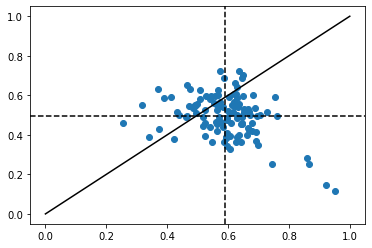

In [748]:
    df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list_onlyinter_ranked[0])
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    #plt.close()
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


0.5597344865386119


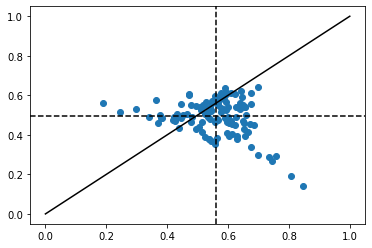

In [749]:
    df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list_onlyinter_ranked[2])
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    #plt.close()
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.6019483521151151


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


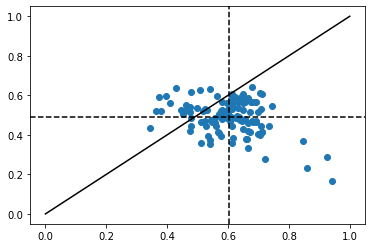

In [674]:
    df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list_inter_ranked[2])
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    #plt.close()
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.5503034838155553


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


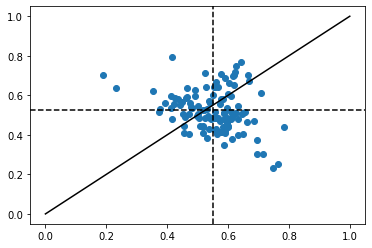

In [608]:
for i in  [df_contact_none_list_inter[0]]:
    df_2d_jac = run_egad(marker_gene_table.T, i)
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    #plt.close()
    print (df_2d_jac['AUC'].mean())

In [747]:
df_2d_jac.sort_values('AUC').tail(10)

AUC  AVG_NODE_DEGREE  \
Lung-Ciliated cells                               0.675780     5.880702e+07   
Kidney-Loop of Henle cells                        0.676682     5.051399e+07   
Immune system-HSC/MPP cells                       0.683915     5.503368e+07   
Gastrointestinal tract-Goblet cells               0.697054     6.024512e+07   
White adipose tissue-Smooth Muscle cells          0.698310     5.025341e+07   
White adipose tissue-Endothelial cells            0.735982     4.866169e+07   
White adipose tissue-Lymphatic Endothelial cells  0.744925     4.850435e+07   
Kidney-Renal Vesicle cells                        0.758917     4.964463e+07   
White adipose tissue-Pericytes                    0.806736     4.563564e+07   
White adipose tissue-Endometrium                  0.847290     4.343367e+07   

                                                  DEGREE_NULL_AUC   P_Value  
Lung-Ciliated cells                                      0.613622  0.013315  
Kidney-Loop of Henle cells                               0.339415  0.001257  
Immune system-HSC/MPP cells                              0.451559  0.015186  
Gastrointestinal tract-Goblet cells                      0.642141  0.000158  
White adipose tissue-Smooth Muscle cells                 0.300244  0.001782  
White adipose tissue-Endothelial cells                   0.287318  0.002579  
White adipose tissue-Lymphatic Endothelial cells         0.267959  0.000232  
Kidney-Renal Vesicle cells                               0.290910  0.002263  
White adipose tissue-Pericytes                           0.190927  0.000119  
White adipose tissue-Endometrium                         0.141628  0.000015

In [668]:
df_2d_jac.sort_values('AUC').tail(15)

AUC  AVG_NODE_DEGREE  \
Lung-Ciliated cells                               0.696712     7.351972e+09   
Pancreas-Pancreatic progenitor cells              0.699250     7.054935e+09   
Immune system-Non-classical monocytes             0.701179     6.909472e+09   
White adipose tissue-Smooth Muscle cells          0.702111     6.934638e+09   
Pancreas-Gamma (PP) cells                         0.705313     7.574493e+09   
Kidney-Immune cells                               0.708275     6.991813e+09   
Skin-Keratinocytes                                0.708597     6.946894e+09   
Immune system-Neutrophils                         0.713077     6.927760e+09   
Immune system-Myeloid Dendritic cells             0.718488     7.080516e+09   
Kidney-Renal Vesicle cells                        0.820481     6.864711e+09   
Testis-Immune cells                               0.820873     6.155374e+09   
White adipose tissue-Lymphatic Endothelial cells  0.830509     7.626869e+09   
White adipose tissue-Endothelial cells            0.888374     7.434612e+09   
White adipose tissue-Pericytes                    0.911488     7.522120e+09   
White adipose tissue-Endometrium                  0.937747     7.385900e+09   

                                                  DEGREE_NULL_AUC  \
Lung-Ciliated cells                                      0.488768   
Pancreas-Pancreatic progenitor cells                     0.392801   
Immune system-Non-classical monocytes                    0.319910   
White adipose tissue-Smooth Muscle cells                 0.541896   
Pancreas-Gamma (PP) cells                                0.609815   
Kidney-Immune cells                                      0.409243   
Skin-Keratinocytes                                       0.403449   
Immune system-Neutrophils                                0.478284   
Immune system-Myeloid Dendritic cells                    0.383637   
Kidney-Renal Vesicle cells                               0.438678   
Testis-Immune cells                                      0.271926   
White adipose tissue-Lymphatic Endothelial cells         0.657470   
White adipose tissue-Endothelial cells                   0.516805   
White adipose tissue-Pericytes                           0.591593   
White adipose tissue-Endometrium                         0.555613   

                                                       P_Value  
Lung-Ciliated cells                               5.934955e-03  
Pancreas-Pancreatic progenitor cells              5.260873e-03  
Immune system-Non-classical monocytes             2.697957e-03  
White adipose tissue-Smooth Muscle cells          3.455151e-03  
Pancreas-Gamma (PP) cells                         2.370224e-04  
Kidney-Immune cells                               1.324218e-06  
Skin-Keratinocytes                                1.005366e-06  
Immune system-Neutrophils                         2.250363e-04  
Immune system-Myeloid Dendritic cells             4.941970e-04  
Kidney-Renal Vesicle cells                        1.674684e-04  
Testis-Immune cells                               1.578755e-03  
White adipose tissue-Lymphatic Endothelial cells  1.089248e-06  
White adipose tissue-Endothelial cells            2.554182e-07  
White adipose tissue-Pericytes                    1.222609e-06  
White adipose tissue-Endometrium                  8.745594e-08

In [578]:
len(df_jac_sim_list_inter_ranked)

3

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.6019483521151151


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


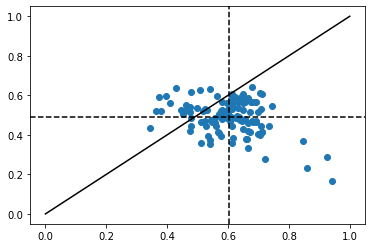

In [581]:
df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list_inter_ranked[2])
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.525611253754995


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


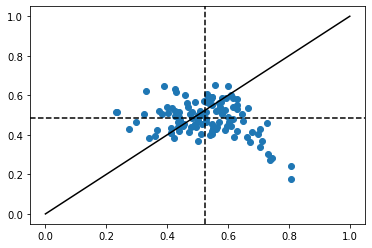

In [487]:
    df_2d_jac = run_egad(marker_gene_table.T, df_inter_plus_intra)
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.9690862699652447
0.5378938927074745


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


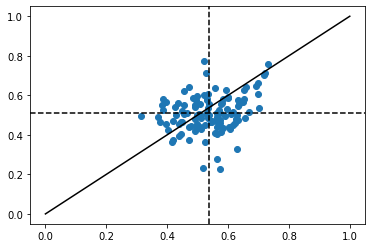

In [506]:
    df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list_intra[0])
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    print (df_2d_jac['AUC'].mean())

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.5616821953875715


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


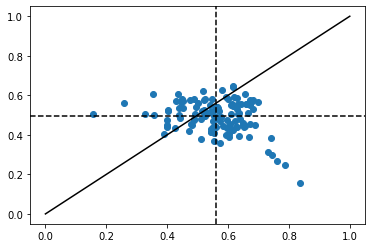

In [541]:
    df_2d_jac = run_egad(marker_gene_table.T, df_pcc_sim_list_inter_ranked_df)
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    print (df_2d_jac['AUC'].mean())

In [620]:
a= [1,2,3]
a[1::]

[2, 3]

In [637]:
 
!wget https://raw.githubusercontent.com/broadinstitute/ABC-Enhancer-Gene-Prediction/master/example_chr22/ABC_output/Predictions/EnhancerPredictionsFull.txt

--2022-06-13 20:23:08--  https://raw.githubusercontent.com/broadinstitute/ABC-Enhancer-Gene-Prediction/master/example_chr22/ABC_output/Predictions/EnhancerPredictionsFull.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167723 (164K) [text/plain]
Saving to: ‘EnhancerPredictionsFull.txt.1’

EnhancerPredictions 100%[===================>] 163.79K  --.-KB/s    in 0.003s  

2022-06-13 20:23:08 (54.2 MB/s) - ‘EnhancerPredictionsFull.txt.1’ saved [167723/167723]



In [ ]:
!ls

In [649]:
df = pd.read_csv('EnhancerPredictionsFull.txt.1', delimiter=r'\s+', error_bad_lines=False)



In [655]:
df[df['distance'] != False][['distance']].astype('float')

ValueError: could not convert string to float: 'False'

In [660]:
df[df['distance'] != 'False']['distance'].astype(float).max()

1082515.0

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0
0.5692818934233114


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


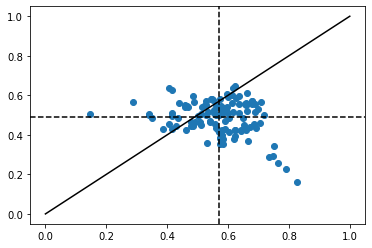

In [542]:
    df_2d_jac = run_egad(marker_gene_table.T, df_pcc_sim_list_inter[0])
    #import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
    plt.plot([0, 1], [0, 1], c='black')
    plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
    plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    print (df_2d_jac['AUC'].mean())

In [537]:
df_pcc_sim_list_inter_ranked = stats.rankdata(df_pcc_sim_list_inter[0].to_numpy()).reshape(df_pcc_sim_list_inter[0].shape[0], df_pcc_sim_list_inter[0].shape[0])


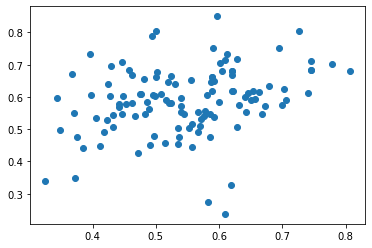

In [522]:
df_merged = df_2d_jac_inter.merge(df_2d_jac, left_on=df_2d_jac_inter.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_y'], df_merged['AUC_x'])

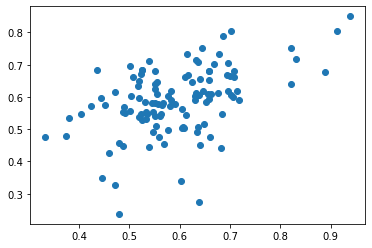

In [669]:
df_merged = df_2d_jac_inter.merge(df_2d_jac, left_on=df_2d_jac_inter.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_y'], df_merged['AUC_x'])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AUC_y', ylabel='AUC_x'>

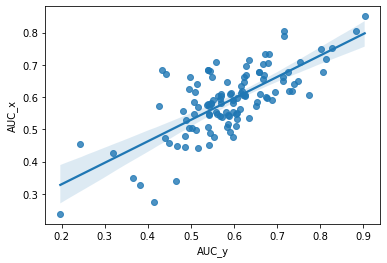

In [518]:
df_merged = df_2d_jac_inter.merge(df_2d_jac, left_on=df_2d_jac_inter.index, right_on=df_2d_jac.index)

sns.regplot(df_merged['AUC_y'], df_merged['AUC_x'])

In [474]:
df_2d_jac_exp = run_egad(marker_gene_table.T, df_exp)


(1690, 1690)
(1690, 229)
0.9919459445492365
0.0


In [ ]:
df_2d_jac = run_egad(marker_gene_table.T, i)

In [479]:
print (df_2d_jac_exp['AUC'].mean())

0.7857189326170421


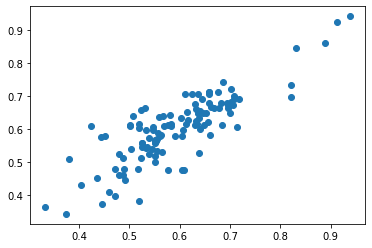

In [673]:
df_merged = df_2d_jac_10.merge(df_2d_jac_40, left_on=df_2d_jac_10.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_x'], df_merged['AUC_y'])

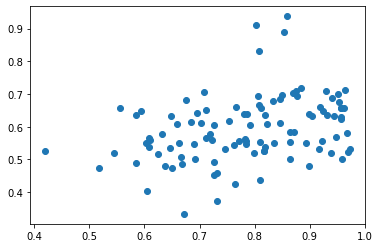

In [670]:
df_merged = df_2d_jac_exp.merge(df_2d_jac, left_on=df_2d_jac_exp.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_x'], df_merged['AUC_y'])

In [619]:
df_merged[df_merged['AUC_y'] >0.7]

key_0     AUC_x  \
2                         Immune system-Naive B cells  0.957644   
3                        Immune system-Memory B cells  0.956297   
4                        Immune system-Plasma B cells  0.956297   
7                   Immune system-Memory CD8+ T cells  0.962215   
8                   Immune system-Memory CD4+ T cells  0.952627   
16                  Immune system-Classical Monocytes  0.940216   
23                              Pancreas-Acinar cells  0.846213   
98           White adipose tissue-Smooth Muscle cells  0.870019   
99                     White adipose tissue-Pericytes  0.803328   
100            White adipose tissue-Endothelial cells  0.853416   
101  White adipose tissue-Lymphatic Endothelial cells  0.807458   
102                  White adipose tissue-Endometrium  0.858917   

     AVG_NODE_DEGREE_x  DEGREE_NULL_AUC_x     P_Value_x     AUC_y  \
2           644.537238           0.446903  1.679166e-11  0.705940   
3           648.858411           0.450282  4.215889e-12  0.712193   
4           648.858411           0.450282  4.215889e-12  0.712193   
7           675.711202           0.450934  8.505265e-11  0.705622   
8           688.644308           0.472597  2.337387e-09  0.710942   
16          662.111557           0.449394  2.049213e-07  0.744215   
23          526.579796           0.297498  1.442703e-08  0.707760   
98          750.772357           0.559803  5.363797e-05  0.722153   
99          713.784680           0.515197  3.889832e-04  0.923633   
100         821.060926           0.656159  1.258192e-06  0.860032   
101         727.676952           0.541788  5.790324e-06  0.845441   
102         688.510269           0.496871  7.736797e-05  0.942222   

     AVG_NODE_DEGREE_y  DEGREE_NULL_AUC_y     P_Value_y  
2         6.202176e+09           0.401328  3.243838e-03  
3         6.242751e+09           0.415062  1.796367e-03  
4         6.242751e+09           0.415062  1.796367e-03  
7         6.912573e+09           0.610374  2.783506e-03  
8         6.904998e+09           0.605343  3.704454e-03  
16        6.821472e+09           0.547747  1.132469e-03  
23        6.510246e+09           0.442632  9.259731e-07  
98        5.751078e+09           0.276899  1.508736e-03  
99        6.247333e+09           0.285634  5.452434e-07  
100       6.056779e+09           0.231358  2.057040e-06  
101       6.458020e+09           0.368211  5.950129e-07  
102       5.748168e+09           0.166450  6.524237e-08

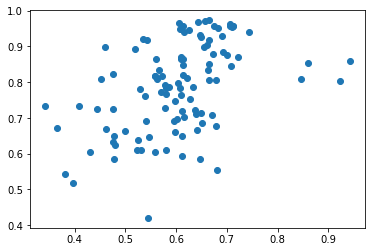

In [588]:
plt.scatter(df_merged['AUC_y'], df_merged['AUC_x'])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AUC_y', ylabel='AUC_x'>

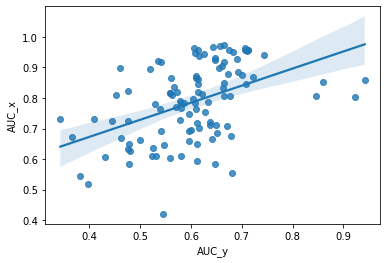

In [589]:
sns.regplot(df_merged['AUC_y'], df_merged['AUC_x'])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AUC_y', ylabel='AUC_x'>

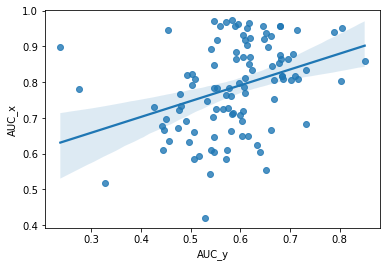

In [501]:
sns.regplot(df_merged['AUC_y'], df_merged['AUC_x'])

In [50]:
contacts_path = f'/grid/gillis/data/nfox/hi_c_data_processing/data_human/stats/'
df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

In [148]:
df_seq_depth = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/stats/human_exclude_count_intra.txt', sep='\t')
df_con_counts = df_con.merge(df_seq_depth.groupby('proj_id')['counts_intra'].sum().reset_index(), left_on='id', right_on='proj_id')



In [ ]:
df_jac_sim_list_ind = []
for proj in df_con['id'].tolist()[0:10]:
    for resolution in ['10kbp_raw']:

        

        exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/{resolution}/max/jac_sim/90/all_bins/KR_ranked_KR/hic_gene_corr_gw.h5'

        pcc_sim = hm.hiCMatrix(exp_file_path)
        all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
        pcc_sim_matrix = pcc_sim.matrix.toarray() 

        pcc_sim_matrix  = pcc_sim_matrix + 1
        df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
        df_jac_sim_list_ind.append(df_jac_sim)
    

In [5]:
df_2d_jac = run_egad(marker_gene_table.T, df_pcc_sim_list_intra[0])
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
df_2d_jac['AUC'].mean()

<ipython-input-5-314f7aa644d5>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)


In [ ]:
df_2d_jac_exp = run_egad(marker_gene_table.T, df_exp)
df_merged = df_2d_jac_exp.merge(df_2d_jac, left_on=df_2d_jac_exp.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_x'], df_merged['AUC_y'])

(1939, 1939)
(1939, 229)
0.9921356842202459
0.9435226709641487
0.5460920304798612


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


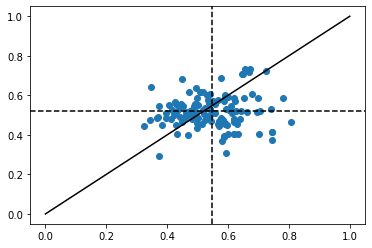

In [597]:
df_2d_jac = run_egad(marker_gene_table.T, df_intra_vs_inter)
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
print (df_2d_jac['AUC'].mean())

In [164]:
    genes_intersect = marker_gene_table.T.index.intersection(df_jac_sim_list[0].index)


    #print (genes_intersect)
    go = marker_gene_table.T.loc[genes_intersect, :]
    nw = df_jac_sim_list[0].loc[genes_intersect, genes_intersect]

In [200]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats
z_list = []
z_p_dict = []
from itertools import combinations
for cell_type in go:
    gene_list = go[i].loc[~(go[i]==0)].index.tolist()
    nw_list = list(combinations(gene_list, 2))
    all_genes = go[i].index.tolist()
    all_genes_nw_list = list(combinations(all_genes , 2))
    t_p_scores = nw.to_numpy()[[all_genes.index(x[0]) for x in nw_list], [all_genes.index(x[1]) for x in nw_list]]
    t_n_scores = nw.to_numpy()[[all_genes.index(x[0]) for x in all_genes_nw_list], [all_genes.index(x[1]) for x in all_genes_nw_list]]



    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
    #nx, ny = len(t_p_scores), len(t_n_scores)
    #N = nx + ny
    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
    #p = stats.norm.sf(z)
    z_list.append(U1)
    z_p_dict.append(p_val)

KeyboardInterrupt: 

In [209]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats
z_list = []
z_p_dict = []
cell_type_list = []
from itertools import combinations
for i in go:
    gene_list = go[i].loc[~(go[i]==0)].index.tolist()
    nw_list = list(combinations(gene_list, 2))
    all_genes_remaining = go[i].loc[(go[i]==0)].index.tolist()
    all_genes = go[i].index.tolist()
    all_genes_nw_list = list(combinations(all_genes_remaining , 2))
    t_p_scores = nw.to_numpy()[[all_genes.index(x[0]) for x in nw_list], [all_genes.index(x[1]) for x in nw_list]]
    t_n_scores = nw.to_numpy()[[all_genes.index(x[0]) for x in all_genes_nw_list], [all_genes.index(x[1]) for x in all_genes_nw_list]]



    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
    #nx, ny = len(t_p_scores), len(t_n_scores)
    #N = nx + ny
    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
    #p = stats.norm.sf(z)
    z_list.append(U1)
    z_p_dict.append(p_val)
    cell_type_list.append(i)
    #print (U1)
    print (i, p_val)

Immune system-Pro-B cells 0.5255152913870282
Immune system-Pre-B cells 0.11041387999076857
Immune system-Naive B cells 0.9997834584197092
Immune system-Memory B cells 0.9992026532757331
Immune system-Plasma B cells 0.9992026532757331
Immune system-Naive CD8+ T cells 0.1594417164911539
Immune system-Naive CD4+ T cells 0.30376513436747765
Immune system-Memory CD8+ T cells 0.039810221586122
Immune system-Memory CD4+ T cells 0.07281820579205615
Immune system-Effector CD8+ T cells 0.083380604110743
Immune system-Effector CD4+ T cells 0.1627124757884018
Immune system--T cells 0.9870064512748841
Immune system-Platelets 0.6953533098040438
Immune system-CD8+ NKT-like cells 0.9999999930756607
Immune system-CD4+ NKT-like cells 0.999999927446826
Immune system-Natural killer cells 0.9999999993921758
Immune system-Eosinophils 0.9994586460023995
Immune system-Neutrophils 0.6539348515573125
Immune system-Basophils 0.9999939380616975
Immune system-Mast cells 0.49472217211389996
Immune system-Classical 

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


Immune system-Megakaryocyte nan
Immune system-Endothelial 6.871151525944772e-12
Immune system-Erythroid-like and erythroid precursor cells 0.10218830641831933
Immune system-HSC/MPP cells 0.9757785651221854
Immune system-Progenitor cells 0.7622822411013515
Immune system-Myeloid Dendritic cells 1.0
Immune system-Plasmacytoid Dendritic cells 0.9999999999356364
Immune system-Granulocytes 0.9996224600927546
Immune system-ISG expressing immune cells 0.9999998603137918
Pancreas-Acinar cells 1.0
Pancreas-Alpha cells 0.9999999994674076
Pancreas-Beta cells 1.0
Pancreas-Delta cells 0.9899483110137034
Pancreas-Ductal cells 0.9999999999999992
Pancreas-Endothelial cells 1.6287865316435827e-07
Pancreas-Epsilon cells 5.50146907631809e-12
Pancreas-Gamma (PP) cells 0.7393464354711239
Pancreas-Immune system cells 0.9999346208763705
Pancreas-Mast cells 0.0014205192009358733
Pancreas-Mesenchymal cells 0.012312540996505451
Pancreas-Pancreatic progenitor cells 0.9999999962594848
Pancreas-Pancreatic stellate 

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


Kidney-Cancer stem cells nan
Kidney-Immune cells 1.0
Kidney--intercalated cells (Collecting duct system) 0.9976611819691337
Kidney-Loop of Henle cells 0.5302824873029576
Kidney-Mesangial cells 5.713369635768982e-10
Kidney-Podocytes 3.044128537685241e-17
Kidney-Principal cells (Collecting duct system) 0.9988613367993747
Kidney-Inner Medullary cells (Collecting duct system) 0.08883813437596294
Kidney-Proximal tubule cells 7.262456537871141e-14
Kidney-Cap mesenchyme cells (Mesenchymal cells) 0.13639608730291825
Kidney-Endothelial cells 0.00023919904130089947
Kidney-Stromal cells 0.16212964995793944
Kidney-Juxtaglomerular cells 0.28219332234802913
Kidney-Renal interstitium (Mesenchymal cells) 0.212256915513365
Kidney-Connecting tubule cells 0.8647747119370197
Kidney-Distal tubule cells 0.4128234834073454
Kidney-Hematopoietic cells 0.9999699770523204
Kidney-Ureteric Bud cells 0.5580127180593097
Kidney-Renal Vesicle cells 0.9999999585291095
Brain-Astrocytes 0.9771568043215687
Brain-Cholinerg

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


Brain-Tanycytes nan
Lung-Airway epithelial cells 0.4281842105494715
Lung-Airway goblet cells 1.3311433542987131e-05
Lung-Mesothelial cells 0.955080101102396
Lung-Fibroblasts 8.316028697629618e-06
Lung-Basal cells (Airway progenitor cells) 0.9999649116774055
Lung-Alveolar macrophages 0.9968033495837645
Lung-Ciliated cells 0.0001522328213280748
Lung-Clara cells 0.052330498655203894
Lung-Immune system cells 0.943023685822743
Lung-Endothelial cell 2.600618492423893e-06
Lung-Epithelial cells 0.01128830093082902
Lung-Ionocytes 0.1265938662779903
Lung-Pulmonary alveolar type I cells 0.011289095572848807
Lung-Pulmonary alveolar type II cells 0.9764782684610505
Lung-Secretory cell 0.032035145046379665
Embryo-Cardiomyocytes 0.6148114360722178
Embryo-Embryonic stem cells 2.695263535893003e-19
Embryo-Epiblast cells 0.10738493304912461
Embryo-Germ cells 0.6266170749112315
Embryo-Hemangioblasts 0.8240014848476986
Embryo-Mesenchymal stem cell 0.3097172235773975
Embryo-Neurons 0.6220733569786138
Embry

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


Eye-Cancer cells nan
Lung-Cancer stem cells 0.38978920415090107
Brain-Cancer cells 0.2009598013871262
Brain-Cancer stem cells 0.9155780338835495
Heart-Adipocytes 0.25536964745353186
Heart-Atrial cardiomyocytes 0.5199158918797908
Heart-Fibroblasts 0.06291081511771857
Heart-Pericytes 0.23570975174008196
Heart-Smooth Muscle cells 0.011873315323551025
Heart-Immune cells 0.5670722936369436
Heart-Mesothelial cells 0.8531632669639564
Heart-Neuronal cells 0.04163743899942991
Heart-Ventricular cardiomyocytes 0.09704866259608763
Heart-Endothelial cells 0.03325764233667904


/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


Heart-Nodal nan
Ovary-Oocytes 0.8120669257351976
Ovary-Immune cells 0.7296718339287906
Ovary-Endothelial cells 0.0003141207783776361
Ovary-Granulosa cells 0.9903295625462109
Ovary-Perivascular cells 0.0264814808966849
Ovary-Stromal cells 0.6700893298486523
Ovary-Smooth Muscle cells 0.2093231946230783
Testis-Immune cells 0.7100171980158106
Testis-Sertoli cells 0.964028624579611
Testis-Endothelial cells 0.005083930106559145
Testis-Spermatogonia 0.32878149057975853
Testis-Spermatocytes 0.0015414807938358363
Testis-Spermatids 0.20804767075277747
Testis-Leydig cells 0.4242599269266797
Testis-Smooth Muscle cells 0.29830484554083125
White adipose tissue-Adipocytes 5.179941551720593e-08
White adipose tissue-Adipose progenitor cells 4.6912581983828754e-07
White adipose tissue-Smooth Muscle cells 9.301545204297251e-35
White adipose tissue-Pericytes 1.042824233632555e-34
White adipose tissue-Endothelial cells 9.530408851592284e-45
White adipose tissue-Lymphatic Endothelial cells 5.328513239092126

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


White adipose tissue-Epithelial cells nan
Teeth-Mesenchymal stem cells 0.09520408854387435
Teeth-Fibroblasts 0.2178086972387479
Teeth-Odontoblasts 0.4516914667835553
Teeth-Endothelial cells 0.9508980624410759
Teeth-Immune cells 0.9887173457961218
Teeth-Glial cells 0.6118844330025222
Teeth-Epithelial cells 0.9964101202576175


In [ ]:
df_AUC_degree = df_2d_jac.merge(marker_gene_table.sum(axis=1).reset_index(), left_on=df_2d_jac.index, right_on= 'index' )

In [211]:
import statsmodels.api as sm
auc_GO_terms_manw = pd.DataFrame(list(zip(cell_type_list,  z_p_dict )), columns=['cell_type', 'P_val_agg'])

auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]

            
            

In [212]:
auc_GO_terms_manw['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in auc_GO_terms_manw['adjusted_P_val_agg']]

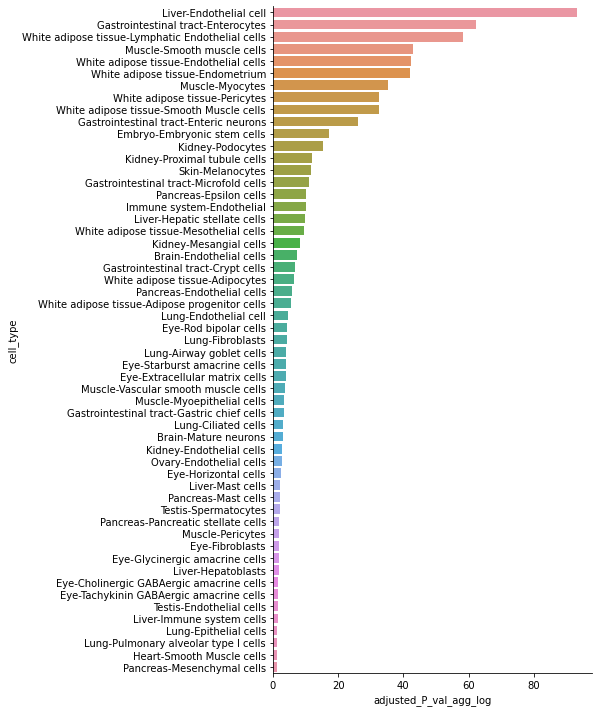

In [213]:
sns.catplot(data=auc_GO_terms_manw[auc_GO_terms_manw['adjusted_P_val_agg'] <= 0.05].sort_values(['adjusted_P_val_agg']), y='cell_type', x='adjusted_P_val_agg_log', height=10, aspect=8/9.5, kind='bar', dodge=False)


<AxesSubplot:xlabel='P_Value', ylabel='Count'>

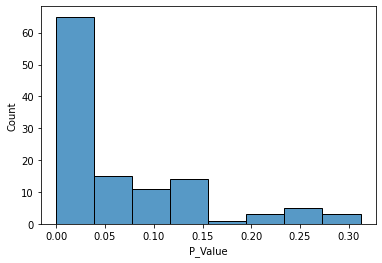

In [99]:
import seaborn as sns
sns.histplot(df_2d_jac['P_Value'])

In [105]:
df_2d_jac[df_2d_jac['P_Value']<=.05/117]['AUC'].mean()

0.809861184723263

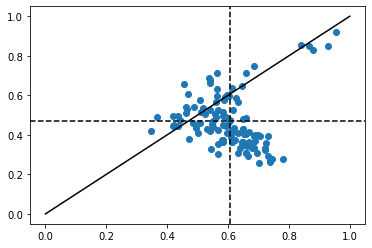

In [84]:

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [440]:
df_2d_jac.sort_values('AUC').tail(10)

AUC  AVG_NODE_DEGREE  \
Testis-Immune cells                               0.699874      2194.783806   
Immune system-ISG expressing immune cells         0.705377      2152.074866   
Liver-Immune system cells                         0.707513      2212.232149   
Brain-Astrocytes                                  0.717602      2174.190334   
White adipose tissue-Smooth Muscle cells          0.735964      2037.174758   
White adipose tissue-Lymphatic Endothelial cells  0.747527      2033.564287   
Kidney-Renal Vesicle cells                        0.750735      2065.500636   
White adipose tissue-Endothelial cells            0.763787      2006.566317   
White adipose tissue-Pericytes                    0.789668      1978.393291   
White adipose tissue-Endometrium                  0.825373      1930.854639   

                                                  DEGREE_NULL_AUC   P_Value  
Testis-Immune cells                                      0.528645  0.043408  
Immune system-ISG expressing immune cells                0.457964  0.008317  
Liver-Immune system cells                                0.567169  0.003111  
Brain-Astrocytes                                         0.498545  0.001779  
White adipose tissue-Smooth Muscle cells                 0.289001  0.001021  
White adipose tissue-Lymphatic Endothelial cells         0.291298  0.000233  
Kidney-Renal Vesicle cells                               0.343150  0.003285  
White adipose tissue-Endothelial cells                   0.258108  0.000581  
White adipose tissue-Pericytes                           0.225826  0.000254  
White adipose tissue-Endometrium                         0.161348  0.000045

In [582]:
df_2d_jac.sort_values('AUC').tail(10)

AUC  AVG_NODE_DEGREE  \
Immune system-Memory CD4+ T cells                 0.710942     6.904998e+09   
Immune system-Memory B cells                      0.712193     6.242751e+09   
Immune system-Plasma B cells                      0.712193     6.242751e+09   
White adipose tissue-Smooth Muscle cells          0.722153     5.751078e+09   
Kidney-Renal Vesicle cells                        0.734804     6.376944e+09   
Immune system-Classical Monocytes                 0.744215     6.821472e+09   
White adipose tissue-Lymphatic Endothelial cells  0.845441     6.458020e+09   
White adipose tissue-Endothelial cells            0.860032     6.056779e+09   
White adipose tissue-Pericytes                    0.923633     6.247333e+09   
White adipose tissue-Endometrium                  0.942222     5.748168e+09   

                                                  DEGREE_NULL_AUC  \
Immune system-Memory CD4+ T cells                        0.605343   
Immune system-Memory B cells                             0.415062   
Immune system-Plasma B cells                             0.415062   
White adipose tissue-Smooth Muscle cells                 0.276899   
Kidney-Renal Vesicle cells                               0.444430   
Immune system-Classical Monocytes                        0.547747   
White adipose tissue-Lymphatic Endothelial cells         0.368211   
White adipose tissue-Endothelial cells                   0.231358   
White adipose tissue-Pericytes                           0.285634   
White adipose tissue-Endometrium                         0.166450   

                                                       P_Value  
Immune system-Memory CD4+ T cells                 3.704454e-03  
Immune system-Memory B cells                      1.796367e-03  
Immune system-Plasma B cells                      1.796367e-03  
White adipose tissue-Smooth Muscle cells          1.508736e-03  
Kidney-Renal Vesicle cells                        5.243902e-03  
Immune system-Classical Monocytes                 1.132469e-03  
White adipose tissue-Lymphatic Endothelial cells  5.950129e-07  
White adipose tissue-Endothelial cells            2.057040e-06  
White adipose tissue-Pericytes                    5.452434e-07  
White adipose tissue-Endometrium                  6.524237e-08

In [ ]:
df_2d_jac

In [71]:
df_2d_jac['AUC'].median()

0.6130787285407725

In [ ]:
df_jac_sim_list_50 = []
for resolution in ['10kbp_raw','25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/max/jac_sim/50/all_bins/KR_ranked_KR/hic_gene_corr_gw.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_jac_sim_list_50.append(df_jac_sim)
    
    

In [ ]:
df_contact_list = []
for resolution in ['100kbp_raw', '10kbp_raw', '40kbp_raw']:

    SRP_name='aggregates'

    exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}/hic_gene_gw_KR_KR.h5'

    pcc_sim = hm.hiCMatrix(exp_file_path)
    all_pcc_genes = [x[3].decode() for x in pcc_sim.cut_intervals]
    pcc_sim_matrix = pcc_sim.matrix.toarray() 

    pcc_sim_matrix  = pcc_sim_matrix + 1
    df_jac_sim = pd.DataFrame(pcc_sim_matrix,  index=all_pcc_genes, columns = all_pcc_genes)
    df_contact_list.append(df_jac_sim)

In [27]:
 pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)
    
    

<ipython-input-27-a2637dce51b5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)


Tissue          Cell type  \
0    Immune system        Pro-B cells   
1    Immune system        Pre-B cells   
2    Immune system      Naive B cells   
3    Immune system     Memory B cells   
4    Immune system     Plasma B cells   
..             ...                ...   
227          Teeth       Odontoblasts   
228          Teeth  Endothelial cells   
229          Teeth       Immune cells   
230          Teeth        Glial cells   
231          Teeth   Epithelial cells   

                                          Marker genes Negative markers  
0    CD27,IgD,CD24,PTPRC,PAX5,CD24,CD38,CD79A,DNTT,...              NaN  
1    CD19,CD27,IgD,CD24,PTPRC,PAX5,CD24,CD38,CD79A,...              NaN  
2    CD19,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,CD24,...              NaN  
3    CD19,CD27,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,...              NaN  
4    CD19,CD27,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,...       CD20,MS4A1  
..                                                 ...              ...  
227  DSPP,DMP1,SMOC2,COL1A1,FGF3,S100A13,SALL1,PTN,...              NaN  
228  EDN1,CLDN5,ACKR1,CD234,INSR,RGCC,CTNNB1,CLDN5,...              NaN  
229  CD69,ITGB2,CD2,CD3G,CD3E,CD8A,CD14,HLA-DRA,B2M...              NaN  
230  SOX10,MBP,GFRA3,SOX2,PLP1,SOX10,SCN7A,KCNA2,GF...              NaN  
231  KRT14,ODAM,WNT10A,IL1A,IL1B,KRT5,SFN,FDCSP,SLP...              NaN  

[232 rows x 4 columns]

In [173]:
import pandas as pd
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)

df['combined_type'] = df['Tissue'] + '-' + df['Cell type']
tissue_type_list = df['combined_type'].drop_duplicates().tolist()

all_gene_list = df['Marker genes'].str.cat(sep=',').split(",")

data_tissue = df.groupby(['combined_type']).apply(lambda grp: grp['Marker genes'].str.cat(sep=',').split(","))

all_gene_list = list(set(all_gene_list))

nested_gene_marker_tissue_list = []

for i in tissue_type_list:
    gene_for_given_tissue = data_tissue[data_tissue.index ==i][0]
    particular_gene_tissue = [ 1 if x in gene_for_given_tissue else 0 for x in all_gene_list]
    nested_gene_marker_tissue_list.append(particular_gene_tissue)

    
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/gene_name_ensg.txt', sep='\t')
df.dropna(inplace=True)
dict_gene_name_to_ensg = df.set_index('Gene name').to_dict()['Gene stable ID']
all_gene_list = [dict_gene_name_to_ensg[x] if x in dict_gene_name_to_ensg.keys() else 'del' for x in all_gene_list ]
marker_gene_table = pd.DataFrame(nested_gene_marker_tissue_list, columns = all_gene_list, index=tissue_type_list)

<ipython-input-173-314f7aa644d5>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/scType_marker_genes.csv', header=1, usecols=[0,1,2,3], skipfooter=2)


In [18]:
marker_gene_table.sum(axis=1).reset_index()

index   0
0       Immune system-Pro-B cells  20
1       Immune system-Pre-B cells  18
2     Immune system-Naive B cells  22
3    Immune system-Memory B cells  23
4    Immune system-Plasma B cells  23
..                            ...  ..
224            Teeth-Odontoblasts  12
225       Teeth-Endothelial cells   9
226            Teeth-Immune cells  12
227             Teeth-Glial cells   9
228        Teeth-Epithelial cells  11

[229 rows x 2 columns]

In [234]:
df_AUC_degree = df_2d_jac.merge(marker_gene_table.sum(axis=1).reset_index(), left_on=df_2d_jac.index, right_on= 'index' )


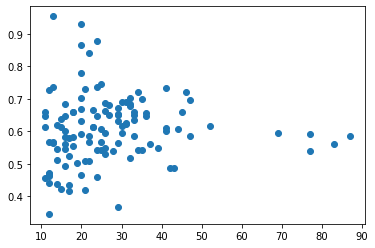

In [235]:
plt.scatter(df_AUC_degree[0], df_AUC_degree['AUC'])

In [ ]:
df_2d_jac.merge(marker_gene_table.sum(axis=1).reset_index(), left_on=df_2d_jac.index, right_on= 'index' )

<AxesSubplot:ylabel='Count'>

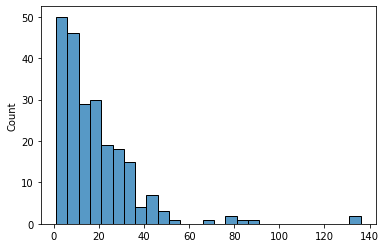

In [223]:
sns.histplot(marker_gene_table.sum(axis=1), binwidth=5)

In [224]:
marker_gene_table

ENSG00000115041  ENSG00000092621  \
Immune system-Pro-B cells                   0                0   
Immune system-Pre-B cells                   0                0   
Immune system-Naive B cells                 0                0   
Immune system-Memory B cells                0                0   
Immune system-Plasma B cells                0                0   
...                                       ...              ...   
Teeth-Odontoblasts                          0                0   
Teeth-Endothelial cells                     0                0   
Teeth-Immune cells                          0                0   
Teeth-Glial cells                           0                0   
Teeth-Epithelial cells                      0                0   

                              ENSG00000100031  ENSG00000136048  \
Immune system-Pro-B cells                   0                0   
Immune system-Pre-B cells                   0                0   
Immune system-Naive B cells                 0                0   
Immune system-Memory B cells                0                0   
Immune system-Plasma B cells                0                0   
...                                       ...              ...   
Teeth-Odontoblasts                          0                0   
Teeth-Endothelial cells                     0                0   
Teeth-Immune cells                          0                0   
Teeth-Glial cells                           0                0   
Teeth-Epithelial cells                      0                0   

                              ENSG00000167617  ENSG00000114013  \
Immune system-Pro-B cells                   0                0   
Immune system-Pre-B cells                   0                0   
Immune system-Naive B cells                 0                0   
Immune system-Memory B cells                0                0   
Immune system-Plasma B cells                0                0   
...                                       ...              ...   
Teeth-Odontoblasts                          0                0   
Teeth-Endothelial cells                     0                0   
Teeth-Immune cells                          0                0   
Teeth-Glial cells                           0                0   
Teeth-Epithelial cells                      0                0   

                              ENSG00000273079  ENSG00000168081  \
Immune system-Pro-B cells                   0                0   
Immune system-Pre-B cells                   0                0   
Immune system-Naive B cells                 0                0   
Immune system-Memory B cells                0                0   
Immune system-Plasma B cells                0                0   
...                                       ...              ...   
Teeth-Odontoblasts                          0                0   
Teeth-Endothelial cells                     0                0   
Teeth-Immune cells                          0                0   
Teeth-Glial cells                           0                0   
Teeth-Epithelial cells                      0                0   

                              ENSG00000196182  del  ...  ENSG00000105695  \
Immune system-Pro-B cells                   0    0  ...                0   
Immune system-Pre-B cells                   0    0  ...                0   
Immune system-Naive B cells                 0    0  ...                0   
Immune system-Memory B cells                0    0  ...                0   
Immune system-Plasma B cells                0    0  ...                0   
...                                       ...  ...  ...              ...   
Teeth-Odontoblasts                          0    0  ...                0   
Teeth-Endothelial cells                     0    0  ...                0   
Teeth-Immune cells                          0    0  ...                0   
Teeth-Glial cells                           0    0  ...                0   
Teeth-Epithelial cells

In [93]:
len(tissue_type_list)

16

In [29]:
marker_gene_table.drop('del', axis=1, inplace=True)

In [145]:
df_2d_jac_exp = run_egad(marker_gene_table.T, df_exp)
df_merged = df_2d_jac_exp.merge(df_2d_jac, left_on=df_2d_jac_exp.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_x'], df_merged['AUC_y'])

(1690, 1690)
(1690, 229)
0.9919459445492365
0.0


<ipython-input-22-0a2b6b600218>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [205]:
df_2d_jac = run_egad(marker_gene_table.T, df_pcc_sim)

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-22-0a2b6b600218>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [208]:
df_2d_jac = run_egad(marker_gene_table.T, df_jac_sim_list[0])

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-22-0a2b6b600218>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [146]:
auc_jac_list = []
for i in df_jac_sim_list_ind:
    df_2d_jac = run_egad(marker_gene_table.T, i )
    print (auc_jac_list.append(df_2d_jac[df_2d_jac['P_Value']<=1]['AUC'].mean()))
    print (df_2d_jac[df_2d_jac['P_Value']<=.05])

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                       AUC  AVG_NODE_DEGREE  \
Immune system-Memory B cells                      0.628628      3919.592075   
Immune system-Plasma B cells                      0.628628      3919.592075   
Immune system-Naive CD8+ T cells                  0.667728      3924.860350   
Immune system-Naive CD4+ T cells                  0.637170      3923.025367   
Immune system-Memory CD8+ T cells                 0.640001      3924.128320   
Immune system-Effector CD8+ T cells               0.647754      3924.095881   
Immune system-CD4+ NKT-like cells                 0.659765      3918.091104   
Immune system-Classical Monocytes                 0.629154      3919.114920   
Immune system-Non-classical monocytes             0.802938      3917.380108   
Immune system-Endothelial                         0.595037      3936.395118   
Immune system-Myeloid Dendritic cells             0.686954      3919.542547   
Immune system-ISG expressing immune cells      

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                       AUC  AVG_NODE_DEGREE  \
Immune system-Naive B cells                       0.635809      2288.226708   
Immune system-Memory B cells                      0.647678      2288.816887   
Immune system-Plasma B cells                      0.647678      2288.816887   
Immune system-Naive CD8+ T cells                  0.717044      2307.467359   
Immune system-Naive CD4+ T cells                  0.745002      2307.852077   
...                                                    ...              ...   
White adipose tissue-Endothelial cells            0.888259      2512.190195   
White adipose tissue-Lymphatic Endothelial cells  0.867806      2495.296713   
White adipose tissue-Endometrium                  0.947489      2539.614275   
Teeth-Odontoblasts                                0.647581      2367.531562   
Teeth-Epithelial cells                            0.714142      2271.873858   

                                              

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                       AUC  AVG_NODE_DEGREE  \
Immune system-Naive B cells                       0.679969      2282.321117   
Immune system-Memory B cells                      0.679864      2286.107033   
Immune system-Plasma B cells                      0.679864      2286.107033   
Immune system-Naive CD8+ T cells                  0.672625      2368.840181   
Immune system-Naive CD4+ T cells                  0.654684      2365.687164   
...                                                    ...              ...   
White adipose tissue-Endothelial cells            0.884247      2540.696856   
White adipose tissue-Lymphatic Endothelial cells  0.847649      2526.684765   
White adipose tissue-Endometrium                  0.940492      2559.319155   
White adipose tissue-Immune cells                 0.615785      2363.719830   
Teeth-Epithelial cells                            0.687318      2329.897177   

                                              

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                       AUC  AVG_NODE_DEGREE  \
Immune system-Pro-B cells                         0.653843      2310.404655   
Immune system-Naive B cells                       0.678980      2279.990783   
Immune system-Memory B cells                      0.703950      2277.614032   
Immune system-Plasma B cells                      0.703950      2277.614032   
Immune system-Naive CD8+ T cells                  0.703501      2316.047365   
...                                                    ...              ...   
White adipose tissue-Pericytes                    0.922072      2514.745864   
White adipose tissue-Endothelial cells            0.887397      2507.823621   
White adipose tissue-Lymphatic Endothelial cells  0.863179      2493.535307   
White adipose tissue-Endometrium                  0.950009      2536.408876   
Teeth-Epithelial cells                            0.715284      2275.956088   

                                              

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                 AUC  AVG_NODE_DEGREE  \
Immune system-Naive B cells                 0.651515      3918.554537   
Immune system-Memory B cells                0.639946      3918.366098   
Immune system-Plasma B cells                0.639946      3918.366098   
Immune system-Naive CD8+ T cells            0.680577      3922.777985   
Immune system-Naive CD4+ T cells            0.648737      3920.332716   
Immune system-Memory CD8+ T cells           0.640097      3923.728065   
Immune system-Memory CD4+ T cells           0.646529      3921.418522   
Immune system-Effector CD8+ T cells         0.652044      3921.787486   
Immune system-CD4+ NKT-like cells           0.663478      3918.644766   
Immune system-Non-classical monocytes       0.810646      3916.173147   
Immune system-Endothelial                   0.582117      3938.424927   
Immune system-HSC/MPP cells                 0.528105      3932.461464   
Immune system-Myeloid Dendritic cells       0.

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


None
                                                       AUC  AVG_NODE_DEGREE  \
Immune system-Pro-B cells                         0.636886      2304.094600   
Immune system-Naive B cells                       0.638068      2274.284388   
Immune system-Memory B cells                      0.657903      2270.543948   
Immune system-Plasma B cells                      0.657903      2270.543948   
Immune system-Naive CD8+ T cells                  0.684824      2302.873816   
...                                                    ...              ...   
White adipose tissue-Endothelial cells            0.875605      2507.759221   
White adipose tissue-Lymphatic Endothelial cells  0.856913      2493.656772   
White adipose tissue-Endometrium                  0.952644      2542.800009   
White adipose tissue-Immune cells                 0.593541      2356.529559   
Teeth-Epithelial cells                            0.690716      2270.171277   

                                              

<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


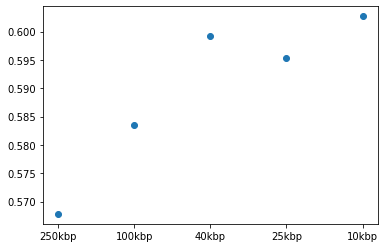

In [212]:
plt.scatter(['250kbp','100kbp','40kbp','25kbp','10kbp'],auc_jac_list)

(1939, 1939)
(1939, 229)
0.9921356842202459
0.0


<ipython-input-82-5da84e1c92f3>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [219]:
df_2d_jac['AUC'].mean()

0.6058623235973074

In [150]:
import numpy as np
df_con_counts['counts_inter_log'] = [np.log10(x) for x in df_con_counts['counts_intra']]
plt.scatter(x=df_con_counts['counts_inter_log'].values[0:7], y=auc_jac_list)

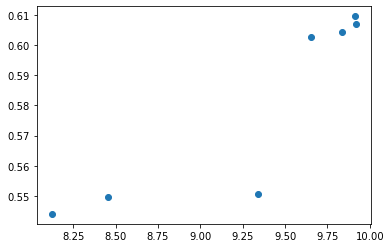

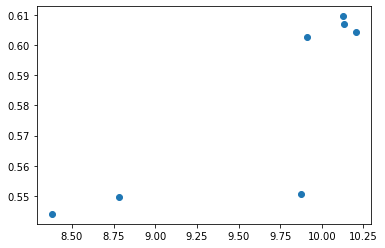

In [151]:
plt.scatter(x=df_con_counts['counts_inter_log'].values[0:7], y=auc_jac_list)

In [65]:
auc_jac_list

[0.5387271046397412,
 0.6118513592912757,
 0.6122607346094154,
 0.6225041717014789,
 0.5303173567366725,
 0.6159795243204579,
 0.5224358974358975]

In [153]:
df_merged = df_2d_jac_exp.merge(df_2d_jac, left_on=df_2d_jac_exp.index, right_on=df_2d_jac.index)

plt.scatter(df_merged['AUC_x'], df_merged['AUC_y'])

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AUC_x', ylabel='AUC_y'>

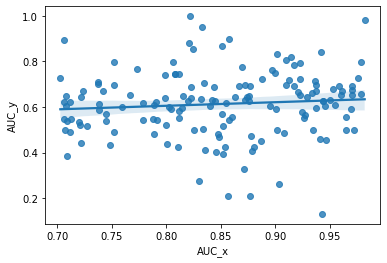

In [160]:
sns.regplot((df_merged[df_merged['AUC_x'] > 0.7]['AUC_x']), (df_merged[df_merged['AUC_x'] > 0.7]['AUC_y']))

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AUC_x', ylabel='AUC_y'>

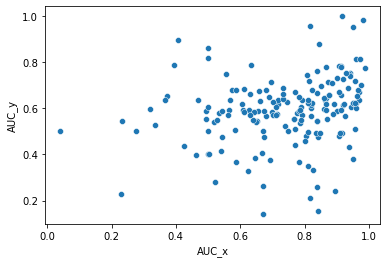

In [136]:
sns.scatterplot((df_merged[df_merged['AUC_x'] > -0.5]['AUC_x']), (df_merged[df_merged['AUC_x'] > -0.5]['AUC_y']))

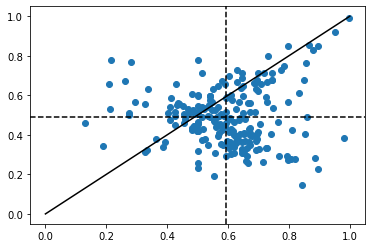

In [209]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac['AUC'], df_2d_jac['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

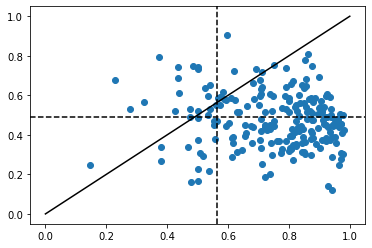

In [203]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.scatter(df_2d_jac_exp['AUC'], df_2d_jac_exp['DEGREE_NULL_AUC'])
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_jac['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_jac['DEGREE_NULL_AUC'].mean(), c='black', ls='--')